## Trường Đại học Khoa học Tự nhiên - Đại học Quốc gia TP.HCM

# **Khoa Công nghệ thông tin**

## Lớp: **Lập trình song song - 21KHMT**

# Đồ án cuối kỳ: **Implement and optimize the traditional Artificial Neural Network (ANN)**

---

**Sinh viên thực hiện:** Nhóm 05 - Thần y xứ Quảng

| STT | MSSV     | Họ và tên         |
| :-: | -------- | ----------------- |
|  1  | 21127084 | Lê Xuân Kiên      |
|  2  | 21127108 | Đặng Hà Nhật Minh |
|  3  | 21127739 | Vũ Minh Phát      |

**Giảng viên hướng dẫn:**

- Nguyễn Trần Duy Minh
- Phạm Trọng Nghĩa
- Nguyễn Thanh Tình

---


# 0. Cài đặt môi trường

Cài đặt Nsight System trên Google Colab:

In [ ]:
# Here is the command to install Nsight system on Colab. You just need to run the cell.
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt update
!apt install ./nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt --fix-broken install

#  
---

# 1. Mô tả ứng dụng

## 📌 Ứng dụng và các mô tả

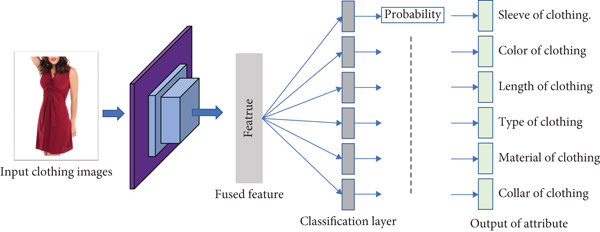

**Ứng dụng: Lập trình song song trên mạng nơ-ron nhân tạo phân lớp tập dữ liệu Fashion-MNIST.**

- **Input**: Tập dữ liệu Fashion-MNIST bao gồm 60,000 bức ảnh trên tập huấn luyện và 10,000 bức ảnh trên tập test với kích thước mỗi bức ảnh là grayscale 28x28 pixels.

- **Output**: Các con số từ 0 đến 9 đại diện cho nhãn của các bức ảnh theo danh sách bên dưới.

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

- Nhìn chung bài toán này được dựa trên một mang nơ-ron nhân tạo đơn giản (sẽ được mô tả kỹ hơn ở bên dưới), mô hình mà sẽ giúp cho người sử dụng tiết kiệm được rất nhiều về tài nguyên nhân sự cũng như là thời gian nhằm đặt được hiệu suất cao hơn trong việc phân loại thời trang.

- Bài toán này liên quan rất nhiều đến các ứng dụng trong thực tế nên việc chạy song song trên GPU là vô cùng cần thiết và mang ý nghĩa to lớn trong thực tiễn.

## 📌 Ứng dụng thực tiễn cho mô hình

**Quản lý chuỗi cung ứng đầu vào của sàn thương mại điện tử thuộc một cửa hàng thời trang**

- **Mô tả**: Khi quản lý một sàn thương mại điện tử của cửa hàng thời trang việc up-to-date rất quan trọng đối với khách hàng cũng như nhà quản lý có thể kể đến như:
    - Trình bày số lượng mà mỗi mặt hàng còn có.
    - Cập nhật sau mỗi một khoảng thời gian để up-to-date sát với thời gian thực.
    - Cung cấp cái nhìn khách quan cho khách hàng về từng mẫu mã sản phẩm dựa theo chiến lược của nhà quản lý.

- **Use-case của mô hình trên**: sẽ quản lý số lượng đầu vào của từng mặt hàng để cập nhật số lượng cũng như quản lý chất lượng dịch vụ của cửa hàng trực tuyến.
    - Giả sử cửa hàng đã được trang bị các thiết bị phần cứng phù hợp để thực hiện các công việc liên quan như: chụp hình, chuyển từ hình RGB về Grayscale, v.v.
    - Mô hình sẽ làm toàn bộ công việc phân loại các mặt hàng mới được nhập và cập nhật lên bộ dữ liệu của cửa hàng.
    - Những lợi ích mà mô hình này mang lại:
        - **Trải nghiệm của người dùng**: Không khách hàng nào muốn mua một mặt hàng đã được trưng bày nhưng sau đó lại được báo là không còn hàng trong kho.
        - **Khả năng quản lý của chủ cửa hàng**: Sẽ tiết kiệm được cả thời gian và tiền bạc cho việc quản lý chuỗi sản phẩm nhập vào khi đã được xử lý toàn bộ thông qua mô hình.

- **Kết luận**: Chính bởi ứng dụng thực tiễn như vậy nên việc tối ưu hoá thời gian xử lý là sự ưu tiên tiên quyết của một nhà phát triển mô hình. Từ đó nhóm 05 chúng em sẽ thực hiện công việc này để hiện thực hoá kết luận vừa rồi.

#  
---

# 2. Kế hoạch thực hiện

| Giai đoạn | Thời gian thực hiện | Công việc chính của cả nhóm |
| :-: | --- | --- |
| 1 | Từ ngày 30/11/2024 đến 07/12/2024 | Cài đặt mô hình **tuần tự lần 1** |
| 2 | Từ ngày 07/12/2024 đến 10/12/2024 | Cài đặt mô hình **tuần tự lần 2** |
| 3 | Từ ngày 10/12/2024 đến 14/12/2024 | Cài đặt mô hình **song song lần 1** |
| 4 | Từ ngày 14/12/2024 đến 17/12/2024 | Cài đặt mô hình **song song lần 2** |
| 5 | Từ ngày 17/12/2024 đến 20/12/2024 | Cài đặt mô hình **song song lần 3** |
| 6 | Từ ngày 20/12/2024 đến 24/12/2024 | Cài đặt mô hình **song song lần 4** |

- Nhìn chung, quá trình thực hiện đồ án của nhóm 05 kéo dài trong khoảng **3 tuần rưỡi**, trải qua **6 giai đoạn**, mỗi giai đoạn tương ứng với 1 phiên bản của mô hình Neural Network tuần tự hoặc song song. Qua mỗi phiên bản, mô hình sẽ được cải tiến từ phiên bản trước đó để đạt được hiệu suất tốt hơn.

- Bảng phân công nhiệm vụ cho từng thành viên trong nhóm 05 đã được liệt kê chi tiết trong file "**`Team-Plan-and-Work-Distribution.xlsx`**" (được đính kèm trong bài nộp cùng với file báo cáo này).

#  
---

# 3. Cài đặt tuần tự lần 1

## 3.1. Sơ lược về mạng ANN và quy trình cài đặt tuần tự

Mạng Nơ-ron Nhân tạo (Artificial Neural network - ANN) là một mô hình máy học lấy cảm hứng từ cấu trúc và chức năng của hệ thần kinh sinh học. Trong triển khai tuần tự, các phép tính trong ANN được thực hiện dưới quy trình:
- **Lan truyền tiến (Forward Propagation)**: Tín hiệu đi từ đầu vào qua các tầng ẩn đến tầng đầu ra.
- **Tính toán hàm mất mát (Loss Calculation)**: So sánh đầu ra dự đoán với giá trị thực tế.
- **Lan truyền ngược (Backward Propagation)**: Tính gradient và cập nhật trọng số.
- **Lặp lại (Iteration)**: Thực hiện nhiều vòng lặp để tối ưu hóa mô hình.

Các thành phần chính trong một mô hình ANN:
- **Input layer**: Các neuron đầu vào nhận dữ liệu từ input.
- **Hidden Layers**: Trọng số $W$, bias $b$ và hàm kích hoạt $g(z)$.
- **Output Layers**: Dự đoán $\hat{y}$.
- **Loss Function**: So sánh $y$ và $\hat{y}$.

## 3.2. Mô hình thực thi

Trong bài toán này, nhóm 05 quyết định sử dụng **Bias Trick**, một mẹo trong lĩnh vực machine learning nhằm đơn giản hóa các phép tính toán trong quá trình huấn luyện mạng nơ-ron. Cụ thể là thay vì xử lý bias $b$ như một vector riêng biệt, thì bias sẽ được kết hợp trực tiếp vào ma trận trọng số $W$.

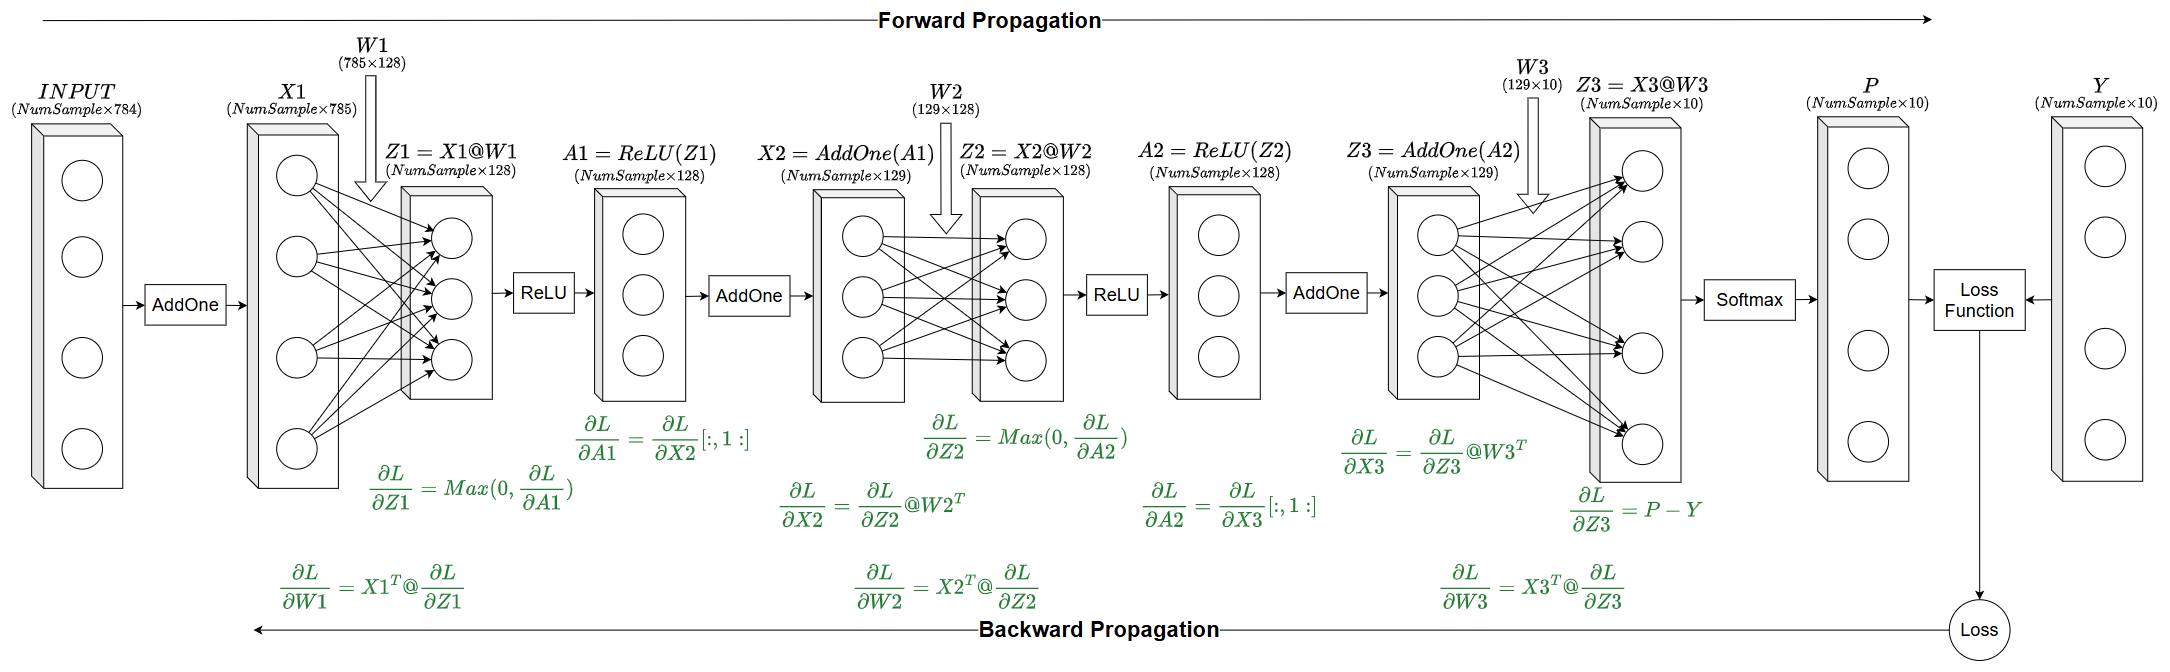

## 3.3. Chi tiết

Trình tự các bước thực hiện chi tiết quá trình tuần tự (Hình dưới):
- Dữ liệu sẽ được đọc vào và trải phẳng ra thành một vector có shape là $ 1 \times 784 $.
- Sau đó chúng em sử dụng **Bias trick** để thêm giá trị $1$ vào đầu vector input và giá trị bias vào cột đầu tiên của các ma trận trọng số để có thể đơn giản hóa tính toán trên mạng Nơ-ron.
- Tiếp theo là phép tính nhân ma trận giữa $X$ và $W$, kết quả sẽ được đưa qua hàm activation ReLU và tiếp tục thực hiện **Bias trick**, nhân ma trận, đưa qua hàm kích hoạt.
- Kết quả của hidden layer cuối cùng sẽ được đưa qua hàm softmax (shape là số lượng class của dữ liệu ở bài toán này là 10) để có thể tính toán xác xuất, tính loss, cũng như đưa ra dự đoán nhãn cho bức ảnh đầu vào.
- Trong quá trình training thì quá trình **lan truyền ngược** sẽ được thực hiện để tính đạo hàm các hàm cần thiết để có thể cập nhập lại các ma trận trọng số thông qua **gradient descent**.

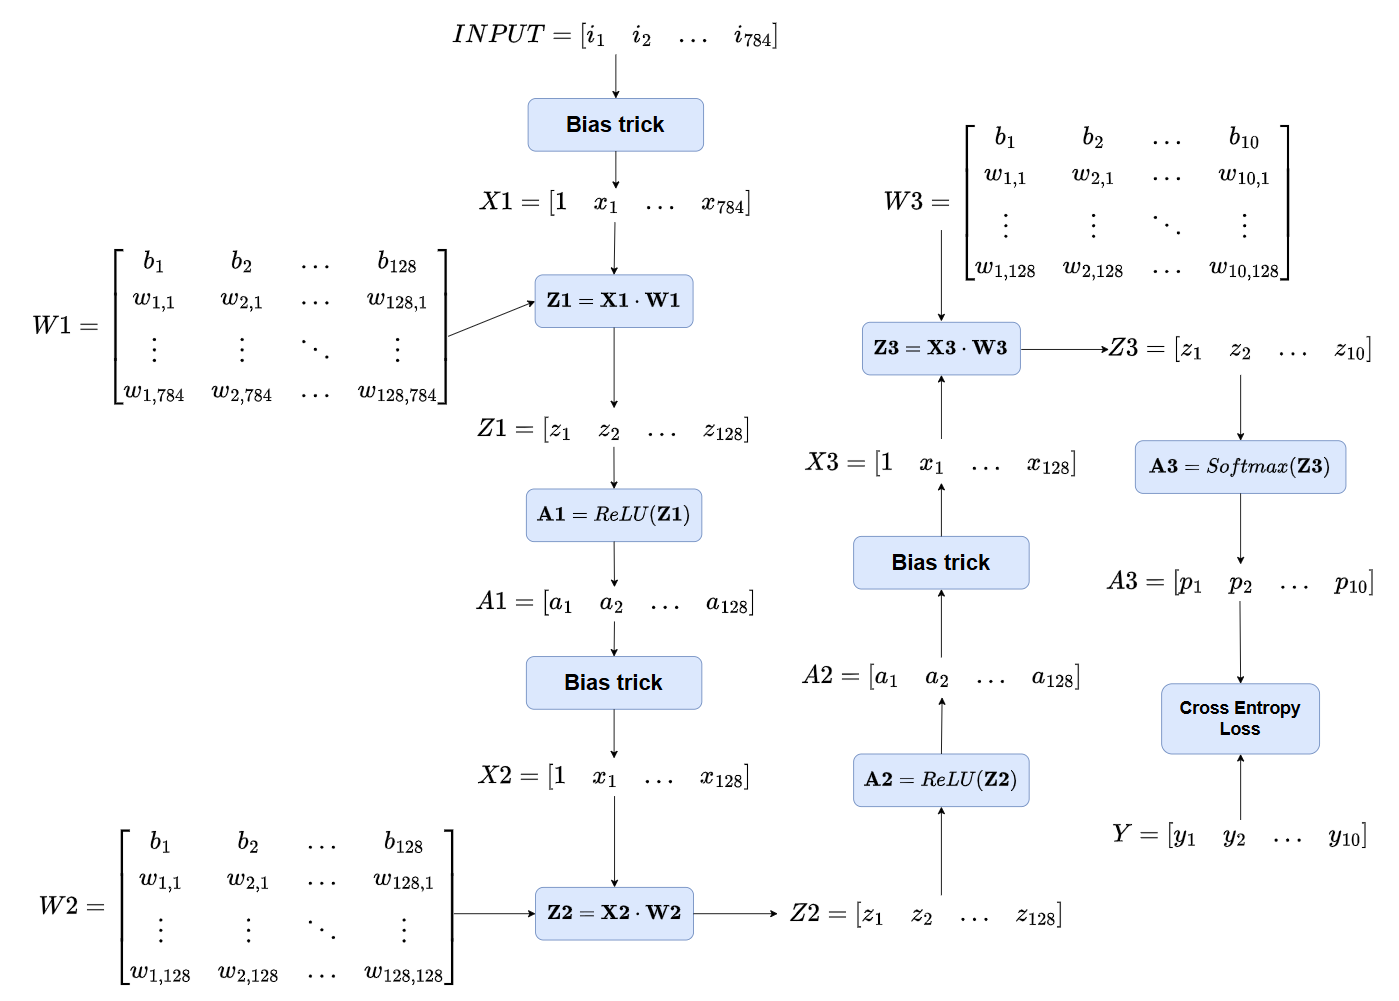

## 3.4. Mô tả thí nghiệm

### Chi tiết về bộ dữ liệu

Bộ dữ liệu Fashion-MNIST được sử dụng chủ yếu để thử nghiệm các mô hình phân loại hình ảnh. Bộ dữ liệu này có 10 lớp khác nhau, mỗi lớp tương ứng với một loại trang phục, giúp mô hình học cách phân loại các hình ảnh của sản phảm thời trang.

Fashion-MNIST bao gồm hai phần chính:
- Training Set: Gồm 60000 hình ảnh, mỗi hình ảnh có kích thước 28x28 pixel và được gán nhãn thuộc một trong 10 lớp thời trang.
- Test Set: Gồm 10000 hình ảnh, mỗi ảnh cũng có kích thước 28x28 pixel và gán nhãn tương tự.

Mỗi hình ảnh trong bộ dữ liệu được gán một nhãn từ 0 đến 9, mỗi số đại diện cho một loại trang phục cụ thể:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

### Thiết bị

Tesla T4 GPU một trong những kiến trúc mới nhất của NVIDIA, mang lại hiệu suất cao. Đặc biệt ta có thể sử dụng miễn phí mỗi ngày trên Google Colab nhưng lại bị giới hạn thời gian. Với 2560 CUDA cores, 320 Tensor Cores, 16 GB GDDR6 và băng thông bộ nhớ 320GB/s.

### Các tham số được sử dụng

Nhóm thực hiện và thử nghiệm với nhiều tham số và dưới đây là những tham số được chọn lọc tốt nhất:
- Nhóm sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong `10 epoch`. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (`batch size = 64`) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.
- Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.
- Nhóm sẽ sử dụng tốc độ học (`learning rate`) là `0.1` để cập nhật trọng số trong quá trình huấn luyện.

### Thực thi code

In [ ]:
%time
!nvcc -O3 -use_fast_math host_model_v1.cu -o host_model_v1
!nsys nvprof ./host_model_v1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch 1/10, Train loss: 0.4319695234, Train accuracy: 0.841767
[>] Epoch 2/10, Train loss: 0.3727906644, Train accuracy: 0.863367
[>] Epoch 3/10, Train loss: 0.3395258188, Train accuracy: 0.875933
[>] Epoch 4/10, Train loss: 0.3253435791, Train accuracy: 0.877867
[>] Epoch 5/10, Train loss: 0.3152741492, Train accuracy: 0.883317
[>] Epoch 6/10, Train loss: 0.2878151834, Train accuracy: 0.892200
[>] Epoch 7/10, Train loss: 0.2707888484, Train accuracy: 0.900100
[>] Epoch 8/10, Train loss: 0.2901187837, Train accuracy: 0.892883
[>] Epoch 9/10, Train loss: 0.2845759094, Train accuracy: 0.890533
[>] Epoch 10/10, Train loss: 0.2668075264, Train

## 3.5. Nhận xét kết quả

### Kết quả chạy

```txt
[>] Epoch 1/10, Train loss: 0.4319695234, Train accuracy: 0.841767
[>] Epoch 2/10, Train loss: 0.3727906644, Train accuracy: 0.863367
[>] Epoch 3/10, Train loss: 0.3395258188, Train accuracy: 0.875933
[>] Epoch 4/10, Train loss: 0.3253435791, Train accuracy: 0.877867
[>] Epoch 5/10, Train loss: 0.3152741492, Train accuracy: 0.883317
[>] Epoch 6/10, Train loss: 0.2878151834, Train accuracy: 0.892200
[>] Epoch 7/10, Train loss: 0.2707888484, Train accuracy: 0.900100
[>] Epoch 8/10, Train loss: 0.2901187837, Train accuracy: 0.892883
[>] Epoch 9/10, Train loss: 0.2845759094, Train accuracy: 0.890533
[>] Epoch 10/10, Train loss: 0.2668075264, Train accuracy: 0.897967

Evaluating the model on the full test set...
[>] Test loss: 0.3608682752
[>] Test accuracy: 0.865200
```


### Nhận xét

#### 1. Quá trình huấn luyện

- **Giảm Loss:** Trong suốt 10 epoch, ta thấy rằng loss giảm dần từ 0.4319 xuống 0.2668, cho thấy mô hình đang học và tối ưu hóa tốt. Điều này cho thấy mô hình đang học tốt từ dữ liệu và cải thiện khả năng phân loại.
- **Tăng Accuracy:** Accuracy của mô hình trong suốt quá trình huấn luyện tăng dần từ 84.18% lên 89.90%. Điều này cho thấy mô hình đang cải thiện khả năng phân loại, tuy nhiên, tốc độ tăng accuracy có xu hướng chậm lại trong các epoch cuối. Điều này có thể chỉ ra rằng mô hình đã gần đạt đến hiệu suất tối ưu và khó có thể cải thiện hơn nữa nếu không thay đổi kiến trúc hoặc tham số.

#### 2. Đánh giá trên tập kiểm tra

**Test loss và accuracy:** Khi đánh giá trên tập kiểm tra, ta nhận được test accuracy là 86.52% và test loss là 0.3609. So với accuracy trên tập huấn luyện (khoảng 89.80%), độ chính xác trên tập kiểm tra thấp hơn một chút. Điều này có thể chỉ ra một mức độ overfitting nhẹ, tức là mô hình học quá tốt trên tập huấn luyện nhưng không tổng quát hóa tốt trên dữ liệu chưa thấy trước đó (tập kiểm tra). Tuy nhiên, sự khác biệt không quá lớn, cho thấy mô hình vẫn có khả năng tổng quát khá tốt.

#  
---

# 4. Cài đặt tuần tự lần 2

## 4.1. Tổng quan

Ở phiên bản này thì hầu hết quy trình và ý nghĩa của mạng ANN vẫn được giữ nguyên, nhóm tập trung vào việc **xây dựng cấu trúc dữ liệu** như thế nào để phiên bản cải tiến của quá trình song song trở nên dễ dàng và dễ cải tiến hơn. Cũng như việc sử dụng **Bias trick** được thực hiện tự động không cần phải qua một bước trung gian.

## 4.2. Mô hình thực thi

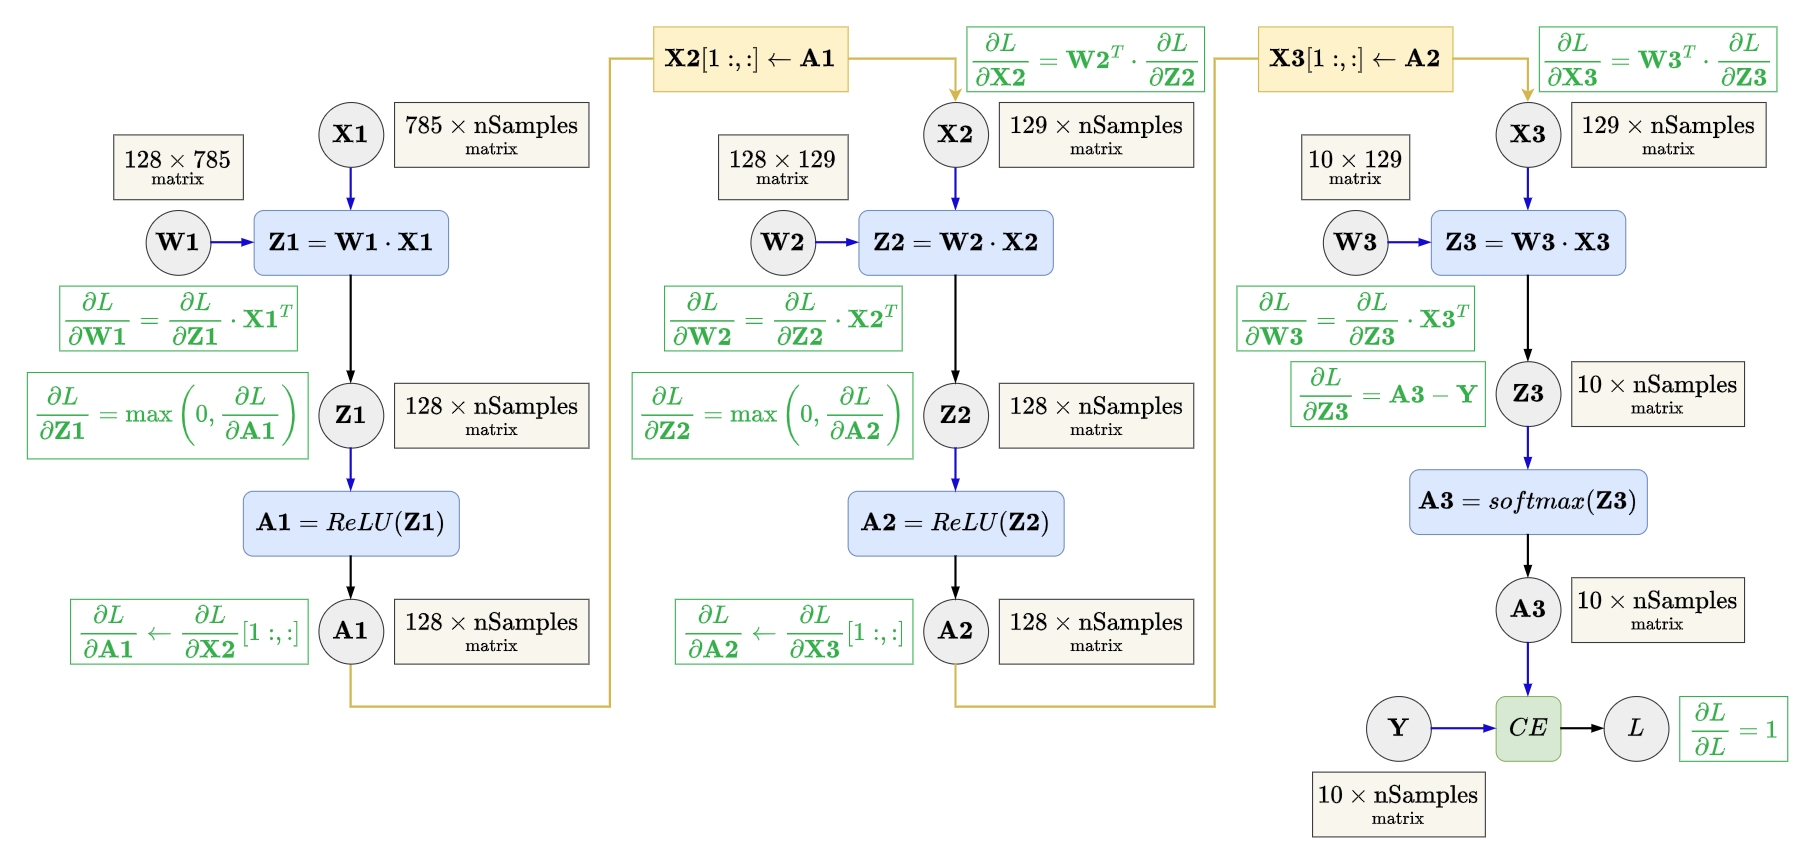

## 4.3. Chi tiết

### 📌 Tự động gán dữ liệu

Ở đây chúng em sử dụng kỹ thuật **Aliasing** để con trỏ cần thiết (cụ thể ở đây là B và phần màu xanh của A) trỏ đến chung một vùng nhớ và thao tác trên cùng một dữ liệu. Điều này cho phép khi ta thực hiện cập nhật giá trị cho một ma trận nào đó trong quá trình lan truyền của ANN, thì giá trị sẽ tự động cập nhật phần cần thiết cho ma trận mà ta muốn.

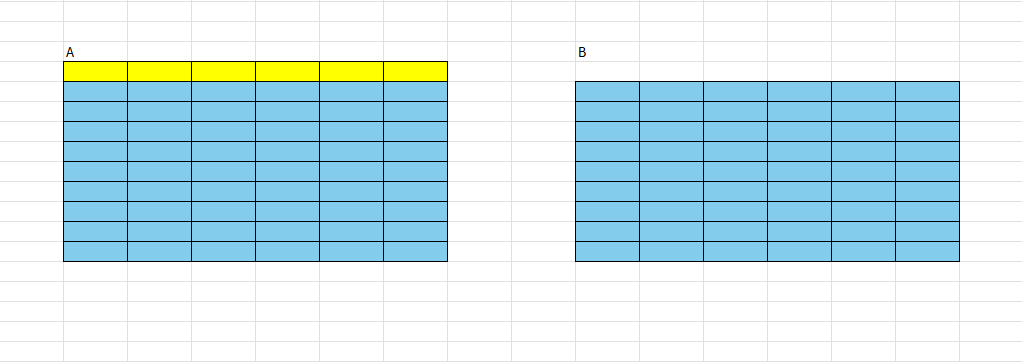

### 📌 Thay đổi cấu trúc dữ liệu

Trình tự các bước thực hiện chi tiết quá trình tuần tự (Hình dưới):
- Dữ liệu sẽ được đọc vào sẽ được chuyển vị thành một vector cột có shape là $ 784 \times 1 $.
- Các công việc sử dụng **Bias trick** sẽ được tự động gán bằng cách trên.
- Những quá trình tiếp theo vẫn sẽ được làm một cách bình thường chỉ khác kích thước của ma trận.

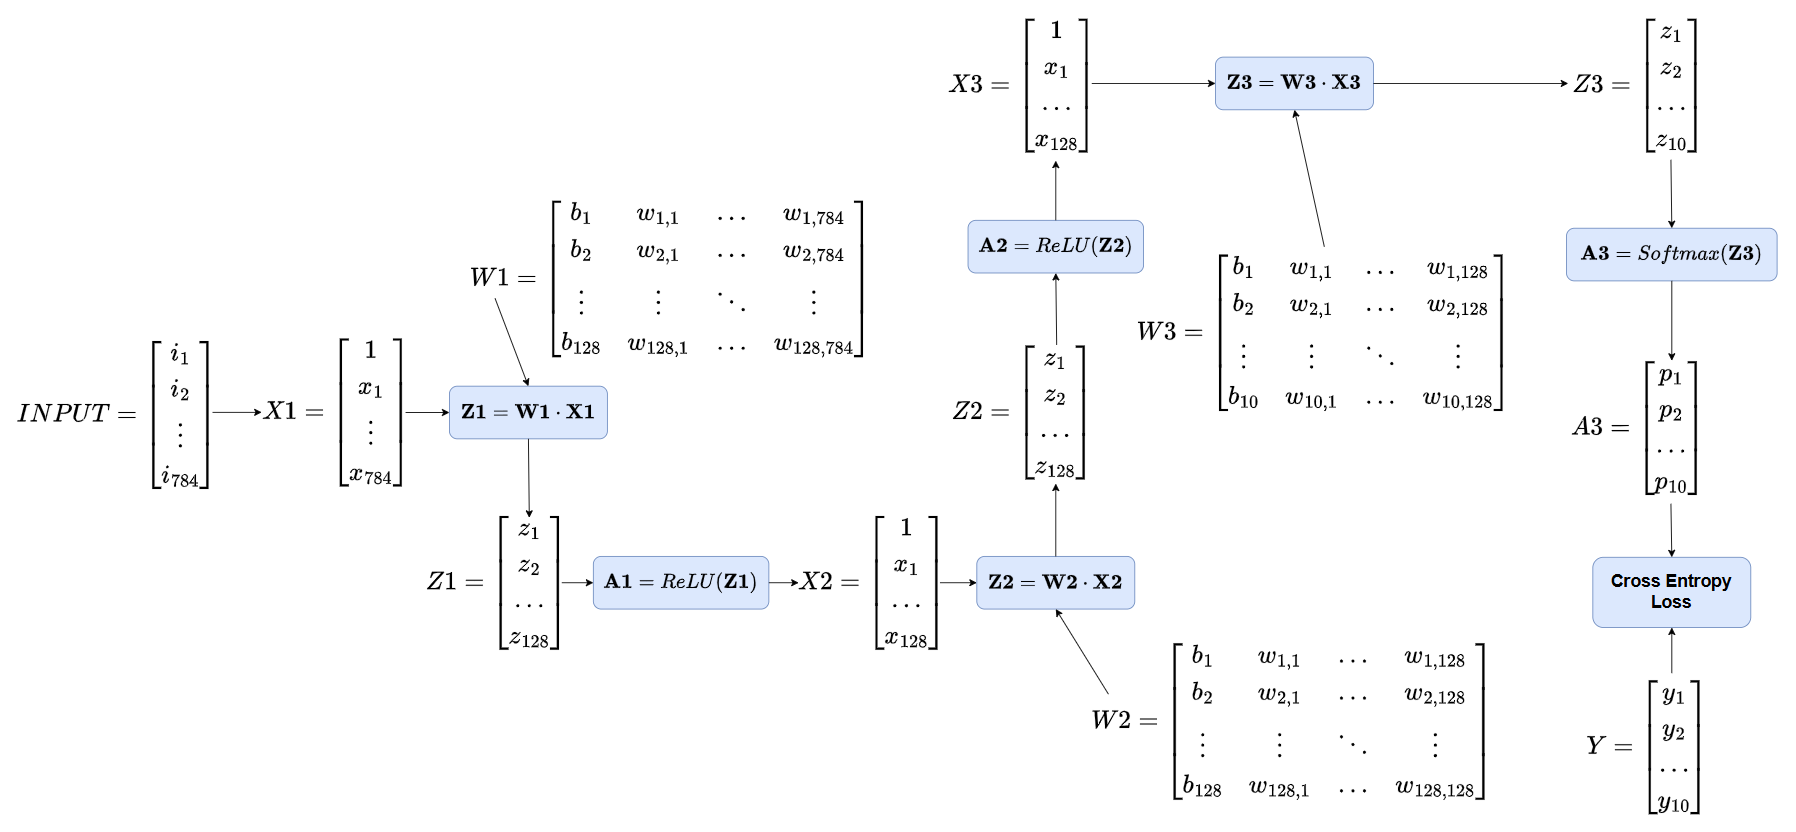

## 4.4. Mô tả thí nghiệm

### Chi tiết về bộ dữ liệu

Bộ dữ liệu Fashion-MNIST được sử dụng chủ yếu để thử nghiệm các mô hình phân loại hình ảnh. Bộ dữ liệu này có 10 lớp khác nhau, mỗi lớp tương ứng với một loại trang phục, giúp mô hình học cách phân loại các hình ảnh của sản phảm thời trang.

Fashion-MNIST bao gồm hai phần chính:
- Training Set: Gồm 60000 hình ảnh, mỗi hình ảnh có kích thước 28x28 pixel và được gán nhãn thuộc một trong 10 lớp thời trang.
- Test Set: Gồm 10000 hình ảnh, mỗi ảnh cũng có kích thước 28x28 pixel và gán nhãn tương tự.

Mỗi hình ảnh trong bộ dữ liệu được gán một nhãn từ 0 đến 9, mỗi số đại diện cho một loại trang phục cụ thể:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

### Thiết bị

Tesla T4 GPU một trong những kiến trúc mới nhất của NVIDIA, mang lại hiệu suất cao. Đặc biệt ta có thể sử dụng miễn phí mỗi ngày trên Google Colab nhưng lại bị giới hạn thời gian. Với 2560 CUDA cores, 320 Tensor Cores, 16 GB GDDR6 và băng thông bộ nhớ 320GB/s.

### Các tham số được sử dụng

Nhóm thực hiện và thử nghiệm với nhiều tham số và dưới đây là những tham số được chọn lọc tốt nhất:
- Nhóm sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong `10 epoch`. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (`batch size = 64`) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.
- Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.
- Nhóm sẽ sử dụng tốc độ học (`learning rate`) là `0.1` để cập nhật trọng số trong quá trình huấn luyện.

### Thực thi code

In [ ]:
%time
!nvcc -O3 -use_fast_math host_model_v2.cu -o host_model_v2
!nsys nvprof ./host_model_v2

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4434850812, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3818791807, Train accuracy: 0.860283
[>] Epoch   3/10, Train loss: 0.3441822827, Train accuracy: 0.874333
[>] Epoch   4/10, Train loss: 0.3216446042, Train accuracy: 0.880567
[>] Epoch   5/10, Train loss: 0.3372273743, Train accuracy: 0.872683
[>] Epoch   6/10, Train loss: 0.2888057530, Train accuracy: 0.891100
[>] Epoch   7/10, Train loss: 0.2720386684, Train accuracy: 0.899917
[>] Epoch   8/10, Train loss: 0.2849256098, Train accuracy: 0.892550
[>] Epoch   9/10, Train loss: 0.2619722188, Train accuracy: 0.901233
[>] Epoch  10/10, Train loss: 

## 4.4. Nhận xét kết quả

### Kết quả chạy

- Chạy version 1:

```txt
[>] Epoch 1/10, Train loss: 0.4319695234, Train accuracy: 0.841767
[>] Epoch 2/10, Train loss: 0.3727906644, Train accuracy: 0.863367
[>] Epoch 3/10, Train loss: 0.3395258188, Train accuracy: 0.875933
[>] Epoch 4/10, Train loss: 0.3253435791, Train accuracy: 0.877867
[>] Epoch 5/10, Train loss: 0.3152741492, Train accuracy: 0.883317
[>] Epoch 6/10, Train loss: 0.2878151834, Train accuracy: 0.892200
[>] Epoch 7/10, Train loss: 0.2707888484, Train accuracy: 0.900100
[>] Epoch 8/10, Train loss: 0.2901187837, Train accuracy: 0.892883
[>] Epoch 9/10, Train loss: 0.2845759094, Train accuracy: 0.890533
[>] Epoch 10/10, Train loss: 0.2668075264, Train accuracy: 0.897967

Evaluating the model on the full test set...
[>] Test loss: 0.3608682752
[>] Test accuracy: 0.865200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |     8056.318 |      7655.053 |
| Hidden 2 |     1206.264 |      2283.341 |
| Output   |      122.355 |       106.683 |
*----------*--------------*---------------*
```

- Chạy version 2:

```txt
[>] Epoch   1/10, Train loss: 0.4434850812, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3818791807, Train accuracy: 0.860283
[>] Epoch   3/10, Train loss: 0.3441822827, Train accuracy: 0.874333
[>] Epoch   4/10, Train loss: 0.3216446042, Train accuracy: 0.880567
[>] Epoch   5/10, Train loss: 0.3372273743, Train accuracy: 0.872683
[>] Epoch   6/10, Train loss: 0.2888057530, Train accuracy: 0.891100
[>] Epoch   7/10, Train loss: 0.2720386684, Train accuracy: 0.899917
[>] Epoch   8/10, Train loss: 0.2849256098, Train accuracy: 0.892550
[>] Epoch   9/10, Train loss: 0.2619722188, Train accuracy: 0.901233
[>] Epoch  10/10, Train loss: 0.2569807172, Train accuracy: 0.903900

Evaluating the model on the full test set...
[>] Test loss: 0.3446573913
[>] Test accuracy: 0.872300

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |     7714.038 |      6018.303 |
| Hidden 2 |     1174.768 |      2193.204 |
| Output   |      119.534 |       100.554 |
*----------*--------------*---------------*
```


### Nhận xét

#### 1. Quá trình huấn luyện

- **Giảm Loss:** Trong suốt 10 epoch, ta thấy rằng loss giảm dần từ 0.4334 xuống 0.2669, cho thấy mô hình đang học và tối ưu hóa tốt. Điều này cho thấy mô hình đang học tốt từ dữ liệu và cải thiện khả năng phân loại.
- **Tăng Accuracy:** Accuracy của mô hình trong suốt quá trình huấn luyện tăng dần từ 83.49% lên 90.39%. Điều này cho thấy mô hình đang cải thiện khả năng phân loại, tuy nhiên, tốc độ tăng accuracy có xu hướng chậm lại trong các epoch cuối. Điều này có thể chỉ ra rằng mô hình đã gần đạt đến hiệu suất tối ưu và khó có thể cải thiện hơn nữa nếu không thay đổi kiến trúc hoặc tham số.

#### 2. Đánh giá trên tập kiểm tra

**Test loss và accuracy:** Khi đánh giá trên tập kiểm tra, ta nhận được test accuracy là 87.23% và test loss là 0.3446. So với accuracy trên tập huấn luyện (khoảng 90%), độ chính xác trên tập kiểm tra thấp hơn một chút. Điều này có thể chỉ ra một mức độ overfitting nhẹ, tức là mô hình học quá tốt trên tập huấn luyện nhưng không tổng quát hóa tốt trên dữ liệu chưa thấy trước đó (tập kiểm tra). Tuy nhiên, sự khác biệt không quá lớn, cho thấy mô hình vẫn có khả năng tổng quát khá tốt.

#### 3. So sánh 2 version

Khi so sánh 2 version ta có thể thấy rõ:
- Tốc độ chạy version 2 nhanh hơn ở tất cả các layer.
- Độ chính xác của version 2 cao hơn khi xét 10 epochs.
- Tốc độ học của version 2 nhanh hơn. Do loss giảm nhanh hơn.
- Đặc biệt ở version 2 ta có thể lập trình song song một cách dễ dàng hơn.

#  
---

# 5. Cài đặt song song lần 1 - GMEM & Basic kernel

- Sau khi đã có sự cải tiến của phiên bản tuần tự, chúng em sẽ tiến hành song song hoá trên mô hình dựa trên phiên bản host vừa được nâng cấp.

## 📌 Phân tích bài toán

- Trong mô hình ANN classification trên host, chúng ta sẽ sử dụng nhiều hàm kernel song song hóa nhằm khai thác tối đa hiệu suất GPU trong việc xử lý các tác vụ lan truyền xuôi, lan truyền ngược, và tính toán gradient. 

- Việc lựa chọn song song hoá dựa trên khối lượng tính toán lớn, nhất là khi xử lý các ma trận có kích thước lớn (ví dụ: ma trận đầu vào, gradient, v.v.) để tăng tốc huấn luyện như các hàm: 
    - Nhân ma trận.
    - Chuyển vị ma trận.

- Cùng với sự cải tiến cho các hàm trở thành column-wised trong phiên bản host nâng cấp, chúng em sẽ tiến hành song song hoá cả những hàm trong nhóm:
    - addBiasUnit.
    - Apply softmax.
    - One-hot encoding.
    - Predict labels.
- Thêm vào đó, chúng em cũng vẫn xem xét song song hoá các hàm không quá nặng về tính toán (Thường là các hàm Element-wised) như:
    - ReLU và ReLU backward.
    - Trừ 2 ma trận.
    - Tính độ lỗi CE.
    - UpdateWeights.

## 📌 Thiết kế thuật toán

### 1. Kernel: `addBiasUnitKernel`
- **Chức năng:** Thêm giá trị bias (1.0) vào các phần tử trong ma trận `input`.
- **Cách song song hóa:**
  - Mỗi thread xử lý một cột trong ma trận.
- **Vị trí sử dụng:** Lan truyền xuôi, trước khi tính toán trên tầng fully-connected.

### 2. Kernel: `applyReluKernel` (phiên bản 2D)
- **Chức năng:** Áp dụng hàm ReLU trên ma trận 2D.
- **Cách song song hóa:**
  - Mỗi thread xử lý một phần tử (cạnh dòng/cột).
- **Vị trí sử dụng:** Lan truyền xuôi, ngay sau khi tính tích ma trận.

### 3. Kernel: `reluBackwardKernel`
- **Chức năng:** Tính gradient cho ReLU trong lan truyền ngược.
- **Cách song song hóa:**
  - Mỗi thread xử lý một phần tử trong ma trận gradient.
- **Vị trí sử dụng:** Lan truyền ngược, sau khi tính gradient cho layer fully-connected.

### 4. Kernel: `applySoftmaxKernel`
- **Chức năng:** Chuẩn hóa ma trận đầu ra theo softmax.
- **Cách song song hóa:**
  - Mỗi thread xử lý một cột trong ma trận (output vector).
- **Vị trí sử dụng:** Lan truyền xuôi, ngay sau tầng fully-connected cuối cùng.

### 5. Kernel: `subtractMatricesKernel`
- **Chức năng:** Trừ hai ma trận để tính gradient sai số.
- **Cách song song hóa:**
  - Mỗi thread xử lý một phần tử.
- **Vị trí sử dụng:** Lan truyền ngược khi tính gradient cho output.

### 6. Kernel: `crossEntropyLossKernel`
- **Chức năng:** Tính cross-entropy loss song song.
- **Cách song song hóa:**
  - Mỗi thread xử lý loss cho một sample.
- **Vị trí sử dụng:** Khi đánh giá loss trên output trong lan truyền xuôi.

### 7. Kernel: `oneHotEncodingKernel`
- **Chức năng:** Biểu diễn vector one-hot từ nhãn.
- **Cách song song hóa:**
  - Mỗi thread xử lý một nhãn.
- **Vị trí sử dụng:** Chuẩn bị dữ liệu huấn luyện.

### 8. Kernel: `transposeMatrixKernel`
- **Chức năng:** Chuyển vị ma trận (transpose).
- **Cách song song hóa:**
  - Mỗi thread xử lý một phần tử của ma trận.
- **Vị trí sử dụng:** Khi tính tích ma trận ngược.

### 9. Kernel: `matrixMultiplyKernel`
- **Chức năng:** Tính tích hai ma trận.
- **Cách song song hóa:**
  - Mỗi thread xử lý một phần tử kết quả.
- **Vị trí sử dụng:** Tính toán trong các tầng fully-connected.

### 10. Kernel: `predictLabelsKernel`
- **Chức năng:** Dự đoán nhãn từ ma trận xác suất đầu ra (P).
- **Cách song song hóa:**
  - Mỗi thread xử lý một mẫu dữ liệu (sample).
  - Từng thread tìm giá trị xác suất lớn nhất trong cột và gán nhãn tương ứng.
- **Vị trí sử dụng:**  Trong giai đoạn suy diễn (inference), sau khi tính toán softmax để lấy nhãn dự đoán cuối cùng.

## 📌 Đánh giá thuật toán

In [ ]:
!nvcc parallel_model_v1.cu -o test

In [ ]:
!nsys nvprof ./test


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437935352, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885481656, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434082568, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185304999, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252872825, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892844677, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729434371, 

Tóm tắt kết quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504498005
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      750.133 |       976.639 |
| Hidden 2 |      479.351 |      1195.715 |
| Output   |      423.132 |      1045.305 |
*----------*--------------*---------------*

 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     81.2    1,985,673,367     74,993   26,478.1   14,176.0     2,592  23,665,027    234,529.3  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      8.6      209,838,074     46,852    4,478.7    3,616.0     1,567   8,707,610     40,816.9  transposeMatrixKernel(float *, int, int, float *)
      4.0       98,729,691     28,110    3,512.3    2,528.0     1,536      10,208      1,762.1  updateWeightsKernel(float *, float *, int, int, float, int)
      1.9       46,352,762     18,740    2,473.5    2,432.0     1,760       4,193        305.7  reluBackwardKernel(float *, float *, float *, int, int)
      1.8       44,091,321     18,762    2,350.0    2,048.0     1,535     289,885      8,941.6  applyReluKernel(float *, int, int)
      1.7       40,570,490      9,381    4,324.8    4,287.0     3,296      19,488        689.5  applySoftmaxKernel(float *, int, int)
      0.7       17,375,120      9,370    1,854.3    1,824.0     1,440       3,200        239.9  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,700,851         11  154,622.8  169,503.0    25,760     190,047     44,469.5  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           71,007         11    6,455.2    6,815.0     3,200       7,680      1,182.3  predictLabelsKernel(float *, int *, int, int)
      0.0           28,544          9    3,171.6    2,784.0     2,592       4,320        691.8  addBiasUnitKernel(float *, int)
      0.0           19,712          2    9,856.0    9,856.0     6,272      13,440      5,068.5  oneHotEncodingKernel(int *, float *, int, int)
```


**Nhận xét kết quả:**
- Theo như kết quả của mô hình, ta thấy tổng thời gian chạy so với bản host v2 đã có nâng cấp thời gian chạy một cách đáng kể.
- Cụ thể thời gian chạy đã được cải thiện gấp nhiều lần so với phiên bản host v2:
    - Tại tầng ẩn 1: tốc độ lan truyền tiến cải thiện nhanh gấp **10 lần**, tốc độ lan truyền ngược cải thiện nhanh gấp **6 lần**.
    - Tại tầng ẩn 2: tốc độ lan truyền tiến cải thiện nhanh gấp **2.5 lần**, tốc độ lan truyền ngược cải thiện nhanh gấp **2 lần**.
- Xét đến độ chính xác:
    - Độ lỗi và cả độ chính xác đều không thay đổi nhiều, điều này minh chứng cho sự chính xác của mô hình được giữ nguyên sau khi song song hoá các hàm.
    - Lưu ý: Sau khi hoạt động nhóm cùng nhau, chúng em nhận thấy chắc chắn có khả năng mô hình chạy trên các máy khác nhau dù chung một thiết bị GPU nhưng vẫn cho ra kết quả khác nhau (chúng em sẽ nêu kỹ trong phần reflection).
- Thông qua sự cải tiến trên, chúng ta thấy được lợi ích to lớn mà song song hoá một mô hình có thể mang lại, giúp mô hình huấn luyện và thực thi phân lớp dữ liệu nhanh mà vẫn hiệu quả.

#  
---

# 6. Cài đặt song song lần 2 - GMEM & Optimized kernel

### Mô tả thiết lập thử nghiệm

Đây sẽ là thiết lập thử nghiệm để kiểm tra cho tất cả hàm được cải tiến trong phần này.

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại sản phẩm thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:**
    - **Tính đúng đắn:** Đảm bảo kết quả của hàm kernel đã cải tiến giống với kết quả của hàm kernel cơ bản:
        - Ta sẽ so sánh **độ lỗi cross-entropy** và **độ chính xác** (accuracy) giữa hai cách thiết kế hàm kernel trên toàn bộ tập dữ liệu huấn luyện và kiểm tra.

    - **Thời gian chạy:** So sánh thời gian chạy giữa hai phiên bản.

## 6.1. Hàm nhân 2 ma trận

### Hàm cơ bản

In [ ]:
!nvcc parallel_model_GMEM.cu -o multiply_matrix_test

In [ ]:
!nsys nvprof ./multiply_matrix_test


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437927008, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885479271, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434082866, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185313046, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252877891, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892844975, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729438245, 

Tóm tắt kết quả chạy chương trình:

``` TXT
Evaluating the model on the full test set...
[>] Test loss: 0.3504500389
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      697.875 |       888.725 |
| Hidden 2 |      441.819 |      1090.142 |
| Output   |      385.325 |       935.138 |
*----------*--------------*---------------*

Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name                             
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     81.4    1,830,404,831     74,993   24,407.7   13,152.0     2,432  22,735,238    223,575.9  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      8.5      190,693,476     46,852    4,070.1    3,328.0     1,472   8,718,890     40,852.2  transposeMatrixKernel(float *, int, int, float *)             
      4.0       90,226,464     28,110    3,209.8    2,336.0     1,440      10,176      1,641.0  updateWeightsKernel(float *, float *, int, int, float, int)   
      1.9       42,699,901     18,740    2,278.5    2,240.0     1,664       4,192        297.0  reluBackwardKernel(float *, float *, float *, int, int)       
      1.8       40,952,181     18,762    2,182.7    1,888.0     1,407     294,682      8,881.8  applyReluKernel(float *, int, int)                            
      1.7       37,276,285      9,381    3,973.6    3,968.0     3,231      20,447        680.7  applySoftmaxKernel(float *, int, int)                         
      0.7       15,899,937      9,370    1,696.9    1,696.0     1,344       3,200        232.9  subtractMatricesKernel(float *, float *, float *, int, int)   
      0.1        1,618,977         11  147,179.7  156,317.0    29,280     200,572     44,631.6  crossEntropyLossKernel(float *, float *, float *, int, int)   
      0.0           67,775         11    6,161.4    6,272.0     3,584       8,095      1,201.4  predictLabelsKernel(float *, int *, int, int)                 
      0.0           28,318          9    3,146.4    2,688.0     2,592       4,288        715.5  addBiasUnitKernel(float *, int)                               
      0.0           19,360          2    9,680.0    9,680.0     6,208      13,152      4,910.1  oneHotEncodingKernel(int *, float *, int, int)                

```

### Sử dụng Shared Memory và 2D Block Tiling

#### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

- Trong phiên bản cơ bản nhất của mô hình được chạy song song, mô hình chỉ sử dụng hàm nhân ma trận song song một cách cơ bản nhất.

- Cụ thể, trong hàm cơ bản dữ liệu được truy cập trực tiếp từ global memory, vốn có độ trễ cao và tốc độ truy cập chậm. Vì dựa trên lý thuyết nhân ma trận nên mỗi thread tính toán toàn bộ tích của một hàng từ ma trận $A$ với một cột từ ma trận $B$, dẫn đến truy cập rất nhiều lần vào các ô của $A$ và $B$ trên Global Memory.

- Do đó, ta cần phải tối ưu hàm này thông qua cách sử dụng Shared Memory và kỹ thuật Tiling. 
    - ***Shared Memory (SMEM)***: Bộ nhớ chia sẻ nằm trên SM (Streaming Multiprocessor) của GPU, rất gần với các lõi tính toán (CUDA cores). Việc truy cập SMEM có độ trễ thấp và băng thông cao.
    - ***Kỹ thuật Tiling***:  Ma trận được chia thành các tile nhỏ hơn (thường 1 tile có kích thước của 1 block) và mỗi thread block tính toán một phần nhỏ của kết quả.

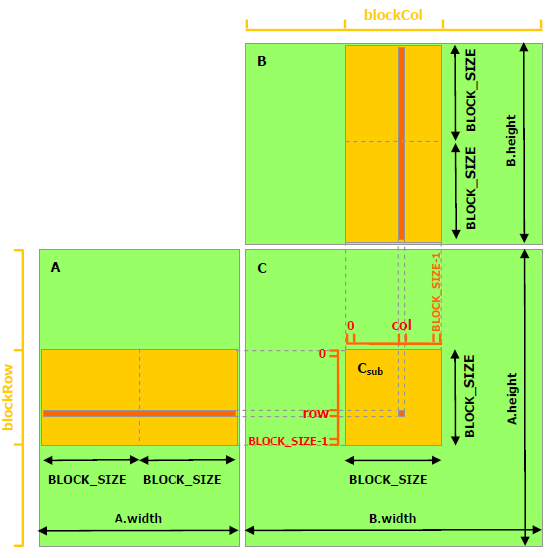

**Lý do cần tối ưu hóa:**  
1. Truy cập quá nhiều lần trên bộ nhớ GMEM khiến tốc độ chạy của mô hình chậm đi khá nhiều.
2. Khi sử dụng SMEM thay cho GMEM, việc sử dụng không có sự tổ chức cụ thể khiến việc truy xuất dữ liệu không đồng bộ và các thread không được đảm bảo để tận dụng hết công suất.

#### 📌 Thiết kế thuật toán

**Cách tối ưu:**  
1. **Kernel**: 
    - Không thay đổi thiết kế hàm nhân ma trận:
        - Đầu vào: ma trận $A$ (kích thước m x n), ma trận $B$ (kích thước n x k).
        - Đầu ra: ma trận $C$ (kích thước m x k) là kết quả nhân của 2 ma trận $A$ và $B$
2. **Shared Memory và Tiling**:
    - Thiết kế: sử dụng kết hợp SMEM và chia bộ nhớ thành các tile.
    - Dữ liệu sẽ được nạp từ GMEM và SMEM thành các Tile có kích thước bằng 1 block. Sau khi được nạp xong các thread trong cùng 1 block sẽ được đồng bộ hoá để tính toán trên cùng 1 Tile.
3. **Memory Optimization**:
    - Công suất của thread và bộ nhớ được sử dụng toàn bộ và hiệu quả.

#### 📌 Đánh giá thuật toán

In [ ]:
!nvcc matrix_multiply_test_1.cu -o multiply_matrix_test_v1

In [ ]:
!nsys nvprof ./multiply_matrix_test_v1


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437950253, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885480762, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434098363, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185306787, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252874613, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892839015, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729431689, 

Tóm tắt kết quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504509032
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      701.363 |       926.480 |
| Hidden 2 |      448.245 |      1117.976 |
| Output   |      409.966 |       989.782 |
*----------*--------------*---------------*

Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                                Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  ----------------------------------------------------------------
     78.9    1,639,984,887     74,993   21,868.5   13,056.0     3,584  17,812,036    182,200.8  matrixMultiplyKernelV1(float *, float *, float *, int, int, int)
      9.6      200,204,807     46,852    4,273.1    3,456.0     1,535   8,714,593     40,840.0  transposeMatrixKernel(float *, int, int, float *)
      4.5       94,018,748     28,110    3,344.7    2,400.0     1,535      10,240      1,703.6  updateWeightsKernel(float *, float *, int, int, float, int)
      2.1       44,273,278     18,740    2,362.5    2,336.0     1,792       4,160        295.8  reluBackwardKernel(float *, float *, float *, int, int)
      2.0       42,270,270     18,762    2,253.0    1,952.0     1,503     291,737      8,853.4  applyReluKernel(float *, int, int)
      1.8       38,392,885      9,381    4,092.6    4,063.0     3,264      19,392        667.9  applySoftmaxKernel(float *, int, int)
      0.8       16,501,208      9,370    1,761.1    1,759.0     1,439       3,200        231.3  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,655,454         11  150,495.8  162,717.0    30,912     193,788     41,963.9  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           68,572         11    6,233.8    6,463.0     3,616       7,840      1,028.9  predictLabelsKernel(float *, int *, int, int)
      0.0           28,478          9    3,164.2    2,784.0     2,591       4,287        694.3  addBiasUnitKernel(float *, int)
      0.0           19,359          2    9,679.5    9,679.5     6,208      13,151      4,909.4  oneHotEncodingKernel(int *, float *, int, int)

```


**Nhận xét**: 
- Tính chính xác: không thay đổi so với hàm cơ bản.
- Với việc sử dụng SMEM và các Tile để tối ưu hoá truy cập bộ nhớ đồng nhất, chúng ta đã giảm được thời gian chạy của chương trình xuống so với hàm cơ bản.
- Cụ thể, ta đã giảm được gần 200ms tổng thời gian chạy của hàm nhân ma trận.
- Thời gian tuy có giảm, nhưng không giảm được như kỳ vọng vì những khả năng như:
    - **Quy mô dữ liệu nhỏ (Small-scale Dataset)**: chi phí nạp và quản lý shared memory có thể lớn hơn lợi ích mang lại.
    - **Chi phí quản lý shared memory cao**: mỗi tile khi nạp vào SMEM được sử dụng lại không đủ nhiều. 

## 6.2. Hàm chuyển vị ma trận

### Hàm cơ bản

In [ ]:
!nvcc parallel_model_GMEM.cu -o transpose_matrix_test

In [ ]:
!nsys nvprof ./transpose_matrix_test


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437919259, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885483742, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434079885, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185304403, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252883554, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892836332, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729429901, 

Tóm tắt kết quả chạy chương trình:
``` txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504508436
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      656.802 |       910.621 |
| Hidden 2 |      436.491 |      1104.517 |
| Output   |      393.603 |       964.131 |
*----------*--------------*---------------*

 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name                             
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     78.4    1,202,459,126     74,993   16,034.3    7,359.0     1,983  29,328,898    273,954.2  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      7.0      106,973,562     46,852    2,283.2    1,952.0     1,376   3,447,830     16,096.3  transposeMatrixKernel(float *, int, int, float *)             
      5.7       87,620,874     28,110    3,117.1    2,239.0     1,407       9,247      1,586.7  updateWeightsKernel(float *, float *, int, int, float, int)   
      2.6       40,592,695     18,740    2,166.1    2,112.0     1,504       3,776        359.7  reluBackwardKernel(float *, float *, float *, int, int)       
      2.6       39,474,376     18,762    2,104.0    1,760.0     1,312     277,210      8,484.0  applyReluKernel(float *, int, int)                            
      2.5       38,724,650      9,381    4,128.0    3,968.0     3,168      17,824        861.4  applySoftmaxKernel(float *, int, int)                         
      1.0       15,767,207      9,370    1,682.7    1,632.0     1,311       2,976        301.6  subtractMatricesKernel(float *, float *, float *, int, int)   
      0.1        1,658,623         11  150,783.9  163,613.0    29,632     213,499     45,503.0  crossEntropyLossKernel(float *, float *, float *, int, int)   
      0.0           60,575         11    5,506.8    5,792.0     2,912       7,391      1,114.7  predictLabelsKernel(float *, int *, int, int)                 
      0.0           26,751          9    2,972.3    2,528.0     2,495       4,032        649.5  addBiasUnitKernel(float *, int)                               
      0.0           14,432          2    7,216.0    7,216.0     4,224      10,208      4,231.3  oneHotEncodingKernel(int *, float *, int, int) 
```

### Sử dụng Shared Memory

#### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

- Trong phiên bản cơ bản nhất của mô hình chạy song song, hàm chuyển vị ma trận chỉ chạy thuần trên thuật toán đơn giản nhất của chuyển vị ma trận.

- Với mỗi ma trận đầu vào, ta có 2 cách để chuyển vị ma trận:
    - **Cách 1**: Đọc ma trận đầu vào theo từng hàng và ghi vào ma trận đầu ra theo từng cột.
    - **Cách 2**: Đọc ma trận đầu vào theo từng cột và ghi vào ma trận đầu ra theo từng hàng.

- Trong cách cải tiến này ta sẽ dùng 1 cách hoàn toàn mới: Đọc ma trận đầu vào theo từng hàng và ghi vào ma trận đầu ra theo từng hàng.

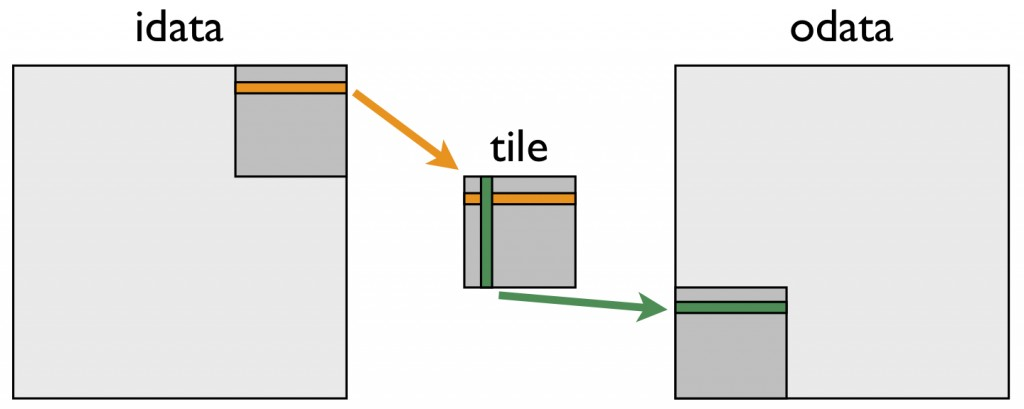

**Lý do cần tối ưu hóa:** 
- **Synchronization Overhead:** không đồng bộ hóa giữa các threads.

- **GMEM usage:** tốc độ truy xuất của GMEM chậm đáng kể so với SMEM.

- **Uncoalesced Memory Access:** Như đã đề cập bên trên, có 2 cách để chuyển vị theo cách cơ bản. Cả 2 cách này đều có khả năng đọc hay ghi không liên tục các địa chỉ trong bộ nhớ, vì bộ nhớ GMEM được truy xuất theo dòng (các sector) và nếu đọc hay ghi theo cột sẽ khiến việc này không tối ưu.

#### 📌 Thiết kế thuật toán

**Cách tối ưu:**
1. **Kernel**:
    - Không thay đổi tham số hàm chuyển vị ma trận:
        - Đầu vào: ma trận $A$ (kích thước m x n).
        - Đầu ra: ma trận $B$ (kích thước n x m) là ma trận chuyển vị của ma trận $A$.
2. **Shared Memory trung gian**:
    - Thiết kế: sử dụng Shared Memory (kích thước 1 block) làm trung gian cho việc chuyển vị - để hiện thực hoá mục tiêu đọc và viết dữ liệu đều theo dòng.
    - Đọc ma trận đầu vào theo dòng từ GMEM lưu vào SMEM theo dòng, sau đó đọc ma trận đã lưu trong SMEM theo cột và viết ma trận đó ra theo dòng.
    - Các thread trong cùng 1 block sẽ thao tác trong cùng 1 SMEM.

#### 📌 Đánh giá thuật toán

In [ ]:
!nvcc transpose_matrix_test_1.cu -o transpose_matrix_test_v1

In [ ]:
!nsys nvprof ./transpose_matrix_test_v1


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437946975, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885470033, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434076607, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185297847, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252873421, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892832756, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729434371, 

Tóm tắt kết quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504501283
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      697.710 |       890.219 |
| Hidden 2 |      436.185 |      1093.243 |
| Output   |      386.434 |       944.114 |
*----------*--------------*---------------*

 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     84.4    1,829,152,475     74,993   24,391.0   13,280.0     2,464  20,837,462    217,663.2  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      5.0      109,260,615     46,852    2,332.0    2,080.0     1,599   2,772,967     12,985.3  transposeMatrixKernelV2(float *, int, int, float *)
      4.2       90,466,123     28,110    3,218.3    2,304.0     1,440      10,208      1,648.7  updateWeightsKernel(float *, float *, int, int, float, int)
      2.0       42,804,009     18,740    2,284.1    2,240.0     1,760       4,192        304.9  reluBackwardKernel(float *, float *, float *, int, int)
      1.9       40,994,006     18,762    2,184.9    1,856.0     1,408     282,618      8,785.5  applyReluKernel(float *, int, int)
      1.7       37,350,130      9,381    3,981.5    3,904.0     3,168      17,023        676.0  applySoftmaxKernel(float *, int, int)
      0.7       15,943,521      9,370    1,701.5    1,664.0     1,375       3,200        239.3  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,548,960         11  140,814.5  156,413.0    29,407     163,996     38,476.6  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           64,991         11    5,908.3    6,272.0     3,552       6,624        882.2  predictLabelsKernel(float *, int *, int, int)
      0.0           28,576          9    3,175.1    2,816.0     2,592       4,288        688.1  addBiasUnitKernel(float *, int)
      0.0           19,392          2    9,696.0    9,696.0     6,272      13,120      4,842.3  oneHotEncodingKernel(int *, float *, int, int)
```


**Nhận xét**: 
- Tính chính xác: không thay đổi so với hàm cơ bản.

- Trên lý thuyết ta đã có thể tối ưu được việc sử dụng bộ nhớ một cách đồng bộ và hiệu quả thông qua sử dụng trung gian bộ nhớ Shared Memory.

- Tuy nhiên trong quá trình chạy và in ra kết quả lại không ghi nhận có sự cải thiện về tổng thời gian chạy của hàm này.

- Có những khả năng khiến hàm này không giảm thời như sau:
    - **Dữ liệu quá nhỏ để thấy sự cải thiện**: Fashion-MNIST có kích thước ảnh nhỏ (28x28 pixel) dẫn đến lợi ích của shared memory không đủ lớn để bù đắp chi phí quản lý shared memory.
    - **Không tận dụng đủ tài nguyên GPU (Under-utilization)**: Với dữ liệu nhỏ như Fashion-MNIST, số lượng threads/block và số lượng block có thể không đủ để tận dụng hết khả năng xử lý song song của GPU. 

### Hàm sử dụng Shared Memory và giải quyết Bank Conflict

#### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

- Đã chạy thành công phiên bản tối ưu truy xuất bộ nhớ (đọc và viết theo dòng) như trên.

- Sự cải tiến tiếp theo sẽ không mang tính đột phá mà sẽ hướng tới việc giải quyết vấn đề còn tồn đọng trong việc sử dụng SMEM như một ma trận trung gian: Vấn đề Bank Conflict.

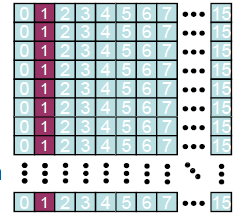

**Lý do cần tối ưu hóa:** 
- **Bank Conflict:** Trên vùng nhớ sẽ chia thành các Bank (có thể chia thành 16, 32, 64,... bank), và ở trường hợp này trong SMEM khi đọc các cột sẽ gây ra hiện tượng các thread truy cập vào chung một bank gây ra hiện tượng Bank Conflict.
- **Ví dụ:**
    - Thread (0,0) -> Bank 0
    - Thread (1,0) -> Bank 0
    - Thread (2,0) -> Bank 0

#### 📌 Thiết kế thuật toán

**Cách tối ưu:**  
1. **Kernel**: 
    - Không thay đổi tham số so với bản cải tiến trước:
        - Đầu vào: ma trận $A$ (kích thước m x n).
        - Đầu ra: ma trận $B$ (kích thước n x m) là ma trận chuyển vị của ma trận $A$.
2. **Sử dụng padding**:
    - Thiết kế: thêm một cột padding vào ma trận, biến ma trận từ 32x32 thành 32x33. 
    - Số lượng cột tăng lên làm phân tán các truy cập vào các banks khác nhau. Chuyển vị ma trận thường gây conflict khi dữ liệu được tổ chức đồng đều. Padding phá vỡ cấu trúc này.

#### 📌 Đánh giá thuật toán

In [ ]:
!nvcc transpose_matrix_test_2.cu -o transpose_matrix_test_v2

In [ ]:
!nsys nvprof ./transpose_matrix_test_v2


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437935352, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885475397, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434107006, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185303807, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252861202, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892838120, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729427814, 

Tóm tắt kết quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504502475
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      706.622 |       882.023 |
| Hidden 2 |      437.918 |      1091.890 |
| Output   |      388.878 |       951.027 |
*----------*--------------*---------------*

Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     84.4    1,822,986,400     74,993   24,308.8   13,344.0     2,463  20,747,803    217,960.1  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      5.0      108,791,751     46,852    2,322.0    2,080.0     1,599   2,764,392     12,948.2  transposeMatrixKernelV3(float *, int, int, float *)
      4.2       90,084,547     28,110    3,204.7    2,304.0     1,440      10,208      1,642.0  updateWeightsKernel(float *, float *, int, int, float, int)
      2.0       42,615,842     18,740    2,274.1    2,240.0     1,696       4,256        302.1  reluBackwardKernel(float *, float *, float *, int, int)
      1.9       40,819,488     18,762    2,175.6    1,888.0     1,408     282,490      8,749.0  applyReluKernel(float *, int, int)
      1.7       37,212,616      9,381    3,966.8    3,936.0     3,168      16,480        671.1  applySoftmaxKernel(float *, int, int)
      0.7       15,872,067      9,370    1,693.9    1,696.0     1,375       3,200        237.5  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,560,065         11  141,824.1  156,605.0    29,407     164,189     38,676.9  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           65,215         11    5,928.6    6,272.0     3,584       6,688        879.8  predictLabelsKernel(float *, int *, int, int)
      0.0           28,512          9    3,168.0    2,784.0     2,592       4,320        702.0  addBiasUnitKernel(float *, int)
      0.0           19,487          2    9,743.5    9,743.5     6,432      13,055      4,683.2  oneHotEncodingKernel(int *, float *, int, int)
```


**Nhận xét**: 
- Tính chính xác: không thay đổi so với hàm cơ bản.

- Trên lý thuyết ta đã có thể giảm thời gian chạy thông qua việc giải quyết hiện tượng Bank Conflict.

- Tuy nhiên trong quá trình chạy và in ra kết quả lại không ghi nhận có sự cải thiện về tổng thời gian chạy của hàm này.

- Những khả năng gây ra sự không cải thiện này có thể có chung nguyên nhân với hàm cải thiện phía trên.

## 6.3. Hàm Relu và ReluBackward

### Hàm cơ bản

In [ ]:
!nvcc parallel_model_GMEM.cu -o relu_test

In [ ]:
!nsys nvprof ./relu_test


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437933564, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885483444, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434096873, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185305893, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252866864, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892845273, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729431689, 

Tóm tắt kết quả chạy chương trình:
```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504496813
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      642.757 |       891.788 |
| Hidden 2 |      429.812 |      1084.073 |
| Output   |      389.691 |       957.929 |
*----------*--------------*---------------*

Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name                             
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     78.3    1,181,005,356     74,993   15,748.2    7,360.0     1,984  28,453,264    271,153.8  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      7.0      105,665,663     46,852    2,255.3    1,952.0     1,407   3,442,072     16,068.0  transposeMatrixKernel(float *, int, int, float *)             
      5.7       86,421,164     28,110    3,074.4    2,240.0     1,408       9,280      1,512.7  updateWeightsKernel(float *, float *, int, int, float, int)   
      2.7       40,165,480     18,740    2,143.3    2,112.0     1,663       3,776        288.5  reluBackwardKernel(float *, float *, float *, int, int)       
      2.6       39,068,606     18,762    2,082.3    1,776.0     1,343     261,243      8,413.1  applyReluKernel(float *, int, int)                            
      2.5       38,122,928      9,381    4,063.8    3,999.0     3,264      15,296        653.5  applySoftmaxKernel(float *, int, int)                         
      1.0       15,584,285      9,370    1,663.2    1,632.0     1,312       3,008        236.4  subtractMatricesKernel(float *, float *, float *, int, int)   
      0.1        1,572,931         11  142,993.7  158,365.0    28,256     169,341     39,935.7  crossEntropyLossKernel(float *, float *, float *, int, int)   
      0.0           58,048         11    5,277.1    5,728.0     2,784       6,048        922.3  predictLabelsKernel(float *, int *, int, int)                 
      0.0           26,816          9    2,979.6    2,560.0     2,432       4,000        637.3  addBiasUnitKernel(float *, int)                               
      0.0           14,304          2    7,152.0    7,152.0     4,160      10,144      4,231.3  oneHotEncodingKernel(int *, float *, int, int)
```

### Sử dụng Block 1D 

#### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

- Trong phiên bản cơ bản nhất của mô hình chạy song song, chúng ta sử dụng Block 2 chiều để lưu trữ dữ liệu và sử dụng các thread để thao tác trên dữ liệu đó.

- Sự cải tiến cho hàm này chỉ đơn giản là làm phẳng Block lưu trữ dữ liệu từ 2 chiều về 1 chiều.

**Lý do cần tối ưu hóa:** 
- **Warp Divergence:** Warp trên dữ liệu được lưu theo dòng với kích thước mỗi warp chứa 32 thread. Warp Divergence xảy ra khi các thread trên cùng một warp thực hiện các công việc khác nhau (thường xảy ra khi có câu lệnh if phân nhánh công việc). Việc sử dụng block 2D có thể dẫn đến hiện tượng mỗi hàng đều xảy ra warp divergence, tuy nhiên khi làm phẳng thành block 1D, warp divergence chỉ xảy ra tại 1 vị trí trên toàn bộ grid dữ liệu.

#### 📌 Thiết kế thuật toán

**Cách tối ưu:**  
1. **Kernel**: 
    - Thay đổi tham số so với hàm cơ bản:
        - Đầu vào: ma trận $A$ và tổng số phần tử của mảng sau khi trải phẳng ma trận, thay vì số dòng và số cột như hàm cơ bản.
        - Đầu ra: ma trận $B$.
2. **Sử dụng Block 1D**:
    - Sử dụng Block 1D và thay đổi câu lệnh kiểm tra kích thước trong kernel.

#### 📌 Đánh giá thuật toán

In [ ]:
!nvcc relu_and_reluBackward_test_1.cu -o relu_test_v1

In [ ]:
!nsys nvprof ./relu_test_v1


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437933564, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885481656, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434091210, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185305893, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252874911, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892836928, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729432583, 

Tóm tắt kêt quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504504859
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      638.922 |       880.501 |
| Hidden 2 |      430.156 |      1075.077 |
| Output   |      382.941 |       938.304 |
*----------*--------------*---------------*

Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     78.3    1,159,978,456     74,993   15,467.8    7,232.0     1,952  27,091,729    264,025.2  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      7.0      104,260,206     46,852    2,225.3    1,920.0     1,375   3,436,660     16,041.8  transposeMatrixKernel(float *, int, int, float *)
      5.7       85,167,337     28,110    3,029.8    2,208.0     1,376       9,375      1,487.5  updateWeightsKernel(float *, float *, int, int, float, int)
      2.6       39,126,683     18,740    2,087.9    2,048.0     1,472       3,744        268.9  reluBackwardKernelV2(const float *, float *, float *, int)
      2.6       37,971,274     18,762    2,023.8    1,760.0     1,280     245,018      7,827.2  applyReluKernelV2(float *, int)
      2.5       37,750,456      9,381    4,024.1    3,936.0     3,200      17,055        629.9  applySoftmaxKernel(float *, int, int)
      1.0       15,355,192      9,370    1,638.8    1,632.0     1,280       3,008        222.2  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,588,063         11  144,369.4  158,973.0    23,712     199,900     44,445.1  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           56,607         11    5,146.1    5,215.0     2,400       7,040      1,146.7  predictLabelsKernel(float *, int *, int, int)
      0.0           26,943          9    2,993.7    2,720.0     2,464       4,031        619.7  addBiasUnitKernel(float *, int)
      0.0           14,528          2    7,264.0    7,264.0     4,256      10,272      4,254.0  oneHotEncodingKernel(int *, float *, int, int)
```


**Nhận xét**: 
- Tính chính xác: không thay đổi so với hàm cơ bản.

- Giảm warp divergence khiến cho thời gian giảm tuy không nhiều nhưng đã có sự cải thiện (cụ thể là 1ms), vì số lần gọi của hàm này cũng chỉ một vài lần.

### Hàm sử dụng Block 1D và unrolling

#### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

- Trong bản cải tiến vừa rồi không có bước tiến gì lớn, nhưng mở ra tiềm năng unolling khi làm phẳng từ Block 2D về 1D.

- Trong sự cải tiến lần này, ta sẽ áp dụng kỹ thuật loop unrolling cho hàm relu và relu backward 1D

#### 📌 Thiết kế thuật toán

**Cách tối ưu:** 
1. **Loop Unrolling**:
    - Mỗi thread xử lý nhiều phần tử, cách nhau một khoảng stride (khoảng cách giữa các phần tử liên tiếp mà một thread chịu trách nhiệm).
    - Khi các thread xử lý nhiều phần tử trong stride, chúng có thể tận dụng local cache (L1 cache) hiệu quả hơn.
    - Loop unrolling giảm overhead liên quan đến vòng lặp (như kiểm tra điều kiện lặp và nhảy lệnh).
    - Trong khi cài đặt, ta sẽ sử dụng loop unrolling thủ công (stride = 4).

#### 📌 Đánh giá thuật toán

In [ ]:
!nvcc relu_and_reluBackward_test_2.cu -o relu_test_v2

In [ ]:
!nsys nvprof ./relu_test_v2


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4437919259, Train accuracy: 0.834967
[>] Epoch   2/10, Train loss: 0.3885484040, Train accuracy: 0.857817
[>] Epoch   3/10, Train loss: 0.3434087038, Train accuracy: 0.873300
[>] Epoch   4/10, Train loss: 0.3185308874, Train accuracy: 0.881133
[>] Epoch   5/10, Train loss: 0.3252881169, Train accuracy: 0.875883
[>] Epoch   6/10, Train loss: 0.2892841697, Train accuracy: 0.890517
[>] Epoch   7/10, Train loss: 0.2729433775, 

Tóm tắt kết quả chạy chương trình:

```txt
Evaluating the model on the full test set...
[>] Test loss: 0.3504501879
[>] Test accuracy: 0.872000

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      644.071 |       883.807 |
| Hidden 2 |      430.126 |      1087.260 |
| Output   |      383.579 |       951.182 |
*----------*--------------*---------------*

 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
     78.2    1,163,641,175     74,993   15,516.7    7,200.0     1,952  26,459,878    264,484.5  matrixMultiplyKernel(float *, float *, float *, int, int, int)
      7.0      104,303,148     46,852    2,226.2    1,920.0     1,375   3,445,716     16,085.1  transposeMatrixKernel(float *, int, int, float *)
      5.7       85,215,157     28,110    3,031.5    2,208.0     1,407       9,247      1,495.7  updateWeightsKernel(float *, float *, int, int, float, int)
      2.7       40,806,254     18,740    2,177.5    2,176.0     1,568       3,904        289.1  reluBackwardKernelV3(const float *, float *, float *, int)
      2.6       38,718,348     18,762    2,063.7    1,824.0     1,344     246,298      7,847.4  applyReluKernelV3(float *, int)
      2.5       37,880,367      9,381    4,038.0    4,032.0     3,263      14,751        647.1  applySoftmaxKernel(float *, int, int)
      1.1       15,666,225      9,370    1,672.0    1,664.0     1,312       3,008        231.4  subtractMatricesKernel(float *, float *, float *, int, int)
      0.1        1,618,494         11  147,135.8  163,549.0    28,159     166,108     40,790.4  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           58,271         11    5,297.4    5,696.0     2,816       5,984        948.7  predictLabelsKernel(float *, int *, int, int)
      0.0           26,622          9    2,958.0    2,560.0     2,464       4,032        650.4  addBiasUnitKernel(float *, int)
      0.0           14,496          2    7,248.0    7,248.0     4,256      10,240      4,231.3  oneHotEncodingKernel(int *, float *, int, int)
```


**Nhận xét**: 
- Tính chính xác: không thay đổi so với hàm cơ bản.

- Trên lý thuyết, ta có thể giảm thời gian thông qua việc tối ưu năng suất của thread và giảm overhead nhưng vì một vài khả năng khiến cho việc cải tiến này không đạt hiệu quả thời gian như mong muốn.

- Các khả năng: 
    - **ReLU rất nhẹ về tính toán**: Hàm ReLU chỉ bao gồm một phép so sánh và gán giá trị, không phải là một tác vụ tính toán nặng. Điều này khiến việc thay đổi thời gian chạy không đáng kể và cũng không có nhiều ý nghĩa.
    - **Dữ liệu quá nhỏ để thấy sự cải thiện**: Fashion-MNIST có kích thước ảnh nhỏ (28x28 pixel) dẫn đến lợi ích của shared memory không đủ lớn để bù đắp chi phí quản lý shared memory.

## 6.4. Hàm updateWeight và substractMatrix

### 📌 Phân tích bài toán

#### Phần áp dụng:

- **substractMatrix:** Trong quá trình lan truyền ngược của mô hình mạng nơ-ron, ta cần phải tính giá trị đạo hàm:

$$\frac{\partial L}{\partial \mathbf{Z3}}=\mathbf{A3}-\mathbf{Y}$$

- **updateWeight:** Sau khi quá trình lan truyền ngược kết thúc và các giá trị đạo hàm cần thiết được tính xong, thì ta sẽ áp dụng gradient descent để cập nhật lại ma trận trọng số.

#### Lý do cần tối ưu hóa:

- Trong mỗi vòng lặp (epoch), 2 hàm này sẽ được gọi `nSamples / batch size` lần đối với hàm `substractMatrix` và gấp 3 lần đối với hàm `updateWeight`, nên việc ta tối ưu hóa các hàm này sẽ giảm đáng kể thời gian thực thi chương trình, đặc biệt là trong quá trình training.

### 📌 Ý tưởng cải tiến

#### Sử dụng block 1D:

- Ở phiên bản basic GPU kernel, việc sử dụng block 2D sẽ làm cho số lượng Wrap phân kỳ bằng với số lượng hàng của ma trận mà chúng ta đang xét.
- Do đó, để khắc phục vấn đề này, nhóm chúng em sẽ sử dụng block 1D, trải phẳng dữ liệu và tính toán để làm giảm số Wrap phân kỳ về còn 1. 
- Việc này trên lý thuyết sẽ làm giảm thời gian thực thi của chương trình.

#### Sử dụng multiple streams:

- Vì nhận thấy việc cập nhật lại giá trị của 3 ma trận trọng số $W1$, $W2$ và $W3$ không liên quan gì đến nhau, nên nhóm quyết định cho 3 stream chạy song song để thực hiện công việc này.
- Việc này trên lý thuyết sẽ giảm thời gian thực thi chương trình.

### 📌 Đánh giá thuật toán

#### Chạy chương trình

`a)` Sử dụng block 1D cho `updateWeight` và `substractMatrix`:

In [ ]:
%time
!nvcc -O3 -use_fast_math test_updateWeightsAndSubmatrix_1.cu -o test_updateWeightsAndSubmatrix_1
!nsys nvprof ./test_updateWeightsAndSubmatrix_1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451108873, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814654648, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448194265, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181745112, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298662305, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879669964, Train

`b)` Sử dụng multiple streams cho `updateWeight`:

In [ ]:
%time
!nvcc -O3 -use_fast_math test_updateWeights_2.cu -o test_updateWeights_2
!nsys nvprof ./test_updateWeights_2

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451126754, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814645708, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448206484, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181749880, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298664093, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879672945, Train

#### Quan sát kết quả và nhận xét

- Kết quả khi chưa tối ưu:

```txt
 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
      3.3       75,980,723     28,110    2,703.0    1,920.0     1,312       8,096      1,353.3  updateWeightsKernel(float *, float *, int, int, float, int)
      0.7       16,476,581      9,370    1,758.4    1,760.0     1,376       3,232        239.4  subtractMatricesKernel(float *, float *, float *, int, int)
(*) Average time to update weights in 1 epoch: 705.983 ms
(*) Average time to substract matrix in 1 epoch: 209.987 ms
```

- Kết quả sau khi dùng block 1D:

```txt
 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
      3.2       73,667,694     28,110    2,620.7    1,856.0     1,407       7,616      1,216.4  updateWeightsKernel(float *, float *, int, float, int)
      0.7       17,194,480      9,370    1,835.1    1,824.0     1,408       3,328        239.5  subtractMatricesKernel(float *, float *, float *, int)
(*) Average time to update weights in 1 epoch: 700.434 ms
(*) Average time to substract matrix in 1 epoch: 198.287 ms
```

- Kết quả sau khi dùng multiple streams:

```txt
 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
      3.5       82,869,657     28,110    2,948.0    2,272.0     1,695      14,464      1,117.5  updateWeightsKernel(float *, float *, int, float, int)
(*) Average time to update weights in 1 epoch: 690.799 ms
```


- **Nhận xét**:

    - Độ chính xác: Kết quả của các hàm cải tiến cho ra kết quả giống với trước khi cải tiến.

    - Sử dụng block 1D đã giảm lượng đóng góp thời gian của hàm **updateWeight** đi **0.1%** vào toàn bộ thời gian, và hàm **substractMatrix** thì lại không có nhiều thay đổi. Từ đó ta có thể đưa ra được kết luận rằng: việc ta sử dụng block 1D để giảm wrap phân kỳ có thể cải thiện được thời gian thực thi.

    - Sử dụng multiple stream trong hàm **updateWeight** thì cho ta kết quá không khả thi, khi độ đóng góp về mặt thời gian tăng lên **0.2%**. Nhưng ta lại có thể nhìn thấy sự giảm nhẹ từ **705ms** xuống **690ms** trong trung bình thời gian tính toán cho mỗi epoch. Việc này cũng một phần cho ta thấy việc song song các tác vụ riêng biệt trên các stream khác nhau có thể làm giảm thời gian thực thi của các tác vụ đó.

## 6.5. Hàm oneHotEncoding, computeCrossEntropyLoss

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

- **oneHotEncoding:** Trong quá trình chuẩn bị dữ liệu, hàm này được sử dụng để biến label của data về dạng one-hot, nhằm thuận tiện cho việc tính giá trị mất mát.

- **computeCrossEntropyLoss:** Trong quá trình lan truyền tiến, hàm này đóng vai trò quan trọng để có thể cho ta biết mô hình có được cải thiện hay không.

#### Lý do cần tối ưu hóa:

- Tuy những hàm này chiếm lượng thời gian khá nhỏ, nhưng việc tối ưu hóa chúng cũng một phần giúp nhóm có nhiều cách phát triển hơn cho những hàm khác, cũng như góp phần giúp giảm thời gian thực thi chương trình.

### 📌 Ý tưởng cải tiến

#### Sử dụng multiple streams:

- Ở phiên bản nâng cấp này, nhóm quyết định thử nghiệm với việc chia bài toán thành `n` (ở đây ta chọn `n = 3`) phần nhỏ để các stream quản lý các phần.
- Việc làm này trên lý thuyết sẽ giảm thời gian thực thi và đã được thực nghiệm ở một vài bài toán trước đó.

### 📌 Đánh giá thuật toán

#### Chạy chương trình

- Sử dụng multiple streams cho cả hai hàm:

In [ ]:
%time
!nvcc -O3 -use_fast_math test_other_function_2.cu -o test_other_function_2
!nsys nvprof ./test_other_function_2

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451100826, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814671040, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448201120, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181744516, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298686445, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879686952, Train

#### Phân tích kết quả và nhận xét

- Kết quả khi chưa tối ưu:

```txt
 Time (%)  Total Time (ns)  Instances  Avg (ns)   Med (ns)   Min (ns)   Max (ns)   StdDev (ns)                               Name
 --------  ---------------  ---------  ---------  ---------  --------  ----------  -----------  --------------------------------------------------------------
      0.1        1,621,944         11  147,449.5  158,240.0    33,055     194,270     41,874.9  crossEntropyLossKernel(float *, float *, float *, int, int)
      0.0           19,424          2    9,712.0    9,712.0     6,208      13,216      4,955.4  oneHotEncodingKernel(int *, float *, int, int)
```

- Kết quả khi dùng multiple streams để tối ưu:

```txt
 Time (%)  Total Time (ns)  Instances  Avg (ns)  Med (ns)  Min (ns)   Max (ns)   StdDev (ns)                                  Name
 --------  ---------------  ---------  --------  --------  --------  ----------  -----------  ---------------------------------------------------------------------
      0.1        1,751,736         33  53,082.9  55,872.0    12,000      65,087     13,439.4  crossEntropyLossKernel(float *, float *, float *, int, int, int, int)
      0.0           37,953          6   6,325.5   6,176.5     5,728       7,168        602.6  oneHotEncodingKernel(int *, float *, int, int, int, int)
```


- **Nhận xét**:

    - Độ chính xác: Các hàm cải tiến cho ra kết quả giống với trước khi cải tiến.

    - Sử dụng multiple streams để chia dữ liệu thành nhiều phần cho ta thấy kết quả đang thay đổi theo hướng không cải thiện dù chỉ đóng góp một phần nhỏ về mặt thời gian. Nguyên nhân có thể là do overhead khi gọi hàm kernel nhiều lần.

#  
---

# 7. Cài đặt song song lần 3 - Unified memory

## 7.1. Tổng quan về mô hình song song phiên bản thứ 3

Trong lần song song hóa thứ 3, chúng ta sẽ tận dụng các hàm kernel đã được tối ưu hóa ở lần song song trước đó. Ta có thể kể đến một số hàm kernel nổi bật như:
- Hàm kernel nhân 2 ma trận có sử dụng `shared memory` (SMEM) và kỹ thuật `loop unrolling`.

- Hàm kernel chuyển vị ma trận có sử dụng `shared memory` (SMEM) và kỹ thuật `padding shared memory` để giảm thiểu hiện tượng `bank conflict`.

- Hàm kernel "Relu" và "ReluBackward" có sử dụng kỹ thuật `loop unrolling` để tối ưu hóa việc chạy trên GPU.

- Các hàm kernel thuộc nhóm "column-wise" như: hàm "softmax" và hàm "dự đoán nhãn của mẫu dữ liệu" sẽ tận dụng vùng nhớ cục bộ của mỗi thread để tối ưu hóa việc truy cập dữ liệu.

Đặc biệt, trong lần song song hóa này, chúng ta sẽ sử dụng `Unified memory` để giải quyết vấn đề về việc chia sẻ dữ liệu giữa CPU và GPU. Điều này giúp chúng ta không cần phải quản lý việc chuyển dữ liệu giữa CPU và GPU một cách thủ công, giúp tăng hiệu suất của chương trình nhờ vào việc tận dụng cơ chế quản lý bộ nhớ tự động của hệ thống.

Đồng thời, chúng ta cũng sẽ thử nghiệm kỹ thuật khởi tạo trọng số Kaiming He (hay còn gọi là He initialization) cho mô hình Neural Network. 

## 7.2. Giới thiệu về Unified memory

Ta có thể nói rằng: **Unified memory** là một bước tiến hoặc là một bước đột phá lớn vào thời kỳ của **CUDA 6**.

**Unified memory** là một bộ nhớ đặc biệt (nằm trên CPU) nhưng CPU và GPU đều cùng có thể truy cập trực tiếp mà không cần sao chép dữ liệu qua lại giữa hai loại bộ nhớ riêng biệt
> Và đó là lý do tại sao chúng ta nói Unified memory hoạt động dựa trên nguyên lý "zero-copy".

![Unified memory](https://images.viblo.asia/387b350c-fb19-4465-b404-2f080793d4ab.png)

Khi nói đến bộ nhớ, thì sẽ luôn đi kèm với hai khái niệm là: "Physical memory" và "Virtual memory". Nếu ta quan sát "Unified memory" từ hai góc nhìn này sẽ thấy sự khác biệt rõ ràng.
- **Virtual memory** (góc nhìn của lập trình viên): Ở góc nhìn này, Unified memory là một bộ nhớ thống nhất giữa CPU và GPU, tại đó CPU và GPU đều có thể truy cập dữ liệu một cách trực tiếp.

- **Physical memory** (góc nhìn của máy tính hoặc hệ thống): Ở góc nhìn này, CPU và GPU là hai bộ nhớ riêng biệt và không thể truy cập trực tiếp vào bộ nhớ của nhau mà phải thông qua kết nối PCI Express. Ở đây, Unified memory sẽ nằm ở CPU, nhưng nhờ vào cơ chế "zero-copy" nên chúng ta mới thấy Unified memory là bộ nhớ thống nhất giữa CPU và GPU.

> **Zero copy** là một phương thức giúp tối ưu hóa quá trình truyền dữ liệu. Trong cơ chế này, dữ liệu được "**tự động**" chuyển trực tiếp từ bộ nhớ của thiết bị này (ví dụ: CPU) sang thiết bị khác (ví dụ: GPU) mà không cần phải qua một bước trung gian (như bộ nhớ đệm - buffer). Điều này giúp giảm đáng kể thời gian và tài nguyên cần thiết cho việc sao chép dữ liệu, từ đó cải thiện hiệu suất tổng thể của chương trình.

![Zero copy](https://images.viblo.asia/8a541434-933b-4c70-aaf8-f443e8b3e564.png)

> Reference: [Lập trình song song] Bài 8: Unified memory - [viblo.asia](https://viblo.asia/p/lap-trinh-song-song-bai-8-unified-memory-vlZL932d4QK).  

## 7.3. Sử dụng Unified memory trong mô hình Neural Network

### 📌 Phân tích bài toán

**Phần cần tối ưu hóa:**  

Trong các phiên bản song song hóa trước đây, việc cấp phát bộ nhớ trên global memory cho các mảng/ma trận trong mô hình Neural Network thường dẫn đến các vấn đề về hiệu năng do việc sao chép dữ liệu giữa CPU và GPU. Cụ thể, dữ liệu cần được sao chép từ bộ nhớ trên host (CPU) sang bộ nhớ toàn cục trên device (GPU) trước khi được xử lý bởi các hàm kernel, và sau đó kết quả lại được sao chép ngược lại về CPU. Quá trình này tạo ra độ trễ đáng kể và làm giảm hiệu năng tổng thể của chương trình.

Khi sử dụng Unified Memory, chúng ta tối ưu chính quá trình này bằng cách loại bỏ (hoặc giảm thiểu đáng kể) nhu cầu sao chép dữ liệu tường minh. Unified Memory tạo ra một vùng nhớ duy nhất mà cả CPU và GPU đều có thể truy cập. Hệ thống sẽ tự động di chuyển dữ liệu giữa CPU và GPU khi cần thiết, giúp đơn giản hóa việc lập trình và cải thiện hiệu năng.

**Lý do cần tối ưu hóa:**

Bằng cách giảm thiểu hoặc loại bỏ việc sao chép dữ liệu giữa CPU và GPU, Unified Memory giúp:

- **Giảm thời gian huấn luyện:** Thời gian cần thiết để huấn luyện mô hình sẽ giảm do giảm độ trễ sao chép dữ liệu.
- **Cải thiện hiệu năng suy luận:** Thời gian cần thiết để thực hiện suy luận (inference) trên dữ liệu mới cũng sẽ giảm.
- **Đơn giản hóa việc lập trình:** Lập trình viên không cần phải quản lý việc sao chép dữ liệu một cách tường minh, giúp mã nguồn dễ đọc và bảo trì hơn.


### 📌 Thiết kế thuật toán

Các thay đổi chính trong mã nguồn khi sử dụng Unified Memory:

`1.` **Cấp phát bộ nhớ:** 

- Trong bước cấp phát bộ nhớ cho các mảng/ma trận, chúng ta sẽ sử dụng hàm `cudaMallocManaged()` thay vì `cudaMalloc()` để cấp phát bộ nhớ trên Unified Memory. Hàm `cudaMallocManaged()` sẽ cấp phát một vùng nhớ mà cả CPU (host) và GPU (device) đều có thể truy cập trực tiếp. Do đó, khi gọi các hàm kernel, chúng ta không cần phải cấp phát bộ nhớ trên device một cách tường minh nữa, mà có thể truyền vào tham số là con trỏ trỏ đến vùng nhớ trên Unified Memory. 

`2.` **Sử dụng dữ liệu trên Unified Memory:**

- Khi sử dụng dữ liệu trên Unified Memory, chúng ta không cần sử dụng hàm `cudaMemcpy()` để sao chép dữ liệu giữa CPU và GPU một cách tường minh. Thay vào đó, hệ thống sẽ tự động di chuyển dữ liệu giữa CPU và GPU khi cần thiết.

`3.` **Giải phóng bộ nhớ:**

- Cách giải phóng bộ nhớ trong Unified Memory tương tự như với Global Memory, nhưng ta chỉ cần gọi hàm `cudaFree()` một lần cho vùng nhớ đã được cấp phát bằng `cudaMallocManaged()`. Ta không cần phải thực hiện `cudaFree()` riêng biệt cho host và device như khi sử dụng global memory.

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:**
    - **Tính đúng đắn**: Ta sẽ so sánh **độ lỗi cross-entropy** và **độ chính xác** (accuracy) giữa cách thiết kế chương trình sử dụng Global Memory và Unified Memory.
    
    - **Thời gian chạy**: Ta đồng thời so sánh thời gian chạy của hai chương trình để đánh giá hiệu suất của từng loại bộ nhớ.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi sử dụng Global Memory**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v2_optimized.cu -o parallel_v2_optimized

CPU times: user 33 ms, sys: 6.46 ms, total: 39.4 ms
Wall time: 4.82 s


In [ ]:
%%time
!nsys nvprof ./parallel_v2_optimized


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451100826, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814667463, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448197246, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181739151, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298669159, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879685163, Train accuracy: 0.891150
[>] Epoch   7/10, Train loss: 0.2725298107, 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2575242817, Train accuracy: 0.904600

Evaluating the model on the full test set...
[>] Test loss: 0.3538115919
[>] Test accuracy: 0.873300

[========== Training Time Analysis ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      717.949 |       917.435 |
| Hidden 2 |      454.778 |      1118.011 |
| Output   |      196.593 |       986.404 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 666.924 ms
[============================================]

[6/7] Executing 'cuda_gpu_mem_time_sum' stats report

 Time (%)  Total Time (ns)   Count   Avg (ns)  Med (ns)  Min (ns)   Max (ns)    StdDev (ns)      Operation
 --------  ---------------  -------  --------  --------  --------  -----------  -----------  ------------------
     65.6    3,515,107,284  337,513  10,414.7   4,800.0       480   42,703,075    243,352.9  [CUDA memcpy HtoD]
     34.4    1,846,600,999  206,241   8,953.6   3,648.0     1,311  131,790,096    314,947.8  [CUDA memcpy DtoH]

[7/7] Executing 'cuda_gpu_mem_size_sum' stats report

 Total (MB)   Count   Avg (MB)  Med (MB)  Min (MB)  Max (MB)  StdDev (MB)      Operation
 ----------  -------  --------  --------  --------  --------  -----------  ------------------
 28,614.087  337,513     0.085     0.033     0.000   188.400        1.135  [CUDA memcpy HtoD]
 16,092.232  206,241     0.078     0.033     0.000   188.160        0.610  [CUDA memcpy DtoH]
```


##### **`b.` Khi sử dụng Unified Memory**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v31_basic_um.cu -o parallel_v31_basic_um

CPU times: user 33.1 ms, sys: 4.85 ms, total: 38 ms
Wall time: 4.92 s


In [ ]:
%%time
!nsys nvprof ./parallel_v31_basic_um


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1137.831 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451100826, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814654052, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448203504, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181743920, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298657835, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879675925, Train accuracy: 0.891150
[>] Epoch 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2575242221, Train accuracy: 0.904600

Evaluating the model on the full test set...
[>] Test loss: 0.3472716510
[>] Test accuracy: 0.873300

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      396.602 |        98.098 |
| Hidden 2 |       63.616 |       140.994 |
| Output   |       78.190 |       133.838 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 27.932 ms
[============================================]

[6/7] Executing 'cuda_gpu_mem_time_sum' stats report

 Time (%)  Total Time (ns)   Count   Avg (ns)  Med (ns)  Min (ns)  Max (ns)  StdDev (ns)              Operation
 --------  ---------------  -------  --------  --------  --------  --------  -----------  ---------------------------------
     59.0      774,046,287  333,063   2,324.0   1,631.0     1,311    62,782      1,655.1  [CUDA Unified Memory memcpy DtoH]
     41.0      538,943,638   59,439   9,067.2   5,247.0     2,111    86,526      8,066.3  [CUDA Unified Memory memcpy HtoD]

[7/7] Executing 'cuda_gpu_mem_size_sum' stats report

 Total (MB)   Count   Avg (MB)  Med (MB)  Min (MB)  Max (MB)  StdDev (MB)              Operation
 ----------  -------  --------  --------  --------  --------  -----------  ---------------------------------
  4,764.373   59,439     0.080     0.016     0.004     1.040        0.100  [CUDA Unified Memory memcpy HtoD]
  4,730.868  333,063     0.014     0.004     0.004     0.807        0.022  [CUDA Unified Memory memcpy DtoH]
```


#### Quan sát kết quả và nhận xét:

**`1.` So sánh giữa kết quả của mô hình khi sử dụng Global Memory và Unified Memory:**

Kết quả thực nghiệm cho thấy một điểm quan trọng: việc sử dụng Unified Memory không ảnh hưởng đáng kể đến chất lượng của mô hình. Cụ thể:

- **Độ lỗi Cross-entropy và độ chính xác**: Sau 10 epoch huấn luyện, cả hai phiên bản (sử dụng Global Memory và Unified Memory) đều đạt được độ lỗi cross-entropy và độ chính xác tương đương trên cả tập huấn luyện và tập kiểm tra. Điều này chứng tỏ Unified Memory không làm thay đổi quá trình học của mô hình và không ảnh hưởng đến khả năng khái quát hóa của nó. Nói cách khác, kết quả đầu ra của mô hình là nhất quán, bất kể phương pháp quản lý bộ nhớ nào được sử dụng.

Tuy nhiên, sự khác biệt rõ rệt nằm ở hiệu năng:

- **Thời gian chạy**: Phiên bản sử dụng Unified Memory cho thấy hiệu năng vượt trội, với thời gian chạy **nhanh hơn khoảng 3 lần** so với phiên bản sử dụng Global Memory. Đây là một cải tiến đáng kể, đặc biệt quan trọng đối với các mô hình lớn và tập dữ liệu phức tạp, nơi thời gian huấn luyện có thể kéo dài.

Như vậy:

- Kết quả cho thấy Unified Memory là một lựa chọn hiệu quả để tối ưu hiệu năng huấn luyện mạng nơ-ron mà không làm ảnh hưởng đến chất lượng của mô hình. Việc giảm thời gian chạy từ 2-3 lần là một lợi ích đáng kể, đặc biệt hữu ích cho các bài toán lớn và phức tạp. Unified Memory giúp đơn giản hóa việc lập trình CUDA và tăng tốc quá trình phát triển mô hình.


**`2.` Nhược điểm Page Fault trong Unified Memory:**

- Với việc sử dụng cơ chế zero copy và để cho máy tính tự động quản lý bộ nhớ giữa CPU và GPU, chúng ta đã phải trả giá bằng việc tăng thời gian chạy của chương trình lên đáng kể, mặc dù là vẫn nhanh hơn so với việc sử dụng Global Memory.

- Cụ thể hơn, chúng ta tốn đến:
    - Khoảng 60 nghìn lần để copy dữ liệu từ Host sang Device (HtoD).
    - Hơn 330 nghìn lần để copy dữ liệu từ Device sang Host (DtoH).

- Điều này cho thấy page fault đã xuất hiện và ảnh hưởng đến hiệu suất của chương trình.

## 7.4. Khắc phục Page Fault trong Unified Memory

### 📌 Phân tích bài toán

#### Giới thiệu về Page fault và tác động của nó đến hiệu suất của chương trình

Như đã đề cập trước đó, Unified memory là một bộ nhớ đặc biệt mà khi sử dụng thì chúng ta không cần phải quan tâm đến quá trình sao chép dữ liệu giữa CPU và GPU (hay giữa Host và Device). Vì những công việc "nặng nhọc" này sẽ được máy tính tự động thực hiện, nhờ đó mà lập trình viên như chúng ta có thể quản lý bộ nhớ một cách dễ dàng hơn.

![Unified memory Programmer's view](https://www.researchgate.net/profile/Somdip-Dey/publication/265851311/figure/fig5/AS:669011054436377@1536516073835/ew-of-Unified-Memory-Concept-of-CUDA-60-Programming-Language.ppm)

Ngược lại, do máy trính tự động sao chép dữ liệu giữa CPU và GPU nên đôi khi quá trình này sẽ không được tối ưu hóa một cách tốt nhất, hay còn gọi là "page fault". Điều này sẽ dẫn đến việc giảm hiệu suất của chương trình.

![Page fault](https://images.viblo.asia/b00cb253-35ae-4c56-9dff-d3fbc4be56a0.png)

**Page fault** là hiện tượng khi CPU hoặc GPU yêu cầu truy cập dữ liệu nào đó trong bộ nhớ của nó nhưng dữ liệu đó chưa được tải về từ Unified memory.

> Ta có thể hiểu đơn giản rằng Unified memory là bộ nhớ trung gian giữa CPU và GPU, khi có sự thay đổi dữ liệu ở Unified memory thì dữ liệu mới sẽ được đồng thời thay đổi ở CPU và GPU (dựa trên cơ chế mapping). Nhưng chúng ta sẽ không biết được khi nào dữ liệu đó sẽ được mapping về CPU và GPU nên mới dẫn đến tình trạng page fault (không tìm thấy dữ liệu được yêu cầu).

Và khi tình trạng page fault xảy ra thì máy tính sẽ thực hiện cơ chế MMU (memory management unit): thiết bị sẽ gửi yêu cầu page fault tới MMU để kiểm tra xem dữ liệu đó có tồn tại hay không và nếu có thì sẽ được tải về.

> Như vậy mỗi khi xuất hiện tình trạng page fault thì chúng ta lại phải tốn thêm một lượng thời gian đáng kể để MMU tìm kiếm dữ liệu phù hợp.
>
> Và tình trạng page fault chỉ xảy ra khi ta dùng cơ chế zero copy nói chung và Unified memory nói riêng. Với những phương pháp thông thường như `cudaMemcpy()` thì sẽ không xuất hiện page fault, vì lúc này chúng ta chỉ định rằng copy xong hết mới xử lí, giống như một trình tự xong bước này mới tới bước khác.

### 📌 Cách khắc phục Page fault

Để khắc phục tình trạng page fault, chúng ta sẽ chủ động đưa ra các chỉ dẫn thích hợp để cố gắng tối hóa quá trình quản lý bộ nhớ của máy tính, giúp giảm thiểu việc xảy ra page fault. Cụ thể hơn, chúng ta sẽ bổ sung thêm các hàm đặc biệt vào chương trình như: `cudaMemAdvise()` và `cudaMemPrefetchAsync()`.
- Hàm `cudaMemAdvise()`: sẽ đưa ra gợi ý về cách quản lý bộ nhớ ở CPU hoặc GPU, Các gợi ý này bao gồm:

    1. `cudaMemAdviseSetReadMostly`: Gợi ý rằng vùng nhớ này sẽ được truy cập nhiều lần để đọc hơn là ghi.

    2. `cudaMemAdviseUnsetReadMostly`: Gợi ý rằng gợi ý 1 không còn được áp dụng.

    3. `cudaMemAdviseSetPreferredLocation`: Gợi ý rằng vùng nhớ nên được nằm trên thiết bị GPU nhất định.

    4. `cudaMemAdviseUnsetPreferredLocation`: Gợi ý rằng gợi ý 3 không còn được áp dụng.

    5. `cudaMemAdviseSetAccessedBy`: Gợi ý rằng vùng nhớ sẽ được truy cập bởi một hoặc nhiều thiết bị GPU.

    6. `cudaMemAdviseUnsetAccessedBy`: Gợi ý rằng gợi ý 5 không còn được áp dụng.

- Hàm `cudaMemPrefetchAsync()`: được sử dụng để tiền tải dữ liệu từ một vùng nhớ trên host hoặc device vào một vùng nhớ khác trên device hoặc host. Hàm này cho phép chúng ta tường minh điều khiển quá trình tiền tải dữ liệu để cung cấp sự tối ưu hóa hiệu suất và truy cập dữ liệu hiệu quả trên GPU.

> References:  
> [1] Blog "[Lập trình song song] Bài 8 : Unified memory" on [viblo.asia](https://viblo.asia/p/lap-trinh-song-song-bai-8-unified-memory-vlZL932d4QK).  
> [2] Documentation of CUDA Toolkit on [docs.nvidia.com](https://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__MEMORY.html#group__CUDART__MEMORY_1ge37112fc1ac88d0f6bab7a945e48760a).  

### 📌 Thiết kế thuật toán

Chúng ta sẽ cần bổ sung các gợi ý thích hợp vào giai đoạn chuẩn bị dữ liệu cần thiết cho việc huấn luyện và đánh giá mô hình:
- Giai đoạn chuyển đổi dữ liệu đã đọc được từ file thành các ma trận có kích thước phù hợp theo kiến trúc của mô hình (*chuyển vị ma trận*, *one-hot encoding*, v.v.).

- Giai đoạn bổ sung thêm giá trị bias cho các ma trận đầu vào của các tầng trong mô hình.

- Sau khi xác định các mẫu dữ liệu huấn luyện trong mỗi mini-batch, chúng ta sẽ tiến hành tiền tải (pre-fetch) dữ liệu này vào bộ nhớ của GPU để cải thiện hiệu quả truy cập dữ liệu. Điều này sẽ giúp giảm thiểu thời gian cần thiết trong bước forward ở tầng ẩn đầu tiên.

- Trong quá trình huấn luyện mô hình, tất cả dữ liệu (là các ma trận) cần thiết cho việc lan truyền tiến (forward) và lan truyền ngược (backward) đều sẽ được ưu tiên lưu trữ trên bộ nhớ của GPU.

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:**
    - **Tính đúng đắn**: Ta sẽ so sánh **độ lỗi cross-entropy** và **độ chính xác** (accuracy) giữa chương trình trên Unified Memory có sử dụng gợi ý thông qua các hàm `cudaMemAdvise()` và `cudaMemPrefetchAsync()`, với chương trình trên Unified Memory không sử dụng các hàm này.
    
    - **Thời gian chạy**: Ta cũng đồng thời so sánh thời gian chạy của cả hai phiên bản để đánh giá hiệu suất của chương trình được bổ sung gợi ý.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Không sử dụng gợi ý trong Unified Memory**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v31_basic_um.cu -o parallel_v31_basic_um

CPU times: user 36.2 ms, sys: 7.19 ms, total: 43.4 ms
Wall time: 5.63 s


In [ ]:
%%time
!nsys nvprof ./parallel_v31_basic_um


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1039.099 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451104403, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814648390, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448206484, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181755543, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298659325, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879681885, Train accuracy: 0.891150
[>] Epoch 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2575230002, Train accuracy: 0.904600

Evaluating the model on the full test set...
[>] Test loss: 0.3472717404
[>] Test accuracy: 0.873300

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      397.696 |       117.811 |
| Hidden 2 |       74.003 |       171.875 |
| Output   |       92.339 |       155.308 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 32.556 ms
(*) Average time for training the model in 1 epoch: 2302.095 ms
[============================================]

[6/7] Executing 'cuda_gpu_mem_time_sum' stats report

 Time (%)  Total Time (ns)   Count   Avg (ns)  Med (ns)  Min (ns)  Max (ns)  StdDev (ns)              Operation
 --------  ---------------  -------  --------  --------  --------  --------  -----------  ---------------------------------
     61.3      878,244,132  339,091   2,590.0   1,888.0     1,694    62,878      1,632.8  [CUDA Unified Memory memcpy DtoH]
     38.7      555,143,381   60,393   9,192.2   4,767.0     2,624    93,341      8,029.8  [CUDA Unified Memory memcpy HtoD]

[7/7] Executing 'cuda_gpu_mem_size_sum' stats report

 Total (MB)   Count   Avg (MB)  Med (MB)  Min (MB)  Max (MB)  StdDev (MB)              Operation
 ----------  -------  --------  --------  --------  --------  -----------  ---------------------------------
  4,755.943   60,393     0.079     0.016     0.004     1.044        0.099  [CUDA Unified Memory memcpy HtoD]
  4,722.438  339,091     0.014     0.004     0.004     0.807        0.022  [CUDA Unified Memory memcpy DtoH]
```


##### **`b.` Khi sử dụng gợi ý trong Unified Memory**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v32_um_advise.cu -o parallel_v32_um_advise

CPU times: user 30 ms, sys: 3.28 ms, total: 33.2 ms
Wall time: 4.42 s


In [ ]:
%%time
!nsys nvprof ./parallel_v32_um_advise


**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1014.025 ms
[>] Data prepared in 1.790 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451110959, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814655542, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448204398, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181755245, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298660517, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879671752, Train

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2575244009, Train accuracy: 0.904600

Evaluating the model on the full test set...
[>] Test loss: 0.3472718596
[>] Test accuracy: 0.873300

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |      154.867 |       142.657 |
| Hidden 2 |       69.186 |       169.466 |
| Output   |       92.449 |       156.757 |
*----------*--------------*---------------*

(*) Average time to update weights in 1 epoch: 38.698 ms
(*) Average time for training the model in 1 epoch: 1645.590 ms
[============================================]

[6/7] Executing 'cuda_gpu_mem_time_sum' stats report

 Time (%)  Total Time (ns)   Count   Avg (ns)  Med (ns)  Min (ns)  Max (ns)  StdDev (ns)              Operation
 --------  ---------------  -------  --------  --------  --------  --------  -----------  ---------------------------------
     57.3      335,360,854  115,779   2,896.6   1,855.0     1,535   160,956      4,830.2  [CUDA Unified Memory memcpy DtoH]
     42.7      249,598,725   28,299   8,820.1   2,816.0     2,496   176,251     12,657.1  [CUDA Unified Memory memcpy HtoD]

[7/7] Executing 'cuda_gpu_mem_size_sum' stats report

 Total (MB)   Count   Avg (MB)  Med (MB)  Min (MB)  Max (MB)  StdDev (MB)              Operation
 ----------  -------  --------  --------  --------  --------  -----------  ---------------------------------
  2,141.557   28,299     0.076     0.004     0.004     2.097        0.153  [CUDA Unified Memory memcpy HtoD]
  2,122.568  115,779     0.018     0.004     0.004     2.097        0.063  [CUDA Unified Memory memcpy DtoH]
```


#### Quan sát kết quả và nhận xét:

Kết quả thực nghiệm cho thấy việc sử dụng các hàm gợi ý `cudaMemAdvise()` và `cudaMemPrefetchAsync()` mang lại những cải thiện đáng kể về hiệu năng mà không ảnh hưởng đến chất lượng của mô hình. Cụ thể:

- **Tính đúng đắn của mô hình**: Sau 10 epoch huấn luyện, độ lỗi cross-entropy và độ chính xác trên cả tập huấn luyện và tập kiểm tra đều tương đương giữa hai phiên bản (có và không sử dụng hàm gợi ý). Điều này khẳng định việc sử dụng hàm gợi ý chỉ tác động đến hiệu năng, không làm thay đổi kết quả tính toán hay khả năng khái quát hóa của mô hình.

- **Cải thiện về thời gian chạy và giảm page fault**: Đây là điểm khác biệt quan trọng nhất. Việc sử dụng các hàm gợi ý đã mang lại những cải thiện đáng kể về hiệu suất, giúp tăng thời gian chạy của chương trình lên **khoảng 20%** so với trước đó. Điều này được giải thích bởi việc giảm số lượng page fault:

    - **Giảm số lần copy HtoD/DtoH**: Số lần copy dữ liệu từ Host sang Device (HtoD) **giảm khoảng 2 lần** (từ 60 nghìn xuống còn hơn 28 nghìn), và số lần copy từ Device sang Host (DtoH) **giảm khoảng 3 lần** (từ hơn 330 nghìn xuống còn hơn 115 nghìn). Đây là bằng chứng rõ ràng cho thấy các hàm gợi ý đã giúp hệ thống quản lý bộ nhớ hiệu quả hơn, giảm thiểu số lượng page fault và do đó giảm số lần di chuyển dữ liệu giữa CPU và GPU.

    - **Tăng tốc bước forward ở tầng ẩn đầu tiên**: Việc tiền tải dữ liệu bằng hàm `cudaMemPrefetchAsync()` đã giúp bước forward ở tầng ẩn đầu tiên chạy nhanh hơn **khoảng 2.5 lần**. Điều này cho thấy việc chủ động di chuyển dữ liệu đến GPU trước khi cần thiết đã giảm thiểu đáng kể độ trễ do page fault trong quá trình tính toán.

**Kết luận:**
- Việc sử dụng các hàm `cudaMemAdvise()` và `cudaMemPrefetchAsync()` một cách thích hợp đã cải thiện hiệu suất chương trình ở nhiều khía cạnh quan trọng như: giảm thời gian truyền dữ liệu giữa Host và Device, giảm số lượng page fault và thời gian xử lý page fault. Tất cả yếu tố này đều có đóng góp lớn vào việc rút ngắn thời gian huấn luyện mô hình Neural Network mà chúng ta đã xây dựng.

## 7.5. Kỹ thuật khởi tạo trọng số Kaiming He

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Trong bước này, chúng ta sẽ tối ưu hóa quá trình khởi tạo trọng số của mô hình Neural Network. Việc khởi tạo trọng số ban đầu là một bước quan trọng, có ảnh hưởng trực tiếp đến quá trình huấn luyện và khả năng hội tụ của mô hình. Khởi tạo không tốt có thể dẫn đến các vấn đề như:

- **Vanishing Gradients hoặc Exploding Gradients**: Gradient (độ dốc) trong quá trình lan truyền ngược có thể trở nên quá nhỏ (vanishing) hoặc quá lớn (exploding), khiến cho việc huấn luyện trở nên khó khăn hoặc không thể.

- **Hội tụ chậm hoặc không hội tụ**: Mô hình có thể mất rất nhiều thời gian để hội tụ đến nghiệm tối ưu, hoặc thậm chí không thể hội tụ được.

- **Kết quả kém**: Mô hình có thể đạt được độ chính xác thấp hơn so với tiềm năng của nó.

Ban đầu, để mọi thứ đơn giản, chúng ta đã sử dụng phương pháp khởi tạo trọng số ngẫu nhiên theo phân phối chuẩn với trung bình bằng `0` và độ lệch chuẩn cố định là `0.1` cho tất cả các ma trận trọng số. Tuy nhiên, phương pháp này không phải lúc nào cũng hiệu quả, đặc biệt là với các mạng học sâu và các hàm kích hoạt như ReLU. Do đó, chúng ta sẽ thử nghiệm một phương pháp khởi tạo trọng số mới là: **Kaiming He**.

#### Giới thiệu về kỹ thuật khởi tạo trọng số Kaiming He:

**Khởi tạo trọng số Kaiming He** (hay còn gọi là khởi tạo He) là một kỹ thuật khởi tạo trọng số trong mạng nơ-ron học sâu (deep neural networks), được thiết kế để giảm thiểu các vấn đề như: biến mất gradient (*vanishing gradient*) hoặc bùng nổ gradient (*exploding gradient*), làm chậm quá trình hội tụ hoặc thậm chí khiến mô hình không thể học được. Phương pháp này đặc biệt hiệu quả với các mạng nơ-ron sử dụng hàm kích hoạt ReLU hoặc các biến thể của nó (như Leaky ReLU, PReLU).

**Về mặt ý tưởng**, khởi tạo Kaiming He dựa trên việc tính toán phương sai của các trọng số, sao cho phương sai của đầu ra ở mỗi tầng bằng với phương sai của đầu vào. Điều này giúp duy trì sự ổn định của tín hiệu trong quá trình lan truyền tiến và lan truyền ngược, từ đó giúp quá trình huấn luyện diễn ra hiệu quả hơn.

#### Lý do cần tối ưu hóa:

**Về ưu điểm**, việc sử dụng khởi tạo He giúp duy trì phương sai của tín hiệu truyền qua các tầng của mạng, ngăn chặn tín hiệu trở nên quá nhỏ (*vanishing gradient*) hoặc quá lớn (*exploding gradient*). Điều này giúp mạng học nhanh hơn và đạt hiệu suất tốt hơn. Đặc biệt phù hợp với các mạng sử dụng hàm kích hoạt ReLU như mô hình chúng ta đang xây dựng.

### 📌 Thiết kế thuật toán

**Công thức tổng quát** cho kỹ thuật khởi tạo Kaiming He:

$$W \sim N\left(0, \sqrt{\frac{2}{n}}\right)$$

Trong đó:
- $W$ là ma trận trọng số.
- $N\left(0, \sqrt{\frac{2}{n}}\right)$ là phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng $\sqrt{\frac{2}{n}}$.
- $n$ là số lượng kết nối đến một nơ-ron, hay số lượng nơ-ron trong tầng trước đó (fan-in).

Để khởi tạo trọng số theo phương pháp Kaiming He, chúng ta sẽ thực hiện các bước sau:

- Với mỗi tầng trong mạng nơ-ron:

    1. Ta sẽ xác định số lượng kết nối đến một nơ-ron (fan-in) trong tầng trước đó. Đây chính là giá trị $n$ trong công thức trên.

    2. Tiếp theo, ta sẽ khởi tạo trọng số theo phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng $\sqrt{\frac{2}{n}}$.

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:**
    - Ta sẽ so sánh **độ lỗi cross-entropy**, **độ chính xác** (accuracy) và **thời gian huấn luyện** giữa hai cách khởi tạo trọng số khác nhau: 
        1. Khởi tạo trọng số ngẫu nhiên theo phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 0.1.
        2. Khởi tạo trọng số theo phương pháp Kaiming He cho mỗi tầng trong mạng.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khởi tạo trọng số ngẫu nhiên theo phân phối chuẩn với độ lệch chuẩn 0.1**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v32_um_advise.cu -o parallel_v32_um_advise

CPU times: user 35.2 ms, sys: 6.2 ms, total: 41.4 ms
Wall time: 5.63 s


In [ ]:
%%time
!./parallel_v32_um_advise

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1010.561 ms
[>] Data prepared in 1.438 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4451114535, Train accuracy: 0.834117
[>] Epoch   2/10, Train loss: 0.3814655542, Train accuracy: 0.859900
[>] Epoch   3/10, Train loss: 0.3448185623, Train accuracy: 0.873317
[>] Epoch   4/10, Train loss: 0.3181747198, Train accuracy: 0.880867
[>] Epoch   5/10, Train loss: 0.3298648894, Train accuracy: 0.874233
[>] Epoch   6/10, Train loss: 0.2879667580, Train 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch   8/10, Train loss: 0.2809059024, Train accuracy: 0.893583
[>] Epoch   9/10, Train loss: 0.2710864842, Train accuracy: 0.897333
[>] Epoch  10/10, Train loss: 0.2575245798, Train accuracy: 0.904600

Evaluating the model on the full test set...
[>] Test loss: 0.3472712040
[>] Test accuracy: 0.873300

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       93.805 |        95.705 |
| Hidden 2 |       44.400 |       105.806 |
| Output   |       60.363 |       101.331 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 21.628 ms
(*) Average time for training the model in 1 epoch: 900.971 ms
[============================================]
```


##### **`b.` Khởi tạo trọng số theo phương pháp Kaiming He**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v33_um_advise_he.cu -o parallel_v33_um_advise_he

CPU times: user 37.1 ms, sys: 2.84 ms, total: 39.9 ms
Wall time: 4.13 s


In [ ]:
%%time
!./parallel_v33_um_advise_he

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1007.112 ms
[>] Data prepared in 1.534 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174729288, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641689420, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314560652, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096908331, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213948607, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815091014, Train 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch   8/10, Train loss: 0.2918426096, Train accuracy: 0.891150
[>] Epoch   9/10, Train loss: 0.2724029422, Train accuracy: 0.896917
[>] Epoch  10/10, Train loss: 0.2538804412, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479273319
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       91.928 |        97.438 |
| Hidden 2 |       44.154 |       104.785 |
| Output   |       60.034 |       100.667 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 21.526 ms
(*) Average time for training the model in 1 epoch: 896.985 ms
[============================================]
```


#### Quan sát kết quả và nhận xét:

Kết quả thực nghiệm cho thấy việc sử dụng phương pháp khởi tạo Kaiming He mang lại một số cải thiện nhỏ về hiệu năng so với phương pháp khởi tạo trọng số cơ bản. Cụ thể:

- **Về độ chính xác:**

    - Phương pháp Kaiming He đạt độ chính xác cao hơn một chút trên cả tập huấn luyện (**90.49%** so với 90.46%) và tập kiểm tra (**87.62%** so với 87.33%).
    - Sự cải thiện này tuy nhỏ nhưng có ý nghĩa, cho thấy khởi tạo trọng số theo Kaiming He giúp mô hình học hiệu quả hơn.

- **Về độ lỗi cross-entropy:**
    - Độ lỗi trên tập huấn luyện của Kaiming He thấp hơn (**0.2539** so với 0.2575), cho thấy mô hình học tốt hơn trên tập huấn luyện.
    - Độ lỗi trên tập kiểm tra gần như tương đương (0.3479 so với 0.3473), chứng tỏ khả năng khái quát hóa của mô hình được duy trì.

- **Về thời gian huấn luyện:**
    - Thời gian huấn luyện trung bình mỗi epoch gần như tương đương (897ms so với 901ms).
    - Điều này cho thấy việc sử dụng Kaiming He không làm tăng chi phí tính toán đáng kể.

**Kết luận:**
- Phương pháp khởi tạo Kaiming He mang lại cải thiện nhỏ về hiệu năng mà không làm tăng chi phí tính toán, do đó nên được ưu tiên sử dụng thay vì phương pháp khởi tạo đơn giản ban đầu.

#  
---

# 8. Cài đặt song song lần 4 - Kernel fusion

## 8.1. Dùng kernel fusion trong giai đoạn lan truyền tiến ở hai tầng ẩn

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

- Hiện tại, trong giai đoạn lan truyền tiến qua hai tầng ẩn của mô hình Neural Network, chúng ta đang tách biệt hai hàm kernel "nhân ma trận" và "ReLU activation".

- Với mỗi ma trận đầu vào $X$, chúng ta sẽ thực hiện phép nhân ma trận giữa $X$ và ma trận trọng số $W$ của tầng ẩn, kết quả của phép nhân này sẽ được lưu vào một ma trận trung gian $Z$ $\left(= W \cdot X\right)$. Sau đó, chúng ta sẽ áp dụng hàm kích hoạt ReLU lên từng phần tử của ma trận $Z$ để thu được ma trận kết quả $A$ của tầng ẩn.

- Do đó, trong bước này, chúng ta sẽ cố gắng tối ưu hóa việc lan truyền dữ liệu qua hai tầng ẩn bằng cách kết hợp hai hàm kernel "nhân ma trận" và "ReLU activation" thành một hàm kernel duy nhất.

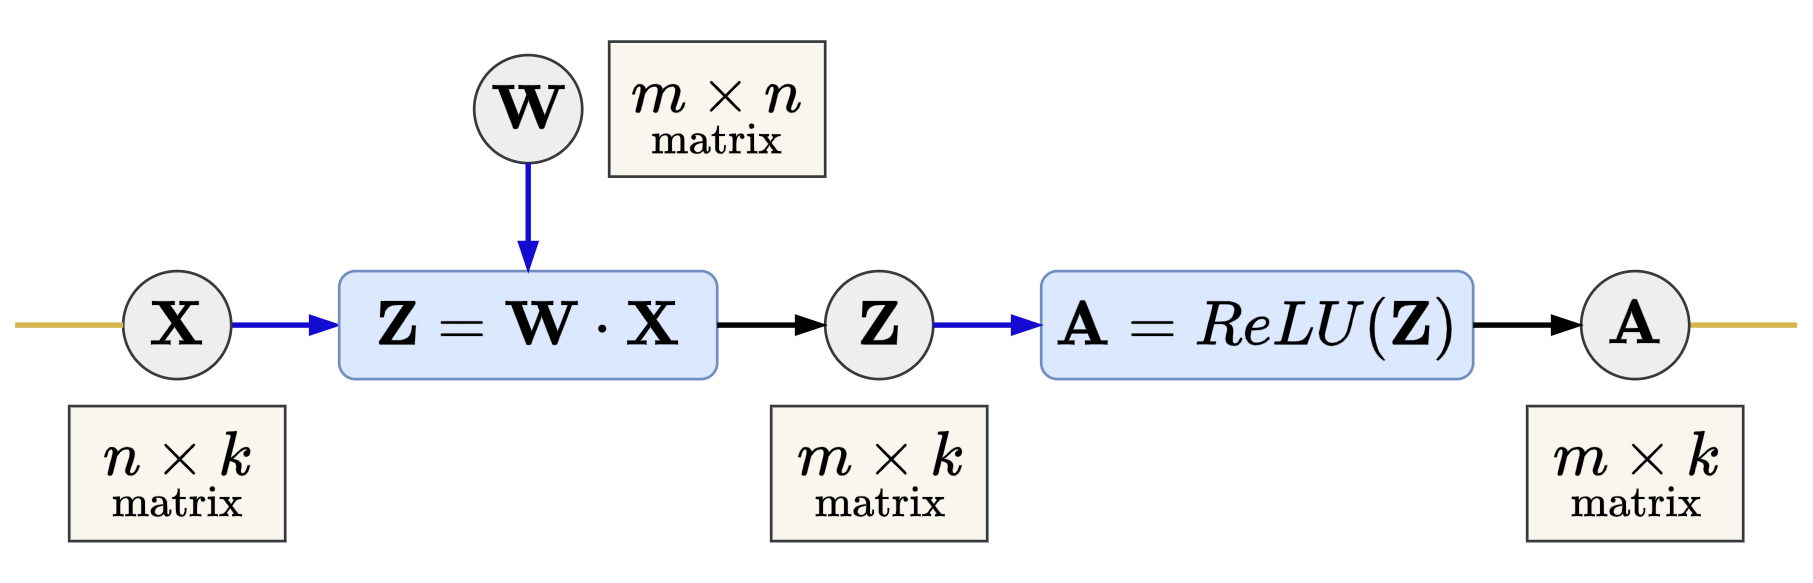

#### Lý do cần tối ưu hóa:

1. **Nút thắt bộ nhớ:** Việc lưu kết quả trung gian $Z$ vào bộ nhớ, sau đó đọc lại giá trị của $Z$ để tính ReLU sẽ gây ra lưu lượng bộ nhớ không cần thiết, làm tăng độ trễ cho chương trình.

2. **Overhead khi gọi hàm kernel:** Mỗi lần gọi hàm kernel đều có overhead. Và khi ta tách chúng thành hai hàm kernel riêng biệt, thì về lý thuyết overhead này sẽ tăng gấp đôi. Điều này vừa giúp giảm số lượng lệnh cần thực thi, vừa giảm thời gian chuyển đổi giữa các hàm kernel.

3. **Cơ hội tối ưu:** Phép nhân ma trận và ReLU là các phép toán **tương thích theo phần tử**. Việc kết hợp chúng trong một hàm kernel giúp giữ dữ liệu trong **register** hoặc **shared memory**, giảm số lần truy cập bộ nhớ và tăng hiệu năng.

### 📌 Thiết kế thuật toán

**Cách tối ưu:**  
1. **Hợp nhất hai hàm kernel (Kernel Fusion):**
    - Ta thiết kế một hàm kernel duy nhất để thực hiện đồng thời phép **nhân ma trận** và **ReLU**:
        - Đầu vào: ma trận đầu vào ($X$), ma trận trọng số ($W$) của tầng ẩn, và các kích thước tương ứng.
        - Đầu ra: ma trận kết quả sau khi thực hiện phép nhân ma trận và áp dụng hàm kích hoạt ReLU lên từng phần tử.

2. **Tối ưu hóa thread (Thread Optimization):**  
   - Mỗi thread xử lý cả phép nhân và kích hoạt hàm ReLU, giúp tránh các bước đồng bộ không cần thiết.

3. **Tối ưu bộ nhớ (Memory Optimization):**  
   - Ta giữ giá trị trung gian trong **register**, áp dụng ReLU ngay sau khi tính ra kết quả phần tử, để giúp giảm độ trễ khi truy cập.

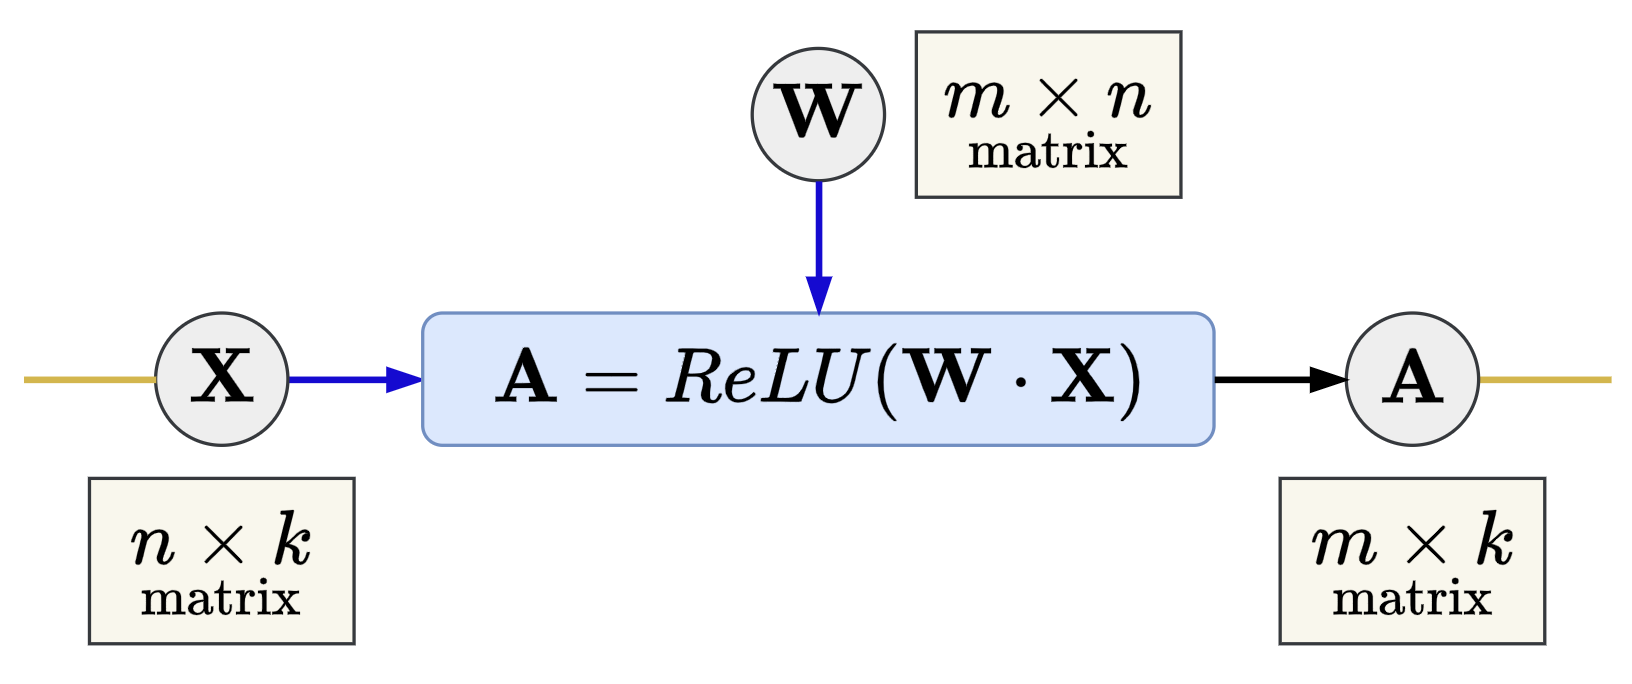

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:**
    - **Tính đúng đắn:** Đảm bảo kết quả của hàm kernel hợp nhất giống với kết quả khi tách riêng:
        - Ta sẽ so sánh **độ lỗi cross-entropy** và **độ chính xác** (accuracy) giữa hai cách thiết kế hàm kernel trên toàn bộ tập dữ liệu huấn luyện và kiểm tra.

    - **Thời gian chạy:** So sánh thời gian chạy giữa hai cách:
        - Tách thành hai hàm kernel (nhân ma trận và ReLU riêng biệt).
        
        - Kết hợp nhân ma trận và ReLU trong một hàm kernel.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi tách riêng hai hàm kernel nhân ma trận và ReLU**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v3_optimized.cu -o parallel_v3_optimized

CPU times: user 38 ms, sys: 1.5 ms, total: 39.5 ms
Wall time: 5.02 s


In [ ]:
%%time
!./parallel_v3_optimized

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 995.875 ms
[>] Data prepared in 1.528 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174715877, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641698360, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314566612, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096905947, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213942945, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815097272, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538800836, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479277492
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       95.501 |       110.363 |
| Hidden 2 |       47.230 |       112.635 |
| Output   |       65.468 |       109.418 |
*----------*--------------*---------------*

(*) Average time to update weights in 1 epoch: 23.396 ms
(*) Average time for training the model in 1 epoch: 965.661 ms
[============================================]
```


##### **`b.` Khi kết hợp nhân ma trận và ReLU trong một hàm kernel**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v41_hidden_fusion.cu -o parallel_v41_hidden_fusion

CPU times: user 32 ms, sys: 3.86 ms, total: 35.8 ms
Wall time: 4.62 s


In [ ]:
%%time
!./parallel_v41_hidden_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 999.096 ms
[>] Data prepared in 1.496 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174714088, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641698956, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314566910, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096903265, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213942945, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815093994, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538798749, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479274809
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       74.743 |       111.653 |
| Hidden 2 |       25.983 |       112.150 |
| Output   |       66.244 |       109.081 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 22.981 ms
(*) Average time for training the model in 1 epoch: 922.209 ms
[============================================]
```


#### Quan sát kết quả và nhận xét

Việc hợp nhất hai hàm kernel riêng biệt (nhân ma trận và ReLU) thành một hàm kernel duy nhất trong quá trình lan truyền tiến qua hai tầng ẩn của mạng nơ-ron đã mang lại những cải thiện đáng kể về hiệu năng mà không ảnh hưởng đến độ chính xác của mô hình.

**`1.` So sánh về tính đúng đắn:**

- Kết quả cho thấy **không có sự khác biệt** nào về độ chính xác giữa hai cách tiếp cận. Cả hai cách đều cho kết quả tương tự về độ lỗi cross-entropy và độ chính xác trên cả tập huấn luyện và tập kiểm tra:
    - Tập huấn luyện: Train loss $\approx$ 0.254, Train accuracy = 0.904850
    - Tập kiểm tra: Test loss $\approx$ 0.348, Test accuracy = 0.876200

- Những kết quả này chứng minh rằng việc hợp nhất hai hàm kernel không ảnh hưởng đến khả năng học và khái quát hóa của mô hình. Mô hình vẫn hội tụ tốt và đạt được độ chính xác tương đương trên cả tập huấn luyện và tập kiểm tra.

**`2.` So sánh về thời gian xử lý trong giai đoạn lan truyền tiến:**

- Đây là điểm cải thiện chính của việc hợp nhất hàm kernel. Kết quả cho thấy sự giảm đáng kể về thời gian xử lý ở cả hai tầng ẩn:
    - **Tầng ẩn 1:** Thời gian lan truyền tiến giảm khoảng **20%** (từ khoảng 95ms xuống 75ms).

    - **Tầng ẩn 2:** Thời gian lan truyền tiến giảm khoảng **40%** (từ khoảng 45ms xuống 25ms).

**Kết luận:**

- Việc hợp nhất hàm kernel nhân ma trận và ReLU đã chứng minh là một phương pháp tối ưu hiệu quả cho quá trình huấn luyện mạng nơ-ron. Nó mang lại cải thiện đáng kể về hiệu năng trong giai đoạn lan truyền tiến qua các tầng ẩn mà không ảnh hưởng đến độ chính xác của mô hình. 

- Những lợi ích này đến từ việc giảm overhead khởi chạy kernel, giảm nhu cầu lưu trữ trung gian và cải thiện tính cục bộ của bộ nhớ. Đây là một kỹ thuật quan trọng giúp tăng tốc quá trình huấn luyện, đặc biệt là đối với các mô hình sâu và tập dữ liệu lớn.

## 8.2. Dùng kernel fusion trong giai đoạn lan truyền tiến ở tầng Output

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

- Tương tự như trường hợp của hàm kích hoạt ReLU, trong giai đoạn lan truyền tiến qua tầng output của mạng nơ-ron, chúng ta đang tách biệt hai hàm kernel "nhân ma trận" và "softmax".

    - Với ma trận đầu vào $X$ của tầng output, chúng ta cần thực hiện phép nhân ma trận giữa $X$ với ma trận trọng số $W$ của tầng output, thu được ma trận $Z \left(= W\cdot X\right)$ chứa các giá trị logits (đầu vào của hàm softmax).

    - Sau đó, chúng ta áp dụng hàm softmax lên **từng cột** của ma trận $Z$ để thu được ma trận $A$ chứa các xác suất dự đoán cho từng lớp.

- Trong bước này, chúng ta sẽ tối ưu hóa quá trình lan truyền tiến dữ liệu qua tầng output bằng cách kết hợp hai phép toán "nhân ma trận" và "softmax" thành một hàm kernel duy nhất.

#### Lý do cần tối ưu hóa:

1. **Overhead khi gọi hàm kernel:** Mỗi lần gọi hàm kernel đều có overhead. Việc tách hàm nhân ma trận và softmax thành hai hàm kernel riêng biệt sẽ làm tăng overhead này. Việc kết hợp chúng giúp giảm số lượng lệnh cần thực thi và giảm thời gian chuyển đổi giữa các hàm kernel.

2. **Nút thắt bộ nhớ**: Việc lưu kết quả trung gian $Z$ (logits) vào bộ nhớ, sau đó đọc lại $Z$ để tính softmax gây ra lưu lượng bộ nhớ không cần thiết, làm tăng độ trễ. Điều này đặc biệt quan trọng ở tầng output, nơi số lượng lớp có thể lớn.

3. **Quan trọng nhất là cơ hội cải thiện tính cục bộ của dữ liệu**: Dữ liệu cần thiết cho việc tính softmax (các giá trị trong cùng một cột của $Z$, v.v.) có thể được giữ ở register và shared memory trong quá trình tính toán, giúp cải thiện tính cục bộ của dữ liệu và tăng hiệu năng.

### 📌 Thiết kế thuật toán

Ta thiết kế một hàm kernel duy nhất để thực hiện đồng thời phép **nhân ma trận** và **softmax** ở tầng output của mạng nơ-ron:
- **Đầu vào**: ma trận đầu vào ($X$), ma trận trọng số ($W$) của tầng output, và các kích thước tương ứng.
- **Đầu ra**: ma trận kết quả sau khi thực hiện phép nhân ma trận và áp dụng hàm kích hoạt softmax lên từng cột.

Do ma trận đầu ra của tầng output có kích thước không quá lớn (chỉ có 10 hàng), nên ta sẽ đặt giá trị `TILE_WIDTH_OUTPUT = 16` để tận dụng hiệu quả của shared memory.

Chúng ta sẽ xây dựng một hàm kernel để tính `C = Softmax(A * B)`, bằng cách sử dụng "shared memory" và "blocking" (hay còn gọi là "tiling") để tối ưu hiệu năng:

1. **Chia ma trận thành các tile:** Ma trận A và B được chia thành các tile nhỏ, kích thước `TILE_WIDTH_OUTPUT x TILE_WIDTH_OUTPUT`.

2. **Tải tile vào shared memory:** Mỗi block của thread tải một tile của A và B vào shared memory (lần lượt là `s_A` và `s_B`).

3. **Nhân ma trận trong shared memory:** Mỗi thread tính một phần của phép nhân ma trận giữa các tile trong shared memory, kết quả được lưu vào `sharedZ`. Sử dụng unrolling để tăng tốc độ tính toán.

4. **Tính Softmax theo cột trong shared memory:**
    - Tìm giá trị lớn nhất (`maxVal`) trong mỗi cột của `sharedZ` để đảm bảo tính ổn định của Softmax.
    - Tính `exp(Z - maxVal)` cho mỗi phần tử trong cột.
    - Tính tổng các giá trị `exp` trong mỗi cột rồi lưu vào biến `sumExp`.
    - Chuẩn hóa mỗi phần tử bằng cách chia cho `sumExp` để có kết quả Softmax.

5. Kết quả cuối cùng sau khi áp dụng Softmax được ghi vào ma trận `C`.

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh hai cách thiết kế hàm kernel khác nhau (tách biệt và kết hợp) dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của hàm kernel hợp nhất giống với kết quả khi tách riêng hai hàm "nhân ma trận" và "softmax".
    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của hai cách thiết kế hàm kernel để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi tách riêng hai hàm kernel nhân ma trận và softmax**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v41_hidden_fusion.cu -o parallel_v41_hidden_fusion

CPU times: user 28.2 ms, sys: 7.41 ms, total: 35.6 ms
Wall time: 4.72 s


In [ ]:
%%time
!./parallel_v41_hidden_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 978.490 ms
[>] Data prepared in 1.487 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174725711, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641707897, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314561546, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096912205, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213954866, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815096378, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538806200, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479275107
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       74.298 |        99.498 |
| Hidden 2 |       26.058 |       112.797 |
| Output   |       65.791 |       109.255 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 23.190 ms
(*) Average time for training the model in 1 epoch: 907.746 ms
[============================================]
```


##### **`b.` Khi kết hợp nhân ma trận và softmax trong một hàm kernel**:

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v42_output_fusion.cu -o parallel_v42_output_fusion

CPU times: user 26.3 ms, sys: 3.23 ms, total: 29.6 ms
Wall time: 3.82 s


In [ ]:
%%time
!./parallel_v42_output_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 993.286 ms
[>] Data prepared in 1.458 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174718857, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641699255, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314559460, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096905947, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213950396, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815085351, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538802028, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479275107
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       74.424 |       102.424 |
| Hidden 2 |       25.676 |       113.869 |
| Output   |       27.844 |       109.687 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 23.526 ms
(*) Average time for training the model in 1 epoch: 873.633 ms
[============================================]
```


#### Quan sát kết quả và nhận xét:


Kết quả thực nghiệm cho thấy việc kết hợp kernel nhân ma trận và Softmax mang lại cải thiện đáng kể về hiệu suất mà không ảnh hưởng đến tính đúng đắn của mô hình. Cụ thể:

- **Về độ chính xác:**
    - Độ chính xác trên tập huấn luyện gần như không đổi (**90.4850%**) cho cả hai trường hợp.
    - Độ chính xác trên tập kiểm tra cũng gần như không đổi (**87.6200%**) cho cả hai trường hợp.
    - Điều này cho thấy việc kết hợp hàm kernel không ảnh hưởng đến khả năng học và khái quát hóa của mô hình. Mô hình vẫn đạt được hiệu suất tương đương về mặt độ chính xác.

- **Về độ lỗi cross-entropy:**
    - Độ lỗi trên tập huấn luyện cũng gần như tương đương (khoảng **0.254**) cho cả hai trường hợp.
    - Độ lỗi trên tập kiểm tra không có sự khác biệt đáng kể (khoảng **0.348**) cho cả hai trường hợp.
    - Điều này củng cố thêm kết luận rằng việc kết hợp hàm kernel không ảnh hưởng đến quá trình tối ưu hàm mất mát của mô hình.

- **Về thời gian huấn luyện (điểm cải thiện chính):**
    - **Thời gian lan truyền tiến (Forward Pass) của tầng Output:** Giảm đáng kể từ khoảng **65 ms** xuống còn khoảng **28 ms**, tức là đã cải thiện hơn **50%**. Đây là một cải thiện rất lớn và là điểm mấu chốt của việc kết hợp kernel.

    - **Tổng thời gian huấn luyện trong mỗi epoch:** Giảm từ khoảng **905 ms** xuống **875 ms**, tương đương với mức cải thiện khoảng **3.3%**. Mặc dù phần trăm cải thiện tổng thời gian huấn luyện không lớn như phần cải thiện thời gian lan truyền tiến của tầng output, nhưng nó vẫn là một cải thiện đáng kể, đặc biệt khi huấn luyện mô hình trên tập dữ liệu lớn.

**Kết luận:**

- Việc kết hợp hàm kernel nhân ma trận và Softmax ở tầng output mang lại hiệu quả rõ rệt về mặt hiệu suất, đặc biệt là giảm đáng kể thời gian lan truyền tiến của tầng output và tổng thời gian lan truyền tiến mà không làm ảnh hưởng đến độ chính xác và độ lỗi của mô hình. 

- Điều này chứng tỏ việc kết hợp hàm kernel là một kỹ thuật tối ưu hóa hiệu quả, giúp tăng tốc quá trình huấn luyện mạng nơ-ron, đặc biệt là khi triển khai trên GPU. Việc giảm thời gian lan truyền tiến ở tầng output sẽ đặc biệt hữu ích khi số lượng lớp đầu ra lớn, do phép tính softmax sẽ tốn kém hơn.

## 8.3. Kết hợp hàm chuyển vị ma trận và nhân ma trận ở giai đoạn lan truyền ngược

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Trong giai đoạn lan truyền ngược, chúng ta thường xuyên cần phải thực hiện phép nhân ma trận với ma trận chuyển vị của một ma trận khác. Ví dụ, khi tính toán gradient của trọng số, chúng ta cần tính toán phép nhân dạng: 

$$\frac{\partial L}{\partial \mathbf{W}}=\frac{\partial L}{\partial \mathbf{Z}}\cdot \mathbf{X}^{T}$$

- Trong đó: $\mathbf{X}^{T}$ là ma trận chuyển vị của $\mathbf{X}$.

Hiện tại, chúng ta đang thực hiện hai bước riêng biệt:

1. **Chuyển vị ma trận:** Tạo một bản sao của ma trận $\mathbf{X}$ và thực hiện phép chuyển vị để tạo ra $\mathbf{X}^T$.

2. **Nhân ma trận:** Thực hiện phép nhân ma trận giữa $\frac{\partial L}{\partial \mathbf{Z}}$ và $\mathbf{X}^{T}$.

Chúng ta sẽ tối ưu hóa quá trình này bằng cách kết hợp hai phép toán "nhân ma trận" và "chuyển vị ma trận" thành một hàm kernel duy nhất.

#### Lý do cần tối ưu hóa:

1. **Overhead khi gọi hàm kernel (tương tự như trên):** Việc gọi hai hàm kernel riêng biệt (một cho chuyển vị và một cho nhân ma trận) sẽ tạo ra overhead. Việc kết hợp hai hàm này sẽ giúp giảm số lượng lệnh và thời gian chuyển đổi giữa các hàm kernel.

2. **Cơ hội cải thiện tính cục bộ của dữ liệu (quan trọng nhất):** Đây là lý do chính và quan trọng nhất cho việc kết hợp. Khi thực hiện chuyển vị và nhân ma trận trong cùng một hàm kernel, chúng ta có thể tận dụng tốt hơn shared memory và register:
    - **Tránh truy cập bộ nhớ không cần thiết:** Thay vì đọc ma trận $X$ từ bộ nhớ, chuyển vị nó vào một vùng nhớ khác rồi lại đọc từ vùng nhớ đó để nhân ma trận, chúng ta có thể đọc các phần tử của $X$ vào shared memory theo thứ tự *đã được chuyển vị* và thực hiện phép nhân ngay lập tức. Điều này giúp giảm đáng kể số lần truy cập bộ nhớ và tăng hiệu năng.

    - **Tối ưu việc sử dụng shared memory và register:** Bằng cách load dữ liệu vào shared memory theo cách đã chuyển vị, chúng ta có thể tận dụng tối đa không gian shared memory và register, giảm thiểu việc trao đổi dữ liệu giữa các cấp bộ nhớ, từ đó tăng hiệu năng.


### 📌 Thiết kế thuật toán

Gọi: $M$ là một ma trận đã đúng chiều như ta mong muốn, $N^T$ là ma trận chuyển vị của ma trận $N$. Hiện tại, chúng ta cần thực hiện phép nhân ma trận giữa $M$ và $N$, nhưng chúng ta chưa có $N$ mà chỉ có dạng chuyển vị của nó. Khi này, ta cần thiết kế một hàm kernel duy nhất để thực hiện đồng thời phép **chuyển vị ma trận** và **nhân ma trận**:
- **Đầu vào**: một ma trận đã ở đúng chiều ($M$), một ma trận cần chuyển vị ($N^T$), và các kích thước tương ứng.
- **Đầu ra**: ma trận kết quả như khi ta thực hiện phép nhân ma trận giữa $M$ và $N$. Nhưng khi này ta phải truy cập đến các phần tử mong muốn trong ma trận $N$ thông qua ma trận chuyển vị $N^T$.

Ta sẽ thiết kế hai hàm kernel `matrixMultiplyWithTransposeKernel_ABT()` và `matrixMultiplyWithTransposeKernel_ATB()`. Cả hai hàm kernel này đều thực hiện phép nhân ma trận với một ma trận đã được chuyển vị bằng cách sử dụng shared memory và blocking để tối ưu hiệu năng. Điểm mấu chốt là việc chuyển vị được thực hiện "ngầm" trong quá trình load dữ liệu vào shared memory, thay vì thực hiện một bước chuyển vị riêng biệt.

##### **1. `matrixMultiplyWithTransposeKernel_ATB()`:** $C = (A^T)^T \cdot B$

Hàm kernel này tính tích của ma trận $A$ đã chuyển vị $\left( A^T \right)$ với ma trận $B$ thông qua các bước sau:
- **Load dữ liệu (đã chuyển vị):** Khi load dữ liệu của $A$ vào shared memory (`s_A`), các thread truy cập vào bộ nhớ theo thứ tự đã được chuyển vị, tức là thread (i, j) sẽ load `AT[j][i]` thay vì `A[i][j]`.

- **Nhân ma trận trong shared memory:** Thực hiện phép nhân ma trận giữa `s_A` và `s_B` trong shared memory.

- **Ghi kết quả:** Ghi kết quả vào ma trận $C$.

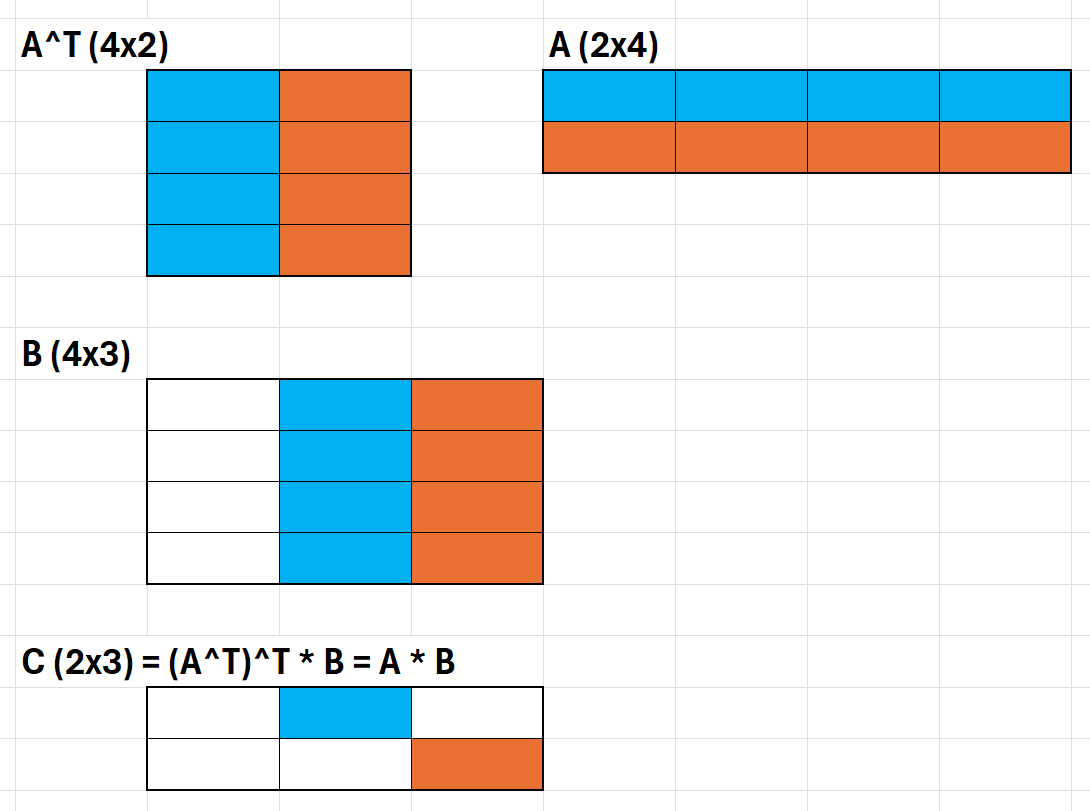

##### **2. `matrixMultiplyWithTransposeKernel_ABT()`:** $C = A \cdot (B^T)^T$

Hàm kernel này tính tích của ma trận $A$ với ma trận $B$ đã chuyển vị $\left(B^T\right)$ thông qua các bước sau:
- **Load dữ liệu (đã chuyển vị):** Khi load dữ liệu của $B$ vào shared memory (`s_BT`), các thread truy cập vào bộ nhớ theo thứ tự đã được chuyển vị, tức là thread (i, j) sẽ load `BT[j][i]` thay vì `B[i][j]`.

- **Nhân ma trận trong shared memory:** Thực hiện phép nhân ma trận giữa `s_A` và `s_BT` trong shared memory.

- **Ghi kết quả:** Ghi kết quả vào ma trận $C$.

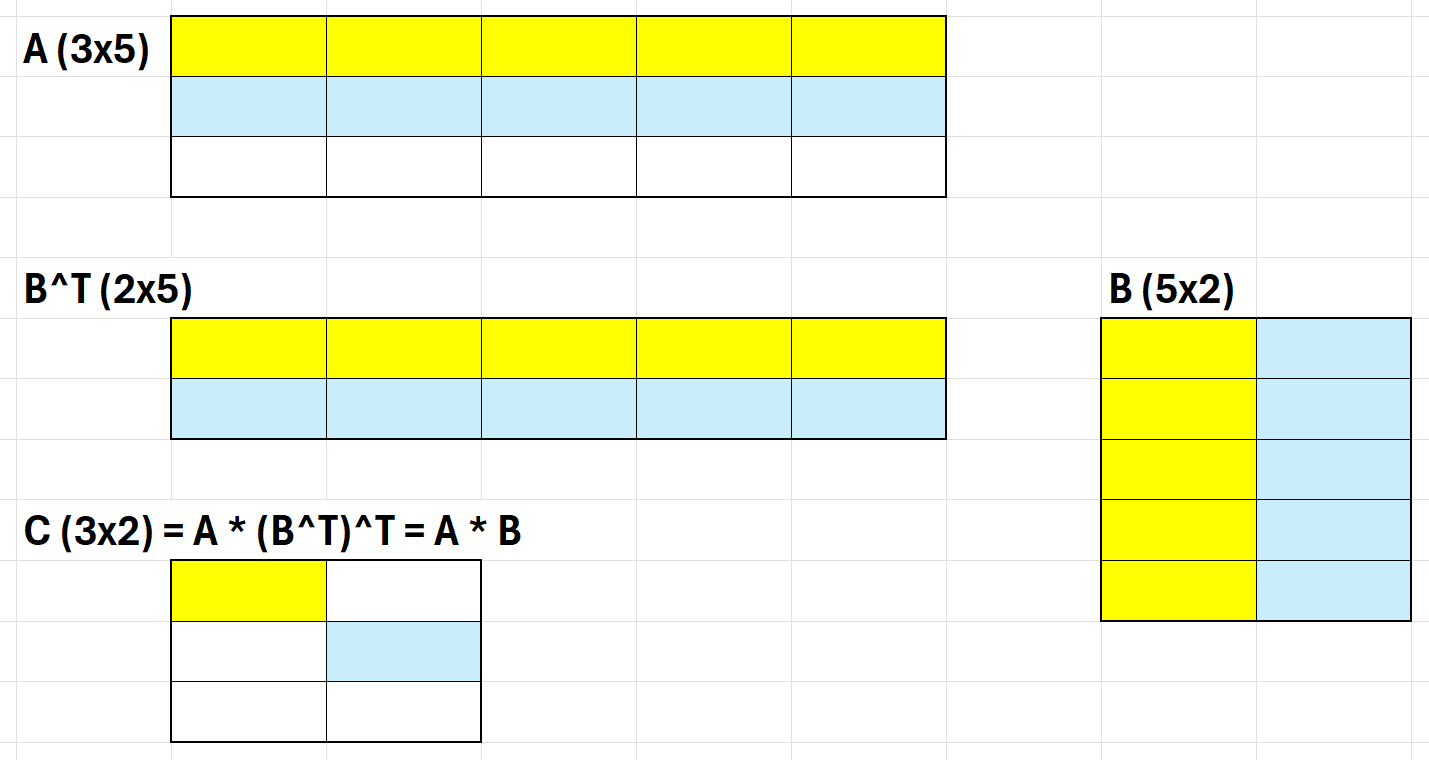

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh hai cách thiết kế hàm kernel khác nhau (tách biệt và kết hợp) dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của hàm kernel hợp nhất giống với kết quả khi tách riêng hai hàm "chuyển vị ma trận" và "nhân ma trận".

    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của hai cách thiết kế hàm kernel để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi tách riêng hai hàm kernel chuyển vị ma trận và nhân ma trận:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v42_output_fusion.cu -o parallel_v42_output_fusion

CPU times: user 37.3 ms, sys: 4.07 ms, total: 41.4 ms
Wall time: 5.83 s


In [ ]:
%%time
!./parallel_v42_output_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1019.500 ms
[>] Data prepared in 1.534 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174715281, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641700149, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314557076, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096905649, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213962615, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815088630, Train 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538799942, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479272723
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       72.480 |       118.394 |
| Hidden 2 |       25.152 |       112.534 |
| Output   |       27.688 |       108.805 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 23.032 ms
(*) Average time for training the model in 1 epoch: 887.489 ms
[===========================================]
```


##### **`b.` Khi kết hợp chuyển vị ma trận và nhân ma trận thành một hàm kernel:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v43_matmul_transpose_fusion.cu -o parallel_v43_matmul_transpose_fusion

CPU times: user 30.3 ms, sys: 1.88 ms, total: 32.2 ms
Wall time: 4.42 s


In [ ]:
%%time
!./parallel_v43_matmul_transpose_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 999.621 ms
[>] Data prepared in 1.514 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174715579, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641692698, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314566612, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096899390, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213966787, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815091014, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538808286, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479273319
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       72.125 |        79.569 |
| Hidden 2 |       25.173 |        45.606 |
| Output   |       27.456 |        41.835 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 23.286 ms
(*) Average time for training the model in 1 epoch: 711.281 ms
[===========================================]
```


#### Quan sát kết quả và nhận xét:

Kết quả cho thấy việc kết hợp hàm kernel chuyển vị ma trận và nhân ma trận mang lại sự cải thiện **rất đáng kể** về hiệu suất trong giai đoạn lan truyền ngược mà không ảnh hưởng đến tính đúng đắn của mô hình. Cụ thể:

- **Về độ chính xác:**
    - Độ chính xác trên tập huấn luyện gần như không đổi (**90.4850%**) cho cả hai trường hợp.

    - Độ chính xác trên tập kiểm tra cũng gần như không đổi (**87.6200%**) cho cả hai trường hợp.
    
    - Ta thấy rằng việc kết hợp hàm chuyển vị ma trận và nhân ma trận thành một hàm kernel duy nhất không ảnh hưởng đến độ chính xác của mô hình.

- **Về độ lỗi cross-entropy:**
    - Độ lỗi trên tập huấn luyện gần như tương đương, rơi vào khoảng **0.254** cho cả hai trường hợp.
    
    - Độ lỗi trên tập kiểm tra cũng rất gần nhau, rơi vào khoảng **0.348** cho cả hai trường hợp.
    
    - Tương tự như độ chính xác, sự khác biệt giữa hai cách cài đặt hàm kernel này là không đáng kể và cho thấy việc kết hợp kernel không ảnh hưởng đến quá trình học của mô hình.

- **Về thời gian huấn luyện (điểm cải thiện then chốt):**
    - **Thời gian lan truyền ngược (Backward Pass):** Đây là điểm cải thiện chính. Thời gian lan truyền ngược đã giảm đáng kể ở **tất cả các tầng (layer)**:
        - **Ở tầng ẩn 1:** Giảm từ khoảng **118 ms** xuống **80 ms**, tức là đã giảm khoảng **32%**.
        - **Ở tầng ẩn 2:** Giảm từ khoảng **113 ms** xuống **46 ms**, tức là đã giảm khoảng **59%**.
        - **Ở tầng Output:** Giảm từ khoảng **109 ms** xuống **42 ms**, tức là đã giảm khoảng **61%**.

    - **Tổng thời gian lan truyền ngược** qua tất cả các lớp giảm từ khoảng **340 ms** xuống còn **168 ms**, tương đương với mức giảm **50%**. Đây là một cải thiện cực kỳ lớn.

    -  **Tổng thời gian huấn luyện mỗi epoch:** Giảm từ **880 ms** xuống **710 ms**, tương đương với mức cải thiện **19%**. Đây là một cải thiện đáng kể về tổng thời gian huấn luyện, cho thấy việc kết hợp hai hàm kernel mang lại hiệu quả thiết thực.

**Kết luận:**

- Việc kết hợp hàm kernel chuyển vị ma trận và nhân ma trận trong giai đoạn lan truyền ngược mang lại hiệu quả **vô cùng rõ rệt** về mặt hiệu suất, đặc biệt là giảm một nửa thời gian lan truyền ngược  và cải thiện đáng kể tổng thời gian huấn luyện (gần 20%), mà không ảnh hưởng đến độ chính xác và độ lỗi của mô hình. 

- Điều này chứng tỏ việc kết hợp kernel là một kỹ thuật tối ưu hóa rất hiệu quả, giúp tăng tốc quá trình huấn luyện mạng nơ-ron, đặc biệt là với các mô hình học sâu lớn và phức tạp.


## 8.4. Kết hợp hàm ReLU backward vào hàm kernel chuyển vị ma trận và nhân ma trận ở giai đoạn lan truyền ngược

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Trong giai đoạn lan truyền ngược, sau khi tính toán gradient của hàm mất mát đối với output của một layer, chúng ta cần tính toán gradient của hàm mất mát đối với input của layer đó. Khi layer đó sử dụng hàm kích hoạt ReLU, chúng ta cần áp dụng phép toán ReLU backward.

Cụ thể, giả sử chúng ta có:

- `dLoss_dOutput`: Gradient của hàm mất mát đối với output của layer (thường được tính bằng cách nhân gradient của layer tiếp theo với ma trận trọng số chuyển vị).

- `Output`: Output của layer trong giai đoạn lan truyền tiến.

Phép toán ReLU backward được định nghĩa như sau:

- `dLoss_dInput[i] = dLoss_dOutput[i]` nếu `Output[i] > 0`

- `dLoss_dInput[i] = 0` nếu `Output[i] <= 0`

Hiện tại, nếu chúng ta tách biệt các bước, chúng ta sẽ có:

1. **Nhân ma trận với chuyển vị:** Tính `dLoss_dInput_temp = W^T * dLoss_dOutput`.

2. **ReLU backward:** Duyệt qua từng phần tử của `dLoss_dInput_temp` và áp dụng phép toán ReLU backward để tạo ra `dLoss_dInput`.

Chúng ta sẽ tối ưu hóa bằng cách kết hợp cả ba bước (nhân ma trận với chuyển vị và ReLU backward) vào một hàm kernel duy nhất.

#### Lý do cần tối ưu hóa:
1. **Kết hợp điều kiện ReLU vào quá trình tính toán:** Điều này là điểm khác biệt then chốt so với việc chỉ kết hợp nhân ma trận và chuyển vị. Thay vì tính toán kết quả nhân ma trận đầy đủ rồi mới áp dụng ReLU backward, chúng ta có thể kiểm tra điều kiện ReLU *ngay trong quá trình tính toán tổng từng phần* trước khi gán kết quả thực sự vào ma trận kết quả.

2. **Overhead gọi hàm kernel:** Gọi hai hàm kernel riêng biệt (một cho nhân ma trận với chuyển vị và một cho ReLU backward) sẽ tạo ra overhead. Việc kết hợp giúp giảm số lượng lệnh và thời gian chuyển đổi giữa các hàm kernel.

3. **Cơ hội cải thiện tính cục bộ của dữ liệu (quan trọng nhất):** Đây là lý do chính và quan trọng nhất. Khi kết hợp tất cả các bước vào một hàm kernel, chúng ta có thể tận dụng tốt hơn shared memory và register. Điều này giúp dữ liệu được sử dụng hiệu quả hơn, giảm thiểu việc trao đổi dữ liệu giữa các cấp bộ nhớ.


### 📌 Thiết kế thuật toán

Về cơ bản, hàm kernel này sẽ dựa trên việc tái sử dụng cấu trúc của hàm `matrixMultiplyWithTransposeKernel_ATB()` mà ta vừa viết trước đó. Tuy nhiên, ta sẽ thêm vào một bước kiểm tra điều kiện ReLU ngay trong quá trình tính toán tổng từng phần. Khai báo của hàm kernel mới sẽ như sau:

```cpp
__global__ void matrixMultiplyWithTransposeReluBackwardKernel(float *AT, float *B, float *C, float *Z, int m, int n, int k)
```

Hàm kernel này tính `C = ReLU'(A^T * B)` một cách hiệu quả bằng cách kết hợp ba bước vào một hàm kernel duy nhất, tận dụng shared memory và blocking.

**Các bước chính:**

1. **Load dữ liệu (đã chuyển vị):** Load các tile của A<sup>T</sup> và B vào shared memory (`s_A`, `s_B`). Việc load A<sup>T</sup> được thực hiện theo thứ tự đã chuyển vị (thread (i, j) load `AT[j][i]`).

2. **Nhân ma trận trong shared memory:** Tính tổng từng phần của phép nhân ma trận giữa `s_A` và `s_B`.

3.  **ReLU backward và ghi kết quả:** *Ngay sau* khi tính tổng từng phần, kiểm tra điều kiện `Z > 0` (với Z là output của forward pass tương ứng). Nếu điều kiện đúng, tổng được gán cho C; ngược lại, gán 0 cho C.

**Đặc điểm quan trọng của hàm kernel này:**

- **Chuyển vị ngầm:** Việc chuyển vị A được thực hiện *ngầm* trong quá trình load dữ liệu vào shared memory.

- **Kết hợp ReLU:** ReLU backward được áp dụng *ngay sau* khi tính tổng từng phần, tránh lưu trữ trung gian và tối ưu tính toán.



### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh hai cách thiết kế hàm kernel khác nhau (tách biệt và kết hợp) dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của hàm kernel hợp nhất giống với kết quả khi tách riêng hai hàm "chuyển vị và nhân ma trận" và "ReLU backward".

    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của hai cách thiết kế hàm kernel để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi tách riêng hai hàm kernel "chuyển vị ma trận và nhân ma trận" và "ReLU backward":**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v43_matmul_transpose_fusion.cu -o parallel_v43_matmul_transpose_fusion

CPU times: user 30.5 ms, sys: 7.52 ms, total: 38.1 ms
Wall time: 5.32 s


In [ ]:
%%time
!./parallel_v43_matmul_transpose_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 990.276 ms
[>] Data prepared in 1.568 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174706936, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641702533, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314565718, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096907437, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213946521, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815086544, Train a

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538796663, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479274809
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       71.757 |        76.803 |
| Hidden 2 |       24.591 |        44.193 |
| Output   |       25.046 |        40.019 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 22.030 ms
(*) Average time for training the model in 1 epoch: 697.466 ms
(*) Average time for backward pass when training model in 1 epoch: 161.015 ms
[===========================================]
```


##### **`b.` Khi kết hợp chuyển vị ma trận, nhân ma trận và ReLU backward thành một hàm kernel duy nhất:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v44_relu_backward_fusion.cu -diag-suppress 177 -o parallel_v44_relu_backward_fusion

CPU times: user 23.7 ms, sys: 6.11 ms, total: 29.8 ms
Wall time: 4.02 s


In [ ]:
%%time
!./parallel_v44_relu_backward_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1003.088 ms
[>] Data prepared in 1.573 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Epoch   1/10, Train loss: 0.4174715877, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641707003, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314558566, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096907735, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213953674, Train accuracy: 0.880967
[>] Epoch   6/10, Train loss: 0.2815089524, Train 

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538805604, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479274511
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for forward and backward pass of each layer in 1 epoch
+----------+--------------+---------------+
| Layer    | Forward (ms) | Backward (ms) |
|==========+==============+===============|
| Hidden 1 |       71.536 |        71.152 |
| Hidden 2 |       24.252 |        35.592 |
| Output   |       25.305 |        40.435 |
*----------*--------------*---------------*
(*) Average time to update weights in 1 epoch: 21.947 ms
(*) Average time for training the model in 1 epoch: 677.640 ms
(*) Average time for backward pass when training model in 1 epoch: 147.179 ms
[===========================================]
```


#### Quan sát kết quả và nhận xét:

Dựa trên kết quả thực nghiệm, ta thấy việc kết hợp chuyển vị ma trận, nhân ma trận và ReLU backward thành một hàm kernel duy nhất tiếp tục cho thấy những cải thiện về hiệu suất, đặc biệt là trong giai đoạn lan truyền ngược, mà không ảnh hưởng đến tính chính xác của mô hình.

**`1.` Tính đúng đắn (Độ chính xác và Độ lỗi Cross-Entropy):**

- **Độ chính xác trên tập huấn luyện:** Gần như không đổi (khoảng 90.4850%) cho cả hai trường hợp.
- **Độ chính xác trên tập kiểm tra:** Gần như không đổi (khoảng 87.6200%) cho cả hai trường hợp.
- **Độ lỗi Cross-Entropy (cả trên tập huấn luyện và kiểm tra):** Sự khác biệt là rất nhỏ, cho thấy việc kết hợp các hàm kernel không ảnh hưởng đến quá trình học của mô hình.

Như vậy, về mặt kết quả đầu ra (độ chính xác và độ lỗi), cả hai cách triển khai (tách riêng và kết hợp) đều tương đương với nhau. Điều này chứng tỏ việc kết hợp các phép toán không làm thay đổi logic tính toán mà chỉ tối ưu cách thực hiện.

**`2.` Hiệu suất (Thời gian huấn luyện):**

Đây là điểm khác biệt quan trọng nhất. Chúng ta sẽ tập trung vào thời gian lan truyền ngược, vì đây là nơi việc kết hợp mang lại nhiều lợi ích nhất:

- **Tổng thời gian lan truyền ngược (trong 1 epoch):** Giảm từ khoảng **160 ms** xuống **150 ms** (giảm khoảng 6.0%). Đây là một cải thiện đáng kể về tổng thời gian lan truyền ngược.

- **Tổng thời gian huấn luyện mỗi epoch:** Giảm từ **697 ms** xuống **678 ms** (giảm khoảng 2.7%). Đây là một cải thiện nhỏ nhưng đáng kể về tổng thời gian huấn luyện.

**Kết luận:**

- Việc kết hợp chuyển vị ma trận, nhân ma trận và ReLU backward thành một hàm kernel duy nhất tiếp tục cho thấy lợi ích về hiệu suất, đặc biệt là giảm thời gian lan truyền ngược khoảng 6%. Tổng thời gian huấn luyện cũng vì thế mà giảm nhẹ, cho thấy việc kết hợp hàm kernel là một kỹ thuật tối ưu hóa hiệu quả, giúp tăng tốc quá trình huấn luyện mạng nơ-ron, đặc biệt là với các mô hình học sâu lớn và phức tạp.


## 8.5. Song song hóa quá trình sao chép dữ liệu vào mini-batch

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Trong quá trình huấn luyện mạng nơ-ron, dữ liệu huấn luyện thường được chia thành các mini-batch để xử lý. Trước mỗi bước huấn luyện, dữ liệu từ tập huấn luyện cần được sao chép vào mini-batch. Ở giai đoạn trước đây, để mọi thứ đơn giản, ta đã để host (CPU) thực hiện toàn bộ quá trình sao chép dữ liệu từ tập huấn luyện vào mini-batch. Tuy nhiên, cách tiếp cận tuần tự (sử dụng CPU) này có thể trở thành nút thắt cổ chai, đặc biệt khi:

- **Tập dữ liệu lớn:** Khi tập dữ liệu rất lớn, việc sao chép tuần tự sẽ tốn nhiều thời gian.
- **Kích thước mini-batch lớn:** Mini-batch càng lớn, lượng dữ liệu cần sao chép càng nhiều.
- **GPU mạnh:** Nếu GPU có khả năng xử lý rất nhanh, thời gian sao chép dữ liệu bằng CPU có thể chiếm một phần đáng kể trong tổng thời gian huấn luyện, làm giảm hiệu quả sử dụng GPU.

Vì vậy, bài toán đặt ra là làm thế nào để giảm thời gian sao chép dữ liệu từ tập huấn luyện vào mini-batch, để tận dụng tối đa sức mạnh của GPU và tăng tốc quá trình huấn luyện.

#### Lý do cần tối ưu hóa:

1. **Tối ưu hiệu suất:** GPU được thiết kế để xử lý song song các tác vụ. Việc song song hóa quá trình sao chép dữ liệu cho phép nhiều thread trên GPU cùng thực hiện việc sao chép đồng thời, giảm đáng kể thời gian cần thiết.

2. **Giảm nút thắt cổ chai CPU:** Việc sao chép dữ liệu tuần tự trên CPU có thể trở thành nút thắt cổ chai, đặc biệt khi GPU xử lý rất nhanh. Chuyển việc sao chép sang GPU giúp giải phóng CPU và cho phép nó thực hiện các tác vụ khác song song, chẳng hạn như tiền xử lý dữ liệu hoặc quản lý quá trình huấn luyện.

3. **Tăng tốc độ huấn luyện tổng thể:** Việc giảm thời gian sao chép dữ liệu trực tiếp đóng góp vào việc giảm tổng thời gian huấn luyện một epoch. Điều này đặc biệt quan trọng khi huấn luyện các mô hình lớn trên các tập dữ liệu khổng lồ, nơi mà thời gian huấn luyện là một yếu tố then chốt.

4. **Tận dụng băng thông bộ nhớ GPU:** GPU có băng thông bộ nhớ rất lớn. Việc song song hóa cho phép tận dụng tối đa băng thông này để sao chép dữ liệu một cách nhanh chóng.


### 📌 Thiết kế thuật toán

```cpp
__global__ void copyDataToMiniBatchKernel(float *trainData, int *trainLabels, int *mb_Indices, float *mb_X1, float *mb_Y, int batchSize)
```

Thuật toán này được thiết kế để chuẩn bị dữ liệu cho quá trình huấn luyện mạng nơ-ron bằng cách tạo ra các mini-batch một cách song song trên GPU. Nó thực hiện hai nhiệm vụ chính: sao chép dữ liệu từ tập huấn luyện vào mini-batch và mã hóa one-hot cho nhãn tương ứng.

**Quá trình hoạt động:**

1. **Phân công nhiệm vụ:** Mỗi thread (luồng xử lý) trên GPU được gán nhiệm vụ xử lý một mẫu duy nhất trong mini-batch. Điều này cho phép ta xử lý đồng thời nhiều mẫu, tăng tốc đáng kể quá trình chuẩn bị dữ liệu.

2. **Chọn mẫu từ tập huấn luyện:** Dựa trên một tập các chỉ mục được tạo ra trước đó (`mb_Indices`), mỗi thread xác định mẫu nào từ tập huấn luyện gốc mà nó cần sao chép. Các chỉ mục này quyết định thứ tự các mẫu được đưa vào mini-batch.

3. **Sao chép dữ liệu:** Mỗi thread sao chép toàn bộ dữ liệu của mẫu được chọn từ tập huấn luyện vào mini-batch. Dữ liệu này được sao chép vào **một cột** riêng biệt trong ma trận đại diện cho mini-batch. Hàng đầu tiên trong ma trận này được dành riêng cho giá trị **bias**, do đó dữ liệu thực tế được sao chép bắt đầu từ hàng thứ hai.

4. **Mã hóa One-hot cho nhãn:** Đồng thời với việc sao chép dữ liệu, mỗi thread cũng thực hiện mã hóa one-hot cho nhãn của mẫu tương ứng. Mã hóa one-hot biến một nhãn dạng số thành một vector nhị phân, trong đó chỉ có một phần tử mang giá trị 1 (tại vị trí tương ứng với nhãn), các phần tử còn lại mang giá trị 0. Vector one-hot này được lưu trữ trong một ma trận riêng biệt, mỗi cột tương ứng với một mẫu trong mini-batch.

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh kết quả của mô hình khi sao chép dữ liệu vào mini-batch tuần tự (sử dụng CPU) và song song (sử dụng GPU) dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của mô hình khi sao chép dữ liệu song song giống với kết quả khi sao chép dữ liệu tuần tự.

    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của quá trình sao chép dữ liệu vào mini-batch giữa hai cách thiết kế để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi sao chép dữ liệu vào mini-batch tuần tự (sử dụng CPU):**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v44_relu_backward_fusion.cu -diag-suppress 177 -o parallel_v44_relu_backward_fusion

CPU times: user 22 ms, sys: 5.33 ms, total: 27.4 ms
Wall time: 4.02 s


In [ ]:
%%time
!./parallel_v44_relu_backward_fusion

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 980.883 ms
[>] Data prepared in 1.574 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 2.633728 ms
[>] Epoch   1/10, Train loss: 0.4174729586, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641708195, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314565718, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096904159, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213953972, Train accuracy: 0.880967
[>] Epo

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538801134, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479278982
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 722.521 ms
(*) Average time for preparing mini-batch data: 283.495 ms
[===========================================]
```


##### **`b.` Khi sao chép dữ liệu vào mini-batch song song (sử dụng GPU):**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v45_load_minibatch.cu -diag-suppress 177 -o parallel_v45_load_minibatch

CPU times: user 28.3 ms, sys: 4.5 ms, total: 32.8 ms
Wall time: 4.32 s


In [ ]:
%%time
!./parallel_v45_load_minibatch

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1746.441 ms
[>] Data prepared in 1.573 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 3.633728 ms
[>] Epoch   1/10, Train loss: 0.4174717367, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641698062, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314572573, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096910119, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213938177, Train accuracy: 0.880967
[>] Ep

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538798153, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479276299
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 386.097 ms
(*) Average time for preparing mini-batch data: 80.174 ms
[===========================================]
```


#### Quan sát kết quả và nhận xét:

Dựa trên kết quả thực nghiệm, ta thấy việc song song hóa quá trình sao chép dữ liệu vào mini-batch trên GPU đã mang lại hiệu suất cải thiện đáng kể mà không ảnh hưởng đến độ chính xác của mô hình.

**`1.` Tính đúng đắn (Độ chính xác và Độ lỗi Cross-Entropy):**

- **Độ chính xác trên tập huấn luyện:** Gần như không đổi (khoảng 90.4850%) cho cả hai trường hợp.
- **Độ chính xác trên tập kiểm tra:** Gần như không đổi (khoảng 87.6200%) cho cả hai trường hợp.
- **Độ lỗi Cross-Entropy (cả trên tập huấn luyện và kiểm tra):** Sự khác biệt là rất nhỏ, cho thấy cả hai phương pháp đều tạo ra mini-batch dữ liệu chính xác và không ảnh hưởng đến quá trình học của mô hình.

Như vậy, về mặt chức năng, cả hai cách tiếp cận (tuần tự và song song) đều cho kết quả tương đương. Điều này khẳng định việc song song hóa chỉ tối ưu hóa hiệu suất mà không thay đổi logic của quá trình chuẩn bị dữ liệu.

**2. Hiệu suất (Thời gian huấn luyện):**

Đây là điểm khác biệt chính và quan trọng nhất:

- **Thời gian chuẩn bị dữ liệu mini-batch:**
    - Phiên bản tuần tự (CPU): khoảng 280 ms
    - Phiên bản song song (GPU): khoảng 80 ms
    - **Độ cải thiện:** Giảm hơn **70%**. Đây là một cải thiện *rất lớn* về hiệu suất.

- **Tổng thời gian huấn luyện trong 1 epoch:**
    - Phiên bản tuần tự (CPU): khoảng 700 ms
    - Phiên bản song song (GPU): khoảng 400 ms
    - **Độ cải thiện:** Giảm hơn **40%**. Việc giảm đáng kể thời gian chuẩn bị dữ liệu đã kéo theo sự cải thiện đáng kể về tổng thời gian huấn luyện trong một epoch.

**Kết luận:**

- Kết quả cho thấy rõ ràng lợi ích của việc song song hóa quá trình sao chép dữ liệu vào mini-batch trên GPU. Việc này không chỉ cải thiện đáng kể thời gian chuẩn bị dữ liệu mà còn tác động tích cực đến tổng thời gian huấn luyện mô hình, mà vẫn đảm bảo tính chính xác của quá trình huấn luyện. Đây là một kỹ thuật tối ưu hóa quan trọng và nên được áp dụng khi huấn luyện các mô hình học sâu, đặc biệt là với dữ liệu lớn.

## 8.6. Dùng Stream để tăng tốc quá trình sao chép dữ liệu vào mini-batch

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Như đã phân tích ở các bước trước, việc chuẩn bị dữ liệu cho mỗi mini-batch là một bước quan trọng trong quá trình huấn luyện mạng nơ-ron. Mặc dù việc song song hóa trên GPU đã cải thiện đáng kể hiệu suất so với việc xử lý tuần tự trên CPU, nhưng thời gian chuẩn bị dữ liệu vẫn có thể là một yếu tố ảnh hưởng đến tổng thời gian huấn luyện, đặc biệt khi:

- **Dữ liệu lớn:** Khi kích thước dữ liệu huấn luyện rất lớn, việc sao chép và tiền xử lý dữ liệu cho mỗi mini-batch vẫn tốn thời gian, ngay cả khi được thực hiện song song trên GPU.
- **Tiền xử lý phức tạp:** Nếu dữ liệu cần được tiền xử lý phức tạp (ví dụ: biến đổi ảnh, chuẩn hóa), thời gian xử lý trên GPU cũng sẽ tăng lên.
- **GPU mạnh:** Nếu GPU có tốc độ xử lý rất nhanh, thời gian chuẩn bị dữ liệu có thể trở thành nút thắt cổ chai, làm giảm hiệu quả sử dụng GPU.

Bài toán đặt ra là làm thế nào để tiếp tục giảm thời gian chuẩn bị dữ liệu, tận dụng tối đa khả năng xử lý song song của GPU và chồng chéo các hoạt động để tăng tốc quá trình huấn luyện.

#### Lý do nên sử dụng stream trong quá trình load dữ liệu huấn luyện vào mini-batch:

CUDA stream cho phép thực hiện các hoạt động trên GPU một cách bất đồng bộ (asynchronous). Điều này có nghĩa là CPU không cần phải chờ một hoạt động trên GPU hoàn thành trước khi bắt đầu một hoạt động khác. Bằng cách sử dụng nhiều stream, chúng ta có thể chồng chéo (overlap) các hoạt động khác nhau, chẳng hạn như:

1. **Sao chép dữ liệu từ host (CPU) lên device (GPU).**
2. **Thực hiện các phép tính kernel (ví dụ: sao chép dữ liệu vào mini-batch, one-hot encoding).**
3. **Thực hiện tính toán huấn luyện (forward pass, backward pass).**

Việc chồng chéo này giúp giảm thời gian chết (idle time) của GPU và CPU, do đó tăng tốc độ huấn luyện tổng thể.

Cụ thể, trong quá trình load dữ liệu huấn luyện vào mini-batch, chúng ta có thể sử dụng stream để:

- **Chia dữ liệu thành các phần độc lập:** Chia tập dữ liệu thành các phần nhỏ hơn, mỗi phần được xử lý bởi một stream riêng biệt.
- **Load dữ liệu song song:** Sử dụng nhiều stream để đồng thời load dữ liệu của các phần khác nhau lên GPU.


### 📌 Thiết kế thuật toán

Thuật toán này tối ưu quá trình chuẩn bị các mini-batch cho huấn luyện mạng nơ-ron bằng cách sử dụng CUDA stream để thực hiện các thao tác sao chép dữ liệu và one-hot encoding một cách bất đồng bộ và song song.

**Quá trình hoạt động:**

1. **Phân chia nhiệm vụ:** Thuật toán chia quá trình chuẩn bị dữ liệu thành hai phần chính:
    - **One-hot encoding nhãn:** Do kích thước của ma trận nhãn one-hot không quá lớn, toàn bộ quá trình mã hóa được thực hiện bởi một kernel duy nhất trên một stream.
    - **Sao chép dữ liệu mẫu:** Do kích thước dữ liệu mẫu lớn hơn, ma trận dữ liệu đầu vào được chia thành nhiều phần bằng nhau. Mỗi phần sẽ được xử lý bởi một stream riêng biệt. Trong trường hợp này, dữ liệu được chia thành 4 phần và sử dụng 4 stream.

2. **Khởi chạy Kernel One-hot Encoding:** Một kernel được khởi chạy trên một stream riêng biệt để thực hiện one-hot encoding cho nhãn của tất cả các mẫu trong mini-batch. Mỗi thread trong kernel này xử lý một mẫu, chuyển đổi nhãn dạng số thành vector one-hot.

3.  **Khởi chạy Kernel Sao chép Dữ liệu (sử dụng nhiều stream):**
    - **Phân chia dữ liệu:** Ma trận dữ liệu đầu vào được chia thành 4 phần bằng nhau theo chiều dọc (theo hàng).
    - **Khởi chạy kernel trên mỗi stream:** Một kernel được khởi chạy trên mỗi stream để sao chép một phần của dữ liệu vào mini-batch. Mỗi kernel nhận vào thông tin về phần dữ liệu mà nó cần xử lý (số hàng và vị trí bắt đầu).
    - **Sao chép song song:** Các kernel này chạy đồng thời trên các stream khác nhau, cho phép sao chép dữ liệu vào mini-batch một cách song song và bất đồng bộ. Mỗi thread trong mỗi kernel sao chép một mẫu dữ liệu vào mini-batch.

4. **Đồng bộ hóa:** Sau khi tất cả các kernel đã được khởi chạy trên các stream, một lệnh đồng bộ hóa được gọi để đảm bảo tất cả các hoạt động trên GPU đã hoàn thành trước khi tiếp tục quá trình huấn luyện.

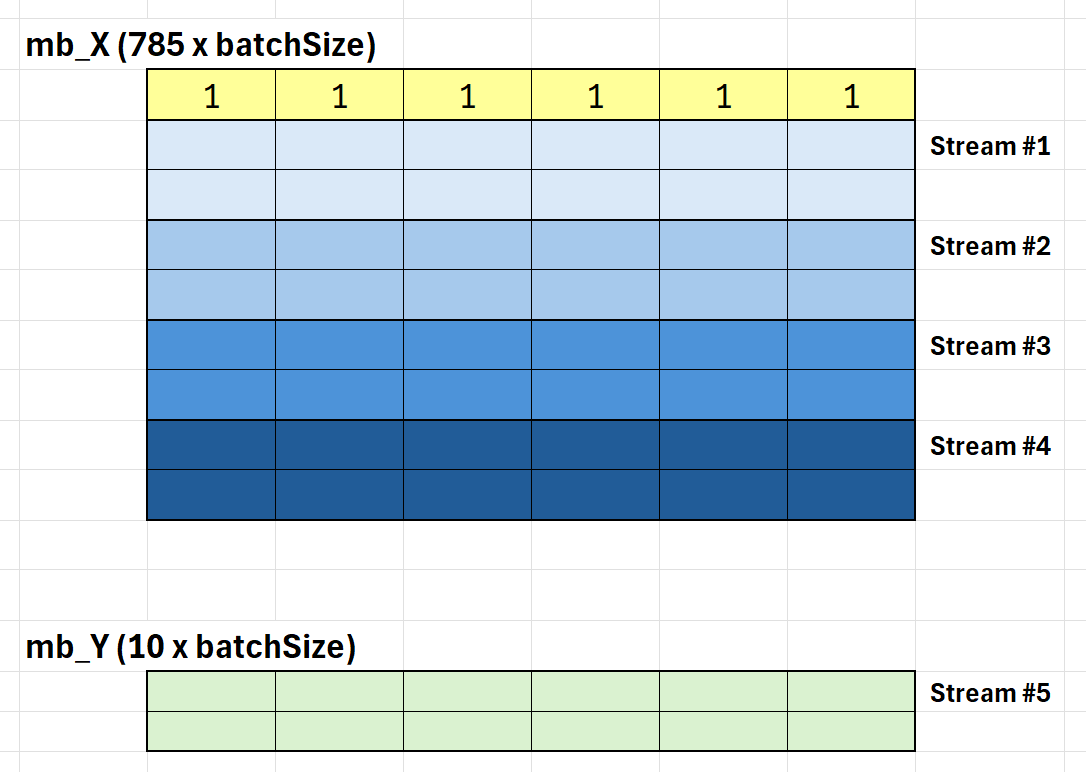

### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh kết quả của mô hình khi sao chép dữ liệu vào mini-batch chỉ sử dụng 1 stream (stream-0) và khi sử dụng nhiều stream dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của mô hình không bị ảnh hưởng bởi việc sao chép dữ liệu vào mini-batch bằng nhiều stream bất đồng bộ.

    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của quá trình sao chép dữ liệu vào mini-batch giữa hai cách thiết kế để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi sao chép dữ liệu vào mini-batch bằng 1 stream mặc định:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v45_load_minibatch.cu -diag-suppress 177 -o parallel_v45_load_minibatch

CPU times: user 40.4 ms, sys: 6.9 ms, total: 47.3 ms
Wall time: 6.33 s


In [ ]:
%%time
!./parallel_v45_load_minibatch

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1000.628 ms
[>] Data prepared in 1.537 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 3.606496 ms
[>] Epoch   1/10, Train loss: 0.4174720347, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641710281, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314566016, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096902072, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213964105, Train accuracy: 0.880967
[>] Ep

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538799942, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479277194
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 394.561 ms
(*) Average time for preparing mini-batch data: 80.451 ms
[===========================================]
```


##### **`b.` Khi sao chép dữ liệu vào mini-batch bằng nhiều stream bất đồng bộ:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v46_minibatch_stream.cu -diag-suppress 177 -o parallel_v46_minibatch_stream

CPU times: user 28.5 ms, sys: 4.73 ms, total: 33.2 ms
Wall time: 4.02 s


In [ ]:
%%time
!./parallel_v46_minibatch_stream

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1026.250 ms
[>] Data prepared in 1.575 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 2.660384 ms
[>] Epoch   1/10, Train loss: 0.4174713194, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641698658, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314563036, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096909225, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213955164, Train accuracy: 0.880967
[>] Ep

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538805008, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479276896
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 338.718 ms
(*) Average time for preparing mini-batch data: 45.371 ms
[===========================================]
```


#### Quan sát kết quả và nhận xét:

Dựa trên kết quả thực nghiệm, ta thấy việc sử dụng nhiều stream bất đồng bộ để sao chép dữ liệu vào mini-batch đã mang lại hiệu suất cải thiện rõ rệt so với việc sử dụng một stream mặc định, mà không ảnh hưởng đến độ chính xác của mô hình.

**1. Tính đúng đắn (Độ chính xác và Độ lỗi Cross-Entropy):**

- **Độ chính xác trên tập huấn luyện:** Gần như tương đương (khoảng 90.4850%) cho cả hai trường hợp.
- **Độ chính xác trên tập kiểm tra:** Gần như tương đương (khoảng 87.6200%) cho cả hai trường hợp.
- **Độ lỗi Cross-Entropy (cả trên tập huấn luyện và kiểm tra):** Sự khác biệt là rất nhỏ, chứng tỏ cả hai phương pháp đều tạo ra mini-batch dữ liệu chính xác và không ảnh hưởng đến quá trình học của mô hình.

Điều này khẳng định rằng việc sử dụng nhiều stream chỉ tối ưu hóa hiệu suất mà không làm thay đổi kết quả tính toán.

**2. Hiệu suất (Thời gian huấn luyện):**

Đây là điểm khác biệt then chốt:

- **Thời gian chuẩn bị dữ liệu mini-batch:**
    - **Một stream mặc định:** khoảng 80 ms
    - **Nhiều stream bất đồng bộ:** khoảng 46 ms
    - **Độ cải thiện:** Giảm khoảng 42.5%. Đây là một bước tiến đáng kể trong việc tối ưu thời gian chuẩn bị dữ liệu.

- **Tổng thời gian huấn luyện trong 1 epoch:**
    - **Dùng Một stream mặc định:** khoảng 395 ms
    - **Nhiều stream bất đồng bộ:** khoảng 340 ms
    - **Độ cải thiện:** Giảm khoảng 14%. Mặc dù việc giảm thời gian chuẩn bị dữ liệu không trực tiếp kéo theo mức giảm tương ứng trong tổng thời gian huấn luyện (do các phần khác của quá trình huấn luyện cũng chiếm thời gian), nhưng vẫn có sự cải thiện đáng kể.

**Kết luận:**

- Việc sử dụng nhiều stream bất đồng bộ để sao chép dữ liệu vào mini-batch là một kỹ thuật tối ưu hóa hiệu quả, giúp giảm thời gian chuẩn bị dữ liệu và tăng tốc quá trình huấn luyện. Mặc dù mức cải thiện không lớn bằng việc chuyển từ CPU sang GPU, nhưng nó vẫn là một bước tiến quan trọng, đặc biệt khi các phương pháp tối ưu khác đã được áp dụng. Việc kết hợp cả hai kỹ thuật (song song hóa trên GPU và sử dụng nhiều stream) mang lại hiệu suất tốt nhất cho quá trình huấn luyện.


## 8.7. Dùng Stream để chạy đồng thời các nhánh tính toán trong giai đoạn lan truyền ngược

### 📌 Phân tích bài toán

#### Phần cần tối ưu hóa:

Trong quá trình huấn luyện mạng nơ-ron, lan truyền ngược (backpropagation) là giai đoạn tính toán gradient của hàm mất mát (loss function) theo các trọng số (weights) và đầu vào (inputs) của mạng. Đây là bước then chốt để cập nhật trọng số và tối ưu mô hình. Quá trình lan truyền ngược bao gồm việc tính toán đạo hàm cục bộ tại mỗi layer và sau đó áp dụng quy tắc dây chuyền để tính đạo hàm tổng quát.

Thông thường, việc tính toán `dL/dW` (đạo hàm của loss theo weights) và `dL/dX` (đạo hàm của loss theo input) được thực hiện tuần tự cho mỗi layer. Tuy nhiên, trên thực tế, các phép tính này (đặc biệt là trong một số kiến trúc mạng nhất định) có thể được thực hiện một cách độc lập.

Bài toán đặt ra là làm thế nào để tận dụng tính độc lập này để tăng tốc quá trình lan truyền ngược bằng cách thực hiện các nhánh tính toán song song.

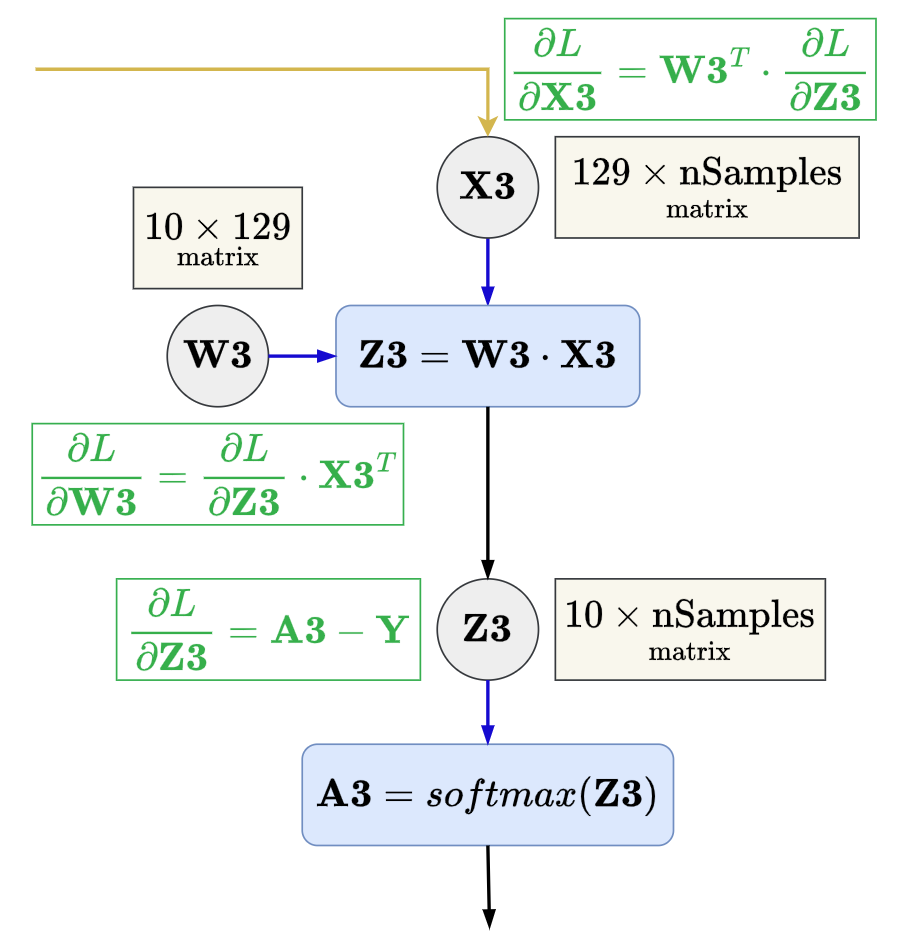

#### Lý do nên sử dụng stream để chạy đồng thời các nhánh tính toán trong giai đoạn lan truyền ngược:

CUDA stream cho phép thực hiện các hoạt động trên GPU một cách bất đồng bộ (asynchronous). Điều này có nghĩa là CPU không cần phải chờ một hoạt động trên GPU hoàn thành trước khi bắt đầu một hoạt động khác. Bằng cách sử dụng nhiều stream, chúng ta có thể chồng chéo (overlap) các hoạt động khác nhau, bao gồm cả việc tính toán gradient trong quá trình lan truyền ngược.

Cụ thể, trong giai đoạn lan truyền ngược, chúng ta có thể sử dụng stream để:

- **Tính toán `dL/dW` và `dL/dX` song song:** Thay vì tính toán `dL/dW` rồi mới đến `dL/dX` cho một layer, chúng ta có thể sử dụng hai stream riêng biệt để thực hiện hai phép tính này đồng thời.

### 📌 Thiết kế thuật toán

Thuật toán này tối ưu quá trình lan truyền ngược trong mạng nơ-ron bằng cách sử dụng CUDA stream để thực hiện các phép tính gradient một cách bất đồng bộ và song song. Thuật toán sử dụng một stream chính và các stream phụ để chồng chéo việc tính toán gradient theo trọng số (`dL/dW`) và gradient theo đầu vào (`dL/dX`).

**Cấu trúc Stream:**

- **Stream chính (streamMainBackward):** Điều khiển luồng tính toán chính của lan truyền ngược và chịu trách nhiệm tính toán `dL/dX` (gradient theo đầu vào) cho mỗi layer.
- **Stream phụ (streamBranchBackward):** Mỗi layer được gán một stream phụ riêng biệt để tính toán `dL/dW` (gradient theo trọng số) một cách song song với stream chính.

**Quá trình hoạt động:**

Thuật toán thực hiện lan truyền ngược theo từng layer, bắt đầu từ layer cuối cùng (layer 3 trong trường hợp này). Đối với mỗi layer, thuật toán thực hiện các bước sau:

1. **Tính toán `dL/dZ` (gradient theo output của layer) trên stream chính:** Phép tính này (ví dụ: `dLdZ3 = A3 - Y`) được thực hiện trên stream chính (`streamMainBackward`). Đây là bước khởi đầu cho việc tính toán gradient cho layer đó.

2. **Đồng bộ hóa stream chính và stream phụ:** Sau khi tính `dL/dZ`, một sự kiện (event) được ghi lại trên stream chính. Stream phụ tương ứng với layer đó sẽ chờ sự kiện này trước khi tiếp tục. Điều này đảm bảo rằng `dL/dZ` đã được tính toán xong trước khi `dL/dW` được tính toán trên stream phụ.

3. **Tính toán `dL/dW` trên stream phụ:** Phép nhân ma trận để tính `dL/dW` (ví dụ: `dLdW3 = dLdZ3 * X3T`) được thực hiện trên stream phụ riêng biệt (`streamBranchBackward`). Do chạy trên stream riêng, phép tính này được thực hiện song song với các tính toán khác trên stream chính.

4. **Tính toán `dL/dX` và kết hợp với ReLU backward trên stream chính:** Phép nhân ma trận để tính `dL/dX` (ví dụ: `dLdX3 = W3T * dLdZ3`) và phép toán ReLU backward được kết hợp vào một kernel duy nhất và thực hiện trên stream chính. Việc kết hợp này giúp tối ưu hiệu suất bằng cách giảm số lần truy cập bộ nhớ và overhead kernel.

5. **Lặp lại cho các layer trước:** Các bước 2-4 được lặp lại cho các layer trước đó (layer 2 và layer 1).

6. **Đồng bộ hóa các stream phụ với host:** Sau khi hoàn thành tính toán cho tất cả các layer, các stream phụ được đồng bộ hóa với host để đảm bảo tất cả các phép tính `dL/dW` đã hoàn thành trước khi tiếp tục các bước khác (chẳng hạn như: cập nhật trọng số).


### 📌 Đánh giá thuật toán

#### Mô tả thiết lập thử nghiệm:

- **Dữ liệu:** Ta sử dụng tập dữ liệu hình ảnh Fashion-MNIST, với `60,000` mẫu dùng để huấn luyện và `10,000` mẫu dùng để kiểm tra. Mỗi mẫu là một ảnh xám có kích thước 28x28 pixel, với 10 lớp (0-9) tương ứng với 10 loại quần áo, giày dép, phụ kiện thời trang khác nhau.

- **Cấu hình phần cứng:** Ta chạy chương trình trên GPU Tesla T4 của Google Colab. Đây là GPU có khả năng tính toán cao, hỗ trợ CUDA, phù hợp cho việc huấn luyện mô hình học máy (và học sâu).

- **Mô tả quá trình huấn luyện:**
    - Ta sẽ huấn luyện mô hình Neural Network trên tập dữ liệu huấn luyện trong 10 epoch. Trong mỗi epoch, ta sẽ chia tập dữ liệu thành các batch nhỏ (batch size = 64) để huấn luyện mô hình, phần dữ liệu còn dư sẽ được bỏ qua.

    - Trước khi bắt đầu mỗi epoch, ta sẽ trộn ngẫu nhiên dữ liệu huấn luyện để đảm bảo mô hình học được tốt hơn.

    - Ta sẽ sử dụng tốc độ học (learning rate) là 0.1 để cập nhật trọng số trong quá trình huấn luyện.

- **Chỉ số đo lường:** Ta sẽ so sánh kết quả của mô hình khi chỉ sử dụng 1 stream mặc định (stream-0) trong giai đoạn lan truyền ngược với khi sử dụng nhiều stream để thực hiện đồng thời các nhánh tính toán dựa trên:
    - **Tính đúng đắn**: Đảm bảo kết quả của mô hình không bị ảnh hưởng bởi việc sử dụng nhiều stream bất đồng bộ trong quá trình lan truyền ngược.

    - **Tốc độ thực thi**: Ta sẽ so sánh thời gian thực thi của quá trình lan truyền ngược khi huấn luyện mô hình giữa hai cách thiết kế để đánh giá hiệu năng của chúng và xác định cách thiết kế tối ưu hơn.

#### Chạy chương trình:

- Ta chạy chương trình để huấn luyện mô hình trên tập dữ liệu Fashion-MNIST, với:
    - Số lượng epoch là: 10
    - Batch size là: 64
    - Tốc độ học là: 0.1
- Đồng thời, ta sẽ dùng `nvprof` để xem chi tiết thực thi của chương trình.

##### **`a.` Khi chỉ sử dụng 1 stream mặc định trong giai đoạn lan truyền ngược:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v46_minibatch_stream.cu -diag-suppress 177 -o parallel_v46_minibatch_stream

CPU times: user 36.8 ms, sys: 5.26 ms, total: 42.1 ms
Wall time: 5.72 s


In [ ]:
%%time
!./parallel_v46_minibatch_stream

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 981.930 ms
[>] Data prepared in 1.477 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 2.590720 ms
[>] Epoch   1/10, Train loss: 0.4174721241, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641704619, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314556777, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096920848, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213960230, Train accuracy: 0.880967
[>] Epo

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538806498, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479278684
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 325.695 ms
(*) Average time for backward pass when training model in 1 epoch: 105.280 ms
[===========================================]
```


##### **`b.` Khi sử dụng nhiều stream bất đồng bộ trong giai đoạn lan truyền ngược:**

In [ ]:
%%time
!nvcc -O3 -use_fast_math parallel_v47_backward_stream.cu -diag-suppress 177 -o parallel_v47_backward_stream

CPU times: user 26 ms, sys: 3.88 ms, total: 29.9 ms
Wall time: 3.92 s


In [ ]:
%%time
!./parallel_v47_backward_stream

**********GPU Info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Loading Fashion-MNIST dataset...
[>] Dataset loaded in 1036.986 ms
[>] Data prepared in 1.505 ms
Training the Neural Network using mini-batch gradient descent...
==================+=================+========================
[ NUM_EPOCHS = 10 | BATCH_SIZE = 64 | LEARNING_RATE = 0.100 ]
------------------+-----------------+------------------------
[>] Weight initialization time: 2.675328 ms
[>] Epoch   1/10, Train loss: 0.4174728990, Train accuracy: 0.845867
[>] Epoch   2/10, Train loss: 0.3641709387, Train accuracy: 0.865933
[>] Epoch   3/10, Train loss: 0.3314561248, Train accuracy: 0.877183
[>] Epoch   4/10, Train loss: 0.3096911311, Train accuracy: 0.883950
[>] Epoch   5/10, Train loss: 0.3213965297, Train accuracy: 0.880967
[>] Ep

- Tóm tắt kết quả chạy chương trình:

```txt
[>] Epoch  10/10, Train loss: 0.2538801730, Train accuracy: 0.904850

Evaluating the model on the full test set...
[>] Test loss: 0.3479277492
[>] Test accuracy: 0.876200

[========== MODEL RUN TIME REPORT ==========]
(*) Average time for training the model in 1 epoch: 316.286 ms
(*) Average time for backward pass when training model in 1 epoch: 86.364 ms
[===========================================]
```


#### Quan sát kết quả và nhận xét:

Dựa trên kết quả thực nghiệm, ta thấy việc sử dụng nhiều stream bất đồng bộ trong giai đoạn lan truyền ngược đã mang lại sự cải thiện về hiệu suất mà không ảnh hưởng đến tính chính xác của mô hình.

**1. Tính đúng đắn (Độ chính xác và Độ lỗi Cross-Entropy):**

- **Độ chính xác trên tập huấn luyện:** Tương đương (khoảng 90.4850%) cho cả hai trường hợp.
- **Độ chính xác trên tập kiểm tra:** Tương đương (khoảng 87.6200%) cho cả hai trường hợp.
- **Độ lỗi Cross-Entropy (cả trên tập huấn luyện và kiểm tra):** Sự khác biệt là rất nhỏ, cho thấy cả hai phương pháp đều tính toán gradient một cách chính xác và không ảnh hưởng đến quá trình học của mô hình.

Điều này chứng tỏ việc sử dụng nhiều stream chỉ tối ưu hóa hiệu suất tính toán chứ không làm thay đổi kết quả toán học của quá trình lan truyền ngược.

**2. Hiệu suất (Thời gian huấn luyện):**

Đây là điểm khác biệt quan trọng nhất:

- **Thời gian cho giai đoạn lan truyền ngược trong 1 epoch:**
    - **Một stream mặc định:** khoảng 105 ms
    - **Nhiều stream bất đồng bộ:** khoảng 87 ms
    - **Độ cải thiện:** Giảm khoảng **17%**. Đây là một cải tiến đáng kể trong thời gian thực hiện lan truyền ngược.

- **Tổng thời gian huấn luyện trong 1 epoch:**
    - **Một stream mặc định:** khoảng 325 ms
    - **Nhiều stream bất đồng bộ:** khoảng 317 ms
    - **Độ cải thiện:** Giảm khoảng **2.5%**. Mặc dù sự cải thiện về tổng thời gian huấn luyện không lớn bằng sự cải thiện trong chính giai đoạn lan truyền ngược, nhưng nó vẫn là một kết quả tích cực.

**Kết luận:**

- Việc sử dụng nhiều stream bất đồng bộ trong giai đoạn lan truyền ngược là một kỹ thuật hiệu quả để tăng tốc quá trình huấn luyện mạng nơ-ron bằng cách tận dụng khả năng xử lý song song của GPU. Mặc dù mức cải thiện trong tổng thời gian huấn luyện có thể không lớn bằng các tối ưu khác, nhưng nó vẫn đóng góp một phần quan trọng và nên được xem xét khi tối ưu hiệu suất huấn luyện, đặc biệt là với các mô hình phức tạp và tập dữ liệu lớn. Việc kết hợp nhiều kỹ thuật tối ưu khác nhau (ví dụ: tối ưu chuẩn bị dữ liệu và tối ưu lan truyền ngược bằng stream) sẽ mang lại hiệu suất huấn luyện tốt nhất.

#  
---

# 9. Reflection

## 9.1. Những khó khăn mà cả nhóm đã gặp phải

- Đầu tiên là nhóm em phải tìm cách cài đặt một mô hình Neural Network từ đầu bằng ngôn ngữ lập trình C/C++. Hiện tại nhóm em thấy các nguồn tài liệu có sẵn để hướng dẫn cài đặt mô hình Neural Network bằng ngôn ngữ lập trình C/C++ là chưa quá nhiều, hầu hết tài liệu mà nhóm em tìm được là hướng dẫn trên các ngôn ngữ lập trình phổ biến hơn như Python. Do đó, nhóm em đã giải quyết vấn đề này bằng cách sử dụng các kiến thức đã có từ môn học "Nhập môn học máy". Bằng cách xây dựng một đồ thị tính toán đơn giản, nhóm em đã tìm được công thức để tính toán các ma trận cần thiết trong quá trình huấn luyện mô hình. Sau đó, nhóm đã áp dụng ý tưởng này và cài đặt bằng ngôn ngữ C/C++.

- Ngoài ra, do đây là lần đầu nhóm em được làm quen với việc lập trình bằng kiến trúc CUDA nên các thành viên trong nhóm thực hiện đồ án này với tâm thế là "vừa học vừa làm". Mọi người vừa phải cập nhật kiến thức mới, vừa cố gắng áp dụng kiến thức đó vào đồ án lần này. Do đó, quá trình làm đồ án của nhóm em đôi khi bị chậm trễ hơn dự kiến. Tuy nhiên, cả nhóm đã cùng nhau cố gắng để thực hiện nhiều phiên bản cải tiến nhất có thể.

## 9.2. Những điều mà mỗi thành viên đã học được qua đồ án

### 21127084 - Lê Xuân Kiên

- Qua đồ án này điều mà em học được:
    - Quá trình hoạt động của mạng ANN khi gộp chung Bias với ma trận trọng số.
    - Sử dụng block1D để giảm wrap phân kỳ.
    - Xử lý song song cho các bài toán element-wise và colum-wise.
    - Hiện tượng page fault khi sử dụng unified memory và cách khắc phục.

### 21127108 - Đặng Hà Nhật Minh

- Qua đồ án này điều mà em học được:
    - Cùng trao đổi các kỹ năng vói các bạn khác.
    - Biết được cách song song hoá một mô hình học sâu.
    - Dùng được kỹ thuật unrolling lên nhiều kernel song song khác nhau.
- Những điều còn tồn đọng sau khi hoàn thành đồ án:
    - Còn những thuật toán phát triển kernel mà em chưa thể hiện thực hoá.
    - Những kết quả loss hay accuracy có thể bị thay đổi khi training model trên các máy khác nhau dù đều dùng colab.
    - Ví dụ: Trong phần model song song V2, tối ưu các hàm kernel được chia cho nhiều người làm nhưng khi chạy code của nhau vẫn ra các kết quả khác nhau. Do đó chúng em đi đến kết luận, sự thay đổi đó không phải là sai kết quả.

### 21127739 - Vũ Minh Phát

- Qua đồ án lần này, em đã:

    - Cải thiện được kỹ năng làm việc nhóm với các bạn: Em học được cách tôn trọng các ý tưởng từ các thành viên khác, cùng nhau chia sẻ kiến thức và hợp tác để cùng giải quyết một vấn đề. Điều này giúp em hiểu được tầm quan trọng của làm việc nhóm để có thể hoàn thành một dự án phức tạp.

    - Học được cách sử dụng các loại bộ nhớ khác nhau của CUDA để cải thiện hiệu suất của các ứng dụng song song: Sau khi cài đặt các mô hình song song phiên bản thứ 3, em đã có cơ hội được tìm hiểu, nghiên cứu và thực hành bằng cách sử dụng bộ nhớ Unified memory vào quá trình cài đặt mã nguồn, cũng như các cách để cải thiện tình trạng Page fault để giúp tăng hiệu năng của chương trình.

    - Học được cách kết hợp các hàm kernel để tăng cường sức mạnh cho quá trình làm việc với dữ liệu: Sau khi cài đặt các mô hình song song phiên bản thứ 4, em đã học được cách để kết hợp hàm nhân ma trận với các hàm kích hoạt như ReLU, softmax thành 1 hàm kernel duy nhất. Điều này đã giúp cải thiện đáng kể hiệu năng của mô hình trong giai đoạn lan truyền tiến. Ở giai đoạn lan truyền ngược, bằng cách kết hợp hàm nhân ma trận và chuyển vị ma trận thành 1 hàm kernel duy nhất, em đã có thể cải thiện rất nhiều thời gian cần thiết trong giai đoạn lan truyền ngược.

    - Hiểu được tác động của việc khởi tạo trọng số đến quá trình học của mô hình: Trong phiên bản mô hình song song lần 3, em đã có cơ hội thử nghiệm phương pháp khởi tạo trọng số Kaiming He. Đây là một phương pháp khởi tạo trọng số được khuyên dùng cho mô hình có sử dụng các hàm kích hoạt thuộc họ ReLU (như mô hình của chúng ta). Tuy thử nghiệm này phần nhiều liên quan đến kiến thức về học máy, nhưng qua đây em đã tích lũy được cho mình nhiều kiến thức mới và có thể tiếp tục nghiên cứu, ứng dụng trong các môn học khác.

## 9.3. Hướng phát triển trong tương lai

- Do trọng tâm của việc huấn luyện các mô hình Neural Network vẫn là hàm nhân ma trận. Do đó, trong tương lai, nếu có thêm thời gian thì nhóm em sẽ tiếp tục nghiên cứu, thử nghiệm các thuật toán nhân ma trận song song hóa hiệu quả hơn nữa (được đề cập trong tài liệu tham khảo `[10]`). Nhóm em tin rằng, thông qua việc tiếp tục cải thiện hiệu năng của hàm kernel thực hiện nhân ma trận, thì tốc độ huấn luyện của mô hình sẽ còn tăng lên nữa.

- Bên cạnh đó, nhóm em cũng muốn thử nghiệm thêm với việc cài đặt một mạng CNN (Convolution Neural Network) từ đầu, hoàn toàn bằng ngôn ngữ C/C++. Sau khi đã cài đặt và chạy thành công mô hình trên host, nhóm em sẽ áp dụng các quy trình phân tích để cố gắng song song hóa quá trình huấn luyện mô hình CNN trên các thiết bị có hỗ trợ CUDA. Và cuối cùng là tìm hiểu các cách để cải thiện hiệu suất của các mô hình CNN song song. Lý do mà nhóm em muốn thử nghiệm với mạng CNN là vì: đây là một trong các kiến trúc mạng rất mạnh cho tác vụ phân lớp hình ảnh. Nhóm em hi vọng là với một kiến trúc hiểu quả hơn, thì mô hình có thể đạt được khả năng dự đoán tốt hơn trên các dữ liệu mới (không nằm trong tập huấn luyện).

- Ngoài ra, sau khi huấn luyện mô hình hiện tại với 100 epoch, nhóm em phát hiện rằng mô hình xuất hiện tình trạng over-fitting (quá khớp) với dữ liệu huấn luyện, dẫn đến hiệu quả suy luận không cao trên tập dữ liệu kiểm tra (tức là các dữ liệu chưa được quan sát). Để khắc phục điều này, chúng ta có thể sử dụng các kỹ thuật giúp tăng cường dữ liệu huấn luyện trên tập Fashion-MNIST để giúp mô hình có thể khái quát hóa tốt hơn trong quá trình huấn luyện. Ngoài ra, chúng ta còn có thể áp dụng một số kỹ thuật khác như: weight-decay hoặc drop-out để tìm cách cải thiện hiệu suất của mô hình. Mặc dù phần này sẽ liên quan nhiều đến lĩnh vực học máy, nhưng nếu ta có thể cải thiện hiệu suất của mô hình thì vẫn là một điều tích cực và đáng để xem xét.

#  
---

# 10. References:

[1] Post "[Lập trình song song] Bài 8 : Unified memory" by CisMine on [viblo.asia](https://viblo.asia/p/lap-trinh-song-song-bai-8-unified-memory-vlZL932d4QK).  
[2] Documentation of CUDA Toolkit on [docs.nvidia.com](https://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__MEMORY.html#group__CUDART__MEMORY_1ge37112fc1ac88d0f6bab7a945e48760a).  
[3] Post "Kaiming He initialization" by Shaurya Goel on [medium.com](https://medium.com/@shauryagoel/kaiming-he-initialization-a8d9ed0b5899).  
[4] Blog "Maximizing Unified Memory Performance in CUDA" by Nikolay Sakharnykh on [developer.nvidia.com](https://developer.nvidia.com/blog/maximizing-unified-memory-performance-cuda/).  
[5] Slide "CUDA UNIFIED MEMORY" by Bob Crovella, 6/18/2020 on [olcf.ornl.gov](https://www.olcf.ornl.gov/wp-content/uploads/2019/06/06_Managed_Memory.pdf).  
[6] Topic "Kernel Fusion" on [aussieai.com](https://www.aussieai.com/book/ch31-kernel-fusion).  
[7] Topic "Fused Activation Functions" on [aussieai.com](https://www.aussieai.com/book/ch31-fused-activation-functions).  
[8] Slide "Lecture 11: Matrix-Matrix Multiply" by William Gropp on [wgropp.cs.illinois.edu](https://wgropp.cs.illinois.edu/courses/cs598-s15/lectures/lecture11.pdf).  
[9] Question "How can I get the nvcc CUDA compiler to optimize more?" on [stackoverflow.com](https://stackoverflow.com/questions/43706755/how-can-i-get-the-nvcc-cuda-compiler-to-optimize-more).  
[10] Article "CUDA Matrix Multiplication Optimization" by Lei Mao on [leimao.github.io](https://leimao.github.io/article/CUDA-Matrix-Multiplication-Optimization/).  
